## Exploratory data analysis (EDA)


StackOVerflow has been conducting a survey annually to it’s users which intends to gather information about developers most used languages, frameworks, libraries ,their demographics and working environment. 2021 survey was answered by more than 80,000 developers from around 213 countries. This data was used to drive insightful findings and this EDA will aim to try and answer questions like : 


* What are the most popular programming languages?
* What are the most used languages by professionals and students ?
* What is the average years of coding experience needed to break into the field ?

### Reading and Exploring

In [48]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [49]:
df = pd.read_csv('survey_results_public.csv')
df.shape
df.head()
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [51]:
df.describe()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.000000,4.718300e+04,4.684400e+04
mean,41720.000000,2.119407e+69,1.184262e+05
std,24086.908893,4.603702e+71,5.272944e+05
min,1.000000,0.000000e+00,1.000000e+00
25%,20860.500000,1.600000e+04,2.702500e+04
50%,41720.000000,6.700000e+04,5.621100e+04
75%,62579.500000,1.400000e+05,1.000000e+05
max,83439.000000,1.000000e+74,4.524131e+07


In [52]:
#set of columns with more than 75% of the values missing
most_missing_cols = df.columns[df.isnull().mean() > 0.75]
print(most_missing_cols)

Index(['US_State', 'UK_Country'], dtype='object')


In [53]:
#set of columns with more than 50% of the values missing
most_missing_cols = df.columns[df.isnull().mean() > 0.5]
print(most_missing_cols)

Index(['US_State', 'UK_Country', 'PlatformWantToWorkWith',
       'MiscTechWantToWorkWith'],
      dtype='object')


In [54]:
# Drop rows with missing salary values
df_salary = df.dropna(subset=['CompTotal'], axis=0)
df_salary['CompTotal']

0          4800.0
9         42000.0
11        43000.0
12        71500.0
16         9000.0
           ...   
83434    160500.0
83435    200000.0
83436      1800.0
83437     90000.0
83438      7700.0
Name: CompTotal, Length: 47183, dtype: float64

### Education level

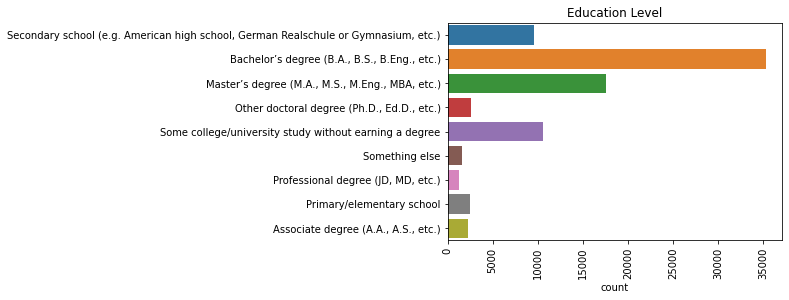

In [55]:
sns.countplot(y=df.EdLevel)
plt.xticks(rotation=90);
plt.title('Education Level')
plt.ylabel(None);

### Emplyment status

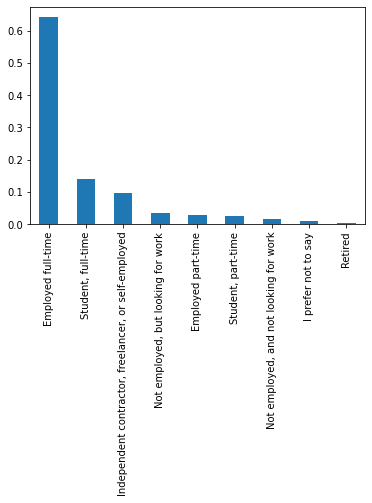

In [56]:
status_vals = df.Employment.value_counts()
(status_vals/df.shape[0]).plot(kind="bar");
#plt.title("Employment Status");

### Analysing Questionnaire 

In [57]:
df_schema = pd.read_csv('survey_results_schema.csv')
# df_schema.shape
# df_schema.head()

In [58]:
df_schema.rename(columns={'qname': 'Column','question':'Question'}, inplace=True)
df_schema = df_schema[['Column','Question']]
# df_schema.head()
# df_schema['Column']

In [59]:
def get_description(column_name, df_schema=df_schema):
    '''
    INPUT - df_schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(df_schema[df_schema['Column'] == column_name]['Question'])[0]
    return desc

In [60]:
get_description('MainBranch',df_schema)

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code." <b>*</b>'

In [61]:
get_description('LearnCode',df_schema)

'How did you learn to code? Select all that apply.'

In [62]:
get_description('Language',df_schema)

'Which <b>programming, scripting, and markup languages</b> have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [63]:
get_description('EdLevel',df_schema)

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [64]:
get_description('YearsCode',df_schema)

'Including any education, how many years have you been coding in total?'

In [65]:
get_description('Currency',df_schema)

"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in. *"

In [66]:
df[['Age','Employment','EdLevel','LanguageHaveWorkedWith','LanguageWantToWorkWith']].describe()

,Age,Employment,EdLevel,LanguageHaveWorkedWith,LanguageWantToWorkWith
count,82407,83323,83126,82357,76821
unique,8,9,9,28690,27545
top,25-34 years old,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Python,Python
freq,32568,53584,35357,1337,1389


In [67]:
df['Age'].value_counts()

25-34 years old       32568
18-24 years old       20993
35-44 years old       15183
45-54 years old        5472
Under 18 years old     5376
55-64 years old        1819
Prefer not to say       575
65 years or older       421
Name: Age, dtype: int64

## Q1 What are the most popular programming languages?

### Analyzing 2021

In [68]:
to_list = df['LanguageHaveWorkedWith'].tolist()
print(to_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



The problem with this kind of lists that we can't loop through it to count the unique values or frequencies

In [69]:
# printing all values that are not nul and vise versa for analysing data set
for idx, value  in df['LanguageHaveWorkedWith'][df['LanguageHaveWorkedWith'].notnull()].iteritems():
  # print(value)
  print("list",idx,"is",type(value))

list 0 is <class 'str'>
list 1 is <class 'str'>
list 2 is <class 'str'>
list 3 is <class 'str'>
list 4 is <class 'str'>
list 5 is <class 'str'>
list 6 is <class 'str'>
list 7 is <class 'str'>
list 8 is <class 'str'>
list 9 is <class 'str'>
list 10 is <class 'str'>
list 11 is <class 'str'>
list 12 is <class 'str'>
list 13 is <class 'str'>
list 14 is <class 'str'>
list 15 is <class 'str'>
list 16 is <class 'str'>
list 17 is <class 'str'>
list 18 is <class 'str'>
list 19 is <class 'str'>
list 20 is <class 'str'>
list 21 is <class 'str'>
list 22 is <class 'str'>
list 23 is <class 'str'>
list 24 is <class 'str'>
list 25 is <class 'str'>
list 26 is <class 'str'>
list 27 is <class 'str'>
list 28 is <class 'str'>
list 29 is <class 'str'>
list 30 is <class 'str'>
list 31 is <class 'str'>
list 32 is <class 'str'>
list 33 is <class 'str'>
list 34 is <class 'str'>
list 35 is <class 'str'>
list 36 is <class 'str'>
list 37 is <class 'str'>
list 38 is <class 'str'>
list 39 is <class 'str'>
list 40 is

list 402 is <class 'str'>
list 403 is <class 'str'>
list 404 is <class 'str'>
list 405 is <class 'str'>
list 406 is <class 'str'>
list 407 is <class 'str'>
list 408 is <class 'str'>
list 409 is <class 'str'>
list 410 is <class 'str'>
list 411 is <class 'str'>
list 412 is <class 'str'>
list 413 is <class 'str'>
list 414 is <class 'str'>
list 415 is <class 'str'>
list 416 is <class 'str'>
list 417 is <class 'str'>
list 418 is <class 'str'>
list 419 is <class 'str'>
list 420 is <class 'str'>
list 421 is <class 'str'>
list 422 is <class 'str'>
list 423 is <class 'str'>
list 424 is <class 'str'>
list 425 is <class 'str'>
list 426 is <class 'str'>
list 427 is <class 'str'>
list 428 is <class 'str'>
list 429 is <class 'str'>
list 430 is <class 'str'>
list 431 is <class 'str'>
list 432 is <class 'str'>
list 433 is <class 'str'>
list 434 is <class 'str'>
list 435 is <class 'str'>
list 436 is <class 'str'>
list 437 is <class 'str'>
list 438 is <class 'str'>
list 439 is <class 'str'>
list 440 is 

list 943 is <class 'str'>
list 944 is <class 'str'>
list 945 is <class 'str'>
list 946 is <class 'str'>
list 947 is <class 'str'>
list 948 is <class 'str'>
list 949 is <class 'str'>
list 950 is <class 'str'>
list 951 is <class 'str'>
list 952 is <class 'str'>
list 953 is <class 'str'>
list 954 is <class 'str'>
list 955 is <class 'str'>
list 956 is <class 'str'>
list 957 is <class 'str'>
list 958 is <class 'str'>
list 959 is <class 'str'>
list 960 is <class 'str'>
list 961 is <class 'str'>
list 962 is <class 'str'>
list 963 is <class 'str'>
list 964 is <class 'str'>
list 965 is <class 'str'>
list 966 is <class 'str'>
list 967 is <class 'str'>
list 968 is <class 'str'>
list 969 is <class 'str'>
list 970 is <class 'str'>
list 971 is <class 'str'>
list 972 is <class 'str'>
list 973 is <class 'str'>
list 974 is <class 'str'>
list 975 is <class 'str'>
list 976 is <class 'str'>
list 977 is <class 'str'>
list 978 is <class 'str'>
list 979 is <class 'str'>
list 980 is <class 'str'>
list 981 is 

list 1461 is <class 'str'>
list 1462 is <class 'str'>
list 1463 is <class 'str'>
list 1464 is <class 'str'>
list 1465 is <class 'str'>
list 1466 is <class 'str'>
list 1467 is <class 'str'>
list 1468 is <class 'str'>
list 1469 is <class 'str'>
list 1470 is <class 'str'>
list 1471 is <class 'str'>
list 1472 is <class 'str'>
list 1473 is <class 'str'>
list 1474 is <class 'str'>
list 1475 is <class 'str'>
list 1476 is <class 'str'>
list 1477 is <class 'str'>
list 1478 is <class 'str'>
list 1479 is <class 'str'>
list 1480 is <class 'str'>
list 1481 is <class 'str'>
list 1482 is <class 'str'>
list 1483 is <class 'str'>
list 1484 is <class 'str'>
list 1485 is <class 'str'>
list 1486 is <class 'str'>
list 1487 is <class 'str'>
list 1488 is <class 'str'>
list 1489 is <class 'str'>
list 1490 is <class 'str'>
list 1491 is <class 'str'>
list 1492 is <class 'str'>
list 1493 is <class 'str'>
list 1494 is <class 'str'>
list 1495 is <class 'str'>
list 1496 is <class 'str'>
list 1497 is <class 'str'>
l

list 1994 is <class 'str'>
list 1995 is <class 'str'>
list 1996 is <class 'str'>
list 1997 is <class 'str'>
list 1998 is <class 'str'>
list 1999 is <class 'str'>
list 2000 is <class 'str'>
list 2001 is <class 'str'>
list 2002 is <class 'str'>
list 2003 is <class 'str'>
list 2004 is <class 'str'>
list 2005 is <class 'str'>
list 2006 is <class 'str'>
list 2007 is <class 'str'>
list 2008 is <class 'str'>
list 2009 is <class 'str'>
list 2010 is <class 'str'>
list 2011 is <class 'str'>
list 2012 is <class 'str'>
list 2013 is <class 'str'>
list 2014 is <class 'str'>
list 2015 is <class 'str'>
list 2016 is <class 'str'>
list 2017 is <class 'str'>
list 2018 is <class 'str'>
list 2019 is <class 'str'>
list 2020 is <class 'str'>
list 2021 is <class 'str'>
list 2022 is <class 'str'>
list 2023 is <class 'str'>
list 2024 is <class 'str'>
list 2025 is <class 'str'>
list 2026 is <class 'str'>
list 2027 is <class 'str'>
list 2028 is <class 'str'>
list 2029 is <class 'str'>
list 2030 is <class 'str'>
l

list 2521 is <class 'str'>
list 2522 is <class 'str'>
list 2523 is <class 'str'>
list 2524 is <class 'str'>
list 2525 is <class 'str'>
list 2526 is <class 'str'>
list 2527 is <class 'str'>
list 2528 is <class 'str'>
list 2529 is <class 'str'>
list 2530 is <class 'str'>
list 2531 is <class 'str'>
list 2532 is <class 'str'>
list 2533 is <class 'str'>
list 2534 is <class 'str'>
list 2535 is <class 'str'>
list 2536 is <class 'str'>
list 2537 is <class 'str'>
list 2538 is <class 'str'>
list 2539 is <class 'str'>
list 2540 is <class 'str'>
list 2541 is <class 'str'>
list 2542 is <class 'str'>
list 2543 is <class 'str'>
list 2544 is <class 'str'>
list 2545 is <class 'str'>
list 2546 is <class 'str'>
list 2547 is <class 'str'>
list 2548 is <class 'str'>
list 2549 is <class 'str'>
list 2550 is <class 'str'>
list 2551 is <class 'str'>
list 2552 is <class 'str'>
list 2553 is <class 'str'>
list 2554 is <class 'str'>
list 2555 is <class 'str'>
list 2556 is <class 'str'>
list 2557 is <class 'str'>
l

list 3063 is <class 'str'>
list 3064 is <class 'str'>
list 3065 is <class 'str'>
list 3066 is <class 'str'>
list 3067 is <class 'str'>
list 3068 is <class 'str'>
list 3069 is <class 'str'>
list 3070 is <class 'str'>
list 3071 is <class 'str'>
list 3072 is <class 'str'>
list 3073 is <class 'str'>
list 3074 is <class 'str'>
list 3075 is <class 'str'>
list 3076 is <class 'str'>
list 3077 is <class 'str'>
list 3078 is <class 'str'>
list 3079 is <class 'str'>
list 3080 is <class 'str'>
list 3081 is <class 'str'>
list 3082 is <class 'str'>
list 3083 is <class 'str'>
list 3084 is <class 'str'>
list 3085 is <class 'str'>
list 3086 is <class 'str'>
list 3087 is <class 'str'>
list 3088 is <class 'str'>
list 3089 is <class 'str'>
list 3090 is <class 'str'>
list 3091 is <class 'str'>
list 3092 is <class 'str'>
list 3093 is <class 'str'>
list 3094 is <class 'str'>
list 3095 is <class 'str'>
list 3096 is <class 'str'>
list 3097 is <class 'str'>
list 3098 is <class 'str'>
list 3099 is <class 'str'>
l

list 3569 is <class 'str'>
list 3570 is <class 'str'>
list 3571 is <class 'str'>
list 3572 is <class 'str'>
list 3573 is <class 'str'>
list 3574 is <class 'str'>
list 3575 is <class 'str'>
list 3576 is <class 'str'>
list 3577 is <class 'str'>
list 3578 is <class 'str'>
list 3579 is <class 'str'>
list 3580 is <class 'str'>
list 3581 is <class 'str'>
list 3582 is <class 'str'>
list 3583 is <class 'str'>
list 3584 is <class 'str'>
list 3585 is <class 'str'>
list 3586 is <class 'str'>
list 3587 is <class 'str'>
list 3588 is <class 'str'>
list 3589 is <class 'str'>
list 3590 is <class 'str'>
list 3591 is <class 'str'>
list 3592 is <class 'str'>
list 3593 is <class 'str'>
list 3594 is <class 'str'>
list 3595 is <class 'str'>
list 3596 is <class 'str'>
list 3597 is <class 'str'>
list 3598 is <class 'str'>
list 3599 is <class 'str'>
list 3600 is <class 'str'>
list 3601 is <class 'str'>
list 3602 is <class 'str'>
list 3603 is <class 'str'>
list 3604 is <class 'str'>
list 3605 is <class 'str'>
l

list 4160 is <class 'str'>
list 4161 is <class 'str'>
list 4162 is <class 'str'>
list 4163 is <class 'str'>
list 4164 is <class 'str'>
list 4165 is <class 'str'>
list 4166 is <class 'str'>
list 4167 is <class 'str'>
list 4168 is <class 'str'>
list 4169 is <class 'str'>
list 4170 is <class 'str'>
list 4171 is <class 'str'>
list 4172 is <class 'str'>
list 4173 is <class 'str'>
list 4174 is <class 'str'>
list 4175 is <class 'str'>
list 4176 is <class 'str'>
list 4177 is <class 'str'>
list 4178 is <class 'str'>
list 4179 is <class 'str'>
list 4180 is <class 'str'>
list 4181 is <class 'str'>
list 4182 is <class 'str'>
list 4183 is <class 'str'>
list 4184 is <class 'str'>
list 4185 is <class 'str'>
list 4186 is <class 'str'>
list 4187 is <class 'str'>
list 4188 is <class 'str'>
list 4189 is <class 'str'>
list 4190 is <class 'str'>
list 4191 is <class 'str'>
list 4192 is <class 'str'>
list 4193 is <class 'str'>
list 4194 is <class 'str'>
list 4195 is <class 'str'>
list 4196 is <class 'str'>
l

list 4642 is <class 'str'>
list 4643 is <class 'str'>
list 4644 is <class 'str'>
list 4645 is <class 'str'>
list 4646 is <class 'str'>
list 4647 is <class 'str'>
list 4648 is <class 'str'>
list 4649 is <class 'str'>
list 4650 is <class 'str'>
list 4651 is <class 'str'>
list 4652 is <class 'str'>
list 4653 is <class 'str'>
list 4654 is <class 'str'>
list 4655 is <class 'str'>
list 4656 is <class 'str'>
list 4657 is <class 'str'>
list 4658 is <class 'str'>
list 4659 is <class 'str'>
list 4660 is <class 'str'>
list 4661 is <class 'str'>
list 4662 is <class 'str'>
list 4663 is <class 'str'>
list 4664 is <class 'str'>
list 4665 is <class 'str'>
list 4666 is <class 'str'>
list 4667 is <class 'str'>
list 4668 is <class 'str'>
list 4669 is <class 'str'>
list 4670 is <class 'str'>
list 4671 is <class 'str'>
list 4672 is <class 'str'>
list 4673 is <class 'str'>
list 4674 is <class 'str'>
list 4675 is <class 'str'>
list 4676 is <class 'str'>
list 4677 is <class 'str'>
list 4678 is <class 'str'>
l

list 5191 is <class 'str'>
list 5192 is <class 'str'>
list 5193 is <class 'str'>
list 5194 is <class 'str'>
list 5195 is <class 'str'>
list 5196 is <class 'str'>
list 5197 is <class 'str'>
list 5198 is <class 'str'>
list 5199 is <class 'str'>
list 5200 is <class 'str'>
list 5201 is <class 'str'>
list 5202 is <class 'str'>
list 5203 is <class 'str'>
list 5204 is <class 'str'>
list 5205 is <class 'str'>
list 5206 is <class 'str'>
list 5207 is <class 'str'>
list 5208 is <class 'str'>
list 5209 is <class 'str'>
list 5210 is <class 'str'>
list 5211 is <class 'str'>
list 5212 is <class 'str'>
list 5213 is <class 'str'>
list 5214 is <class 'str'>
list 5215 is <class 'str'>
list 5216 is <class 'str'>
list 5217 is <class 'str'>
list 5218 is <class 'str'>
list 5219 is <class 'str'>
list 5220 is <class 'str'>
list 5221 is <class 'str'>
list 5222 is <class 'str'>
list 5223 is <class 'str'>
list 5224 is <class 'str'>
list 5225 is <class 'str'>
list 5226 is <class 'str'>
list 5227 is <class 'str'>
l

list 5720 is <class 'str'>
list 5721 is <class 'str'>
list 5722 is <class 'str'>
list 5723 is <class 'str'>
list 5724 is <class 'str'>
list 5725 is <class 'str'>
list 5726 is <class 'str'>
list 5727 is <class 'str'>
list 5728 is <class 'str'>
list 5729 is <class 'str'>
list 5730 is <class 'str'>
list 5731 is <class 'str'>
list 5732 is <class 'str'>
list 5733 is <class 'str'>
list 5734 is <class 'str'>
list 5735 is <class 'str'>
list 5736 is <class 'str'>
list 5737 is <class 'str'>
list 5738 is <class 'str'>
list 5739 is <class 'str'>
list 5740 is <class 'str'>
list 5741 is <class 'str'>
list 5742 is <class 'str'>
list 5743 is <class 'str'>
list 5744 is <class 'str'>
list 5745 is <class 'str'>
list 5746 is <class 'str'>
list 5747 is <class 'str'>
list 5748 is <class 'str'>
list 5749 is <class 'str'>
list 5750 is <class 'str'>
list 5751 is <class 'str'>
list 5752 is <class 'str'>
list 5753 is <class 'str'>
list 5754 is <class 'str'>
list 5755 is <class 'str'>
list 5756 is <class 'str'>
l

list 6246 is <class 'str'>
list 6247 is <class 'str'>
list 6248 is <class 'str'>
list 6249 is <class 'str'>
list 6250 is <class 'str'>
list 6251 is <class 'str'>
list 6252 is <class 'str'>
list 6253 is <class 'str'>
list 6254 is <class 'str'>
list 6255 is <class 'str'>
list 6256 is <class 'str'>
list 6257 is <class 'str'>
list 6258 is <class 'str'>
list 6259 is <class 'str'>
list 6260 is <class 'str'>
list 6261 is <class 'str'>
list 6262 is <class 'str'>
list 6263 is <class 'str'>
list 6264 is <class 'str'>
list 6265 is <class 'str'>
list 6266 is <class 'str'>
list 6267 is <class 'str'>
list 6268 is <class 'str'>
list 6269 is <class 'str'>
list 6270 is <class 'str'>
list 6271 is <class 'str'>
list 6272 is <class 'str'>
list 6273 is <class 'str'>
list 6274 is <class 'str'>
list 6275 is <class 'str'>
list 6276 is <class 'str'>
list 6277 is <class 'str'>
list 6278 is <class 'str'>
list 6279 is <class 'str'>
list 6280 is <class 'str'>
list 6281 is <class 'str'>
list 6282 is <class 'str'>
l

list 6777 is <class 'str'>
list 6778 is <class 'str'>
list 6779 is <class 'str'>
list 6780 is <class 'str'>
list 6781 is <class 'str'>
list 6782 is <class 'str'>
list 6783 is <class 'str'>
list 6784 is <class 'str'>
list 6785 is <class 'str'>
list 6786 is <class 'str'>
list 6787 is <class 'str'>
list 6788 is <class 'str'>
list 6789 is <class 'str'>
list 6790 is <class 'str'>
list 6791 is <class 'str'>
list 6792 is <class 'str'>
list 6794 is <class 'str'>
list 6795 is <class 'str'>
list 6796 is <class 'str'>
list 6797 is <class 'str'>
list 6798 is <class 'str'>
list 6799 is <class 'str'>
list 6800 is <class 'str'>
list 6801 is <class 'str'>
list 6802 is <class 'str'>
list 6803 is <class 'str'>
list 6804 is <class 'str'>
list 6805 is <class 'str'>
list 6806 is <class 'str'>
list 6807 is <class 'str'>
list 6808 is <class 'str'>
list 6809 is <class 'str'>
list 6810 is <class 'str'>
list 6811 is <class 'str'>
list 6812 is <class 'str'>
list 6813 is <class 'str'>
list 6814 is <class 'str'>
l

list 7317 is <class 'str'>
list 7318 is <class 'str'>
list 7319 is <class 'str'>
list 7320 is <class 'str'>
list 7321 is <class 'str'>
list 7322 is <class 'str'>
list 7323 is <class 'str'>
list 7324 is <class 'str'>
list 7325 is <class 'str'>
list 7326 is <class 'str'>
list 7327 is <class 'str'>
list 7328 is <class 'str'>
list 7329 is <class 'str'>
list 7330 is <class 'str'>
list 7331 is <class 'str'>
list 7332 is <class 'str'>
list 7333 is <class 'str'>
list 7334 is <class 'str'>
list 7335 is <class 'str'>
list 7336 is <class 'str'>
list 7337 is <class 'str'>
list 7338 is <class 'str'>
list 7339 is <class 'str'>
list 7340 is <class 'str'>
list 7341 is <class 'str'>
list 7342 is <class 'str'>
list 7343 is <class 'str'>
list 7344 is <class 'str'>
list 7345 is <class 'str'>
list 7346 is <class 'str'>
list 7347 is <class 'str'>
list 7348 is <class 'str'>
list 7349 is <class 'str'>
list 7350 is <class 'str'>
list 7351 is <class 'str'>
list 7352 is <class 'str'>
list 7353 is <class 'str'>
l

list 7862 is <class 'str'>
list 7863 is <class 'str'>
list 7864 is <class 'str'>
list 7865 is <class 'str'>
list 7866 is <class 'str'>
list 7867 is <class 'str'>
list 7868 is <class 'str'>
list 7869 is <class 'str'>
list 7870 is <class 'str'>
list 7871 is <class 'str'>
list 7872 is <class 'str'>
list 7873 is <class 'str'>
list 7874 is <class 'str'>
list 7875 is <class 'str'>
list 7876 is <class 'str'>
list 7877 is <class 'str'>
list 7878 is <class 'str'>
list 7879 is <class 'str'>
list 7880 is <class 'str'>
list 7881 is <class 'str'>
list 7882 is <class 'str'>
list 7883 is <class 'str'>
list 7884 is <class 'str'>
list 7885 is <class 'str'>
list 7886 is <class 'str'>
list 7887 is <class 'str'>
list 7888 is <class 'str'>
list 7889 is <class 'str'>
list 7890 is <class 'str'>
list 7891 is <class 'str'>
list 7892 is <class 'str'>
list 7893 is <class 'str'>
list 7894 is <class 'str'>
list 7895 is <class 'str'>
list 7896 is <class 'str'>
list 7897 is <class 'str'>
list 7898 is <class 'str'>
l

list 8402 is <class 'str'>
list 8403 is <class 'str'>
list 8404 is <class 'str'>
list 8405 is <class 'str'>
list 8406 is <class 'str'>
list 8407 is <class 'str'>
list 8408 is <class 'str'>
list 8409 is <class 'str'>
list 8410 is <class 'str'>
list 8411 is <class 'str'>
list 8412 is <class 'str'>
list 8413 is <class 'str'>
list 8414 is <class 'str'>
list 8415 is <class 'str'>
list 8416 is <class 'str'>
list 8417 is <class 'str'>
list 8418 is <class 'str'>
list 8419 is <class 'str'>
list 8420 is <class 'str'>
list 8421 is <class 'str'>
list 8422 is <class 'str'>
list 8423 is <class 'str'>
list 8424 is <class 'str'>
list 8425 is <class 'str'>
list 8426 is <class 'str'>
list 8427 is <class 'str'>
list 8428 is <class 'str'>
list 8429 is <class 'str'>
list 8430 is <class 'str'>
list 8431 is <class 'str'>
list 8432 is <class 'str'>
list 8433 is <class 'str'>
list 8434 is <class 'str'>
list 8435 is <class 'str'>
list 8436 is <class 'str'>
list 8437 is <class 'str'>
list 8438 is <class 'str'>
l

list 8952 is <class 'str'>
list 8953 is <class 'str'>
list 8954 is <class 'str'>
list 8955 is <class 'str'>
list 8956 is <class 'str'>
list 8957 is <class 'str'>
list 8958 is <class 'str'>
list 8959 is <class 'str'>
list 8960 is <class 'str'>
list 8961 is <class 'str'>
list 8962 is <class 'str'>
list 8963 is <class 'str'>
list 8964 is <class 'str'>
list 8965 is <class 'str'>
list 8966 is <class 'str'>
list 8967 is <class 'str'>
list 8968 is <class 'str'>
list 8969 is <class 'str'>
list 8970 is <class 'str'>
list 8971 is <class 'str'>
list 8972 is <class 'str'>
list 8973 is <class 'str'>
list 8974 is <class 'str'>
list 8975 is <class 'str'>
list 8976 is <class 'str'>
list 8977 is <class 'str'>
list 8978 is <class 'str'>
list 8979 is <class 'str'>
list 8980 is <class 'str'>
list 8981 is <class 'str'>
list 8982 is <class 'str'>
list 8983 is <class 'str'>
list 8984 is <class 'str'>
list 8985 is <class 'str'>
list 8986 is <class 'str'>
list 8987 is <class 'str'>
list 8988 is <class 'str'>
l

list 9487 is <class 'str'>
list 9488 is <class 'str'>
list 9489 is <class 'str'>
list 9490 is <class 'str'>
list 9491 is <class 'str'>
list 9492 is <class 'str'>
list 9493 is <class 'str'>
list 9494 is <class 'str'>
list 9495 is <class 'str'>
list 9496 is <class 'str'>
list 9497 is <class 'str'>
list 9498 is <class 'str'>
list 9499 is <class 'str'>
list 9500 is <class 'str'>
list 9501 is <class 'str'>
list 9502 is <class 'str'>
list 9503 is <class 'str'>
list 9504 is <class 'str'>
list 9505 is <class 'str'>
list 9506 is <class 'str'>
list 9507 is <class 'str'>
list 9508 is <class 'str'>
list 9509 is <class 'str'>
list 9510 is <class 'str'>
list 9511 is <class 'str'>
list 9512 is <class 'str'>
list 9513 is <class 'str'>
list 9514 is <class 'str'>
list 9515 is <class 'str'>
list 9516 is <class 'str'>
list 9517 is <class 'str'>
list 9518 is <class 'str'>
list 9519 is <class 'str'>
list 9520 is <class 'str'>
list 9521 is <class 'str'>
list 9522 is <class 'str'>
list 9523 is <class 'str'>
l

list 10001 is <class 'str'>
list 10002 is <class 'str'>
list 10003 is <class 'str'>
list 10004 is <class 'str'>
list 10005 is <class 'str'>
list 10006 is <class 'str'>
list 10007 is <class 'str'>
list 10008 is <class 'str'>
list 10009 is <class 'str'>
list 10010 is <class 'str'>
list 10011 is <class 'str'>
list 10012 is <class 'str'>
list 10013 is <class 'str'>
list 10014 is <class 'str'>
list 10015 is <class 'str'>
list 10016 is <class 'str'>
list 10017 is <class 'str'>
list 10018 is <class 'str'>
list 10019 is <class 'str'>
list 10020 is <class 'str'>
list 10021 is <class 'str'>
list 10022 is <class 'str'>
list 10023 is <class 'str'>
list 10024 is <class 'str'>
list 10025 is <class 'str'>
list 10026 is <class 'str'>
list 10027 is <class 'str'>
list 10028 is <class 'str'>
list 10029 is <class 'str'>
list 10030 is <class 'str'>
list 10031 is <class 'str'>
list 10032 is <class 'str'>
list 10033 is <class 'str'>
list 10034 is <class 'str'>
list 10035 is <class 'str'>
list 10036 is <class

list 10554 is <class 'str'>
list 10556 is <class 'str'>
list 10557 is <class 'str'>
list 10558 is <class 'str'>
list 10559 is <class 'str'>
list 10560 is <class 'str'>
list 10561 is <class 'str'>
list 10562 is <class 'str'>
list 10563 is <class 'str'>
list 10564 is <class 'str'>
list 10565 is <class 'str'>
list 10566 is <class 'str'>
list 10567 is <class 'str'>
list 10568 is <class 'str'>
list 10569 is <class 'str'>
list 10570 is <class 'str'>
list 10571 is <class 'str'>
list 10572 is <class 'str'>
list 10573 is <class 'str'>
list 10574 is <class 'str'>
list 10575 is <class 'str'>
list 10576 is <class 'str'>
list 10577 is <class 'str'>
list 10578 is <class 'str'>
list 10579 is <class 'str'>
list 10580 is <class 'str'>
list 10581 is <class 'str'>
list 10582 is <class 'str'>
list 10583 is <class 'str'>
list 10584 is <class 'str'>
list 10585 is <class 'str'>
list 10586 is <class 'str'>
list 10587 is <class 'str'>
list 10588 is <class 'str'>
list 10589 is <class 'str'>
list 10590 is <class

list 11104 is <class 'str'>
list 11105 is <class 'str'>
list 11106 is <class 'str'>
list 11107 is <class 'str'>
list 11108 is <class 'str'>
list 11109 is <class 'str'>
list 11110 is <class 'str'>
list 11111 is <class 'str'>
list 11112 is <class 'str'>
list 11113 is <class 'str'>
list 11114 is <class 'str'>
list 11115 is <class 'str'>
list 11116 is <class 'str'>
list 11117 is <class 'str'>
list 11118 is <class 'str'>
list 11119 is <class 'str'>
list 11120 is <class 'str'>
list 11121 is <class 'str'>
list 11122 is <class 'str'>
list 11123 is <class 'str'>
list 11124 is <class 'str'>
list 11125 is <class 'str'>
list 11126 is <class 'str'>
list 11127 is <class 'str'>
list 11128 is <class 'str'>
list 11129 is <class 'str'>
list 11130 is <class 'str'>
list 11131 is <class 'str'>
list 11132 is <class 'str'>
list 11133 is <class 'str'>
list 11134 is <class 'str'>
list 11135 is <class 'str'>
list 11136 is <class 'str'>
list 11137 is <class 'str'>
list 11138 is <class 'str'>
list 11139 is <class

list 11637 is <class 'str'>
list 11638 is <class 'str'>
list 11639 is <class 'str'>
list 11640 is <class 'str'>
list 11641 is <class 'str'>
list 11642 is <class 'str'>
list 11644 is <class 'str'>
list 11645 is <class 'str'>
list 11646 is <class 'str'>
list 11647 is <class 'str'>
list 11648 is <class 'str'>
list 11649 is <class 'str'>
list 11650 is <class 'str'>
list 11651 is <class 'str'>
list 11652 is <class 'str'>
list 11653 is <class 'str'>
list 11654 is <class 'str'>
list 11655 is <class 'str'>
list 11656 is <class 'str'>
list 11657 is <class 'str'>
list 11658 is <class 'str'>
list 11659 is <class 'str'>
list 11660 is <class 'str'>
list 11661 is <class 'str'>
list 11662 is <class 'str'>
list 11663 is <class 'str'>
list 11664 is <class 'str'>
list 11665 is <class 'str'>
list 11666 is <class 'str'>
list 11667 is <class 'str'>
list 11669 is <class 'str'>
list 11670 is <class 'str'>
list 11671 is <class 'str'>
list 11672 is <class 'str'>
list 11673 is <class 'str'>
list 11674 is <class

list 12270 is <class 'str'>
list 12271 is <class 'str'>
list 12272 is <class 'str'>
list 12273 is <class 'str'>
list 12274 is <class 'str'>
list 12275 is <class 'str'>
list 12276 is <class 'str'>
list 12277 is <class 'str'>
list 12278 is <class 'str'>
list 12279 is <class 'str'>
list 12280 is <class 'str'>
list 12281 is <class 'str'>
list 12282 is <class 'str'>
list 12283 is <class 'str'>
list 12284 is <class 'str'>
list 12285 is <class 'str'>
list 12286 is <class 'str'>
list 12287 is <class 'str'>
list 12288 is <class 'str'>
list 12289 is <class 'str'>
list 12290 is <class 'str'>
list 12291 is <class 'str'>
list 12292 is <class 'str'>
list 12293 is <class 'str'>
list 12294 is <class 'str'>
list 12295 is <class 'str'>
list 12296 is <class 'str'>
list 12297 is <class 'str'>
list 12298 is <class 'str'>
list 12299 is <class 'str'>
list 12300 is <class 'str'>
list 12301 is <class 'str'>
list 12302 is <class 'str'>
list 12303 is <class 'str'>
list 12304 is <class 'str'>
list 12305 is <class

list 12747 is <class 'str'>
list 12748 is <class 'str'>
list 12749 is <class 'str'>
list 12750 is <class 'str'>
list 12751 is <class 'str'>
list 12752 is <class 'str'>
list 12753 is <class 'str'>
list 12754 is <class 'str'>
list 12755 is <class 'str'>
list 12756 is <class 'str'>
list 12757 is <class 'str'>
list 12758 is <class 'str'>
list 12759 is <class 'str'>
list 12760 is <class 'str'>
list 12761 is <class 'str'>
list 12762 is <class 'str'>
list 12763 is <class 'str'>
list 12764 is <class 'str'>
list 12765 is <class 'str'>
list 12766 is <class 'str'>
list 12767 is <class 'str'>
list 12768 is <class 'str'>
list 12769 is <class 'str'>
list 12770 is <class 'str'>
list 12771 is <class 'str'>
list 12772 is <class 'str'>
list 12773 is <class 'str'>
list 12774 is <class 'str'>
list 12775 is <class 'str'>
list 12776 is <class 'str'>
list 12777 is <class 'str'>
list 12779 is <class 'str'>
list 12780 is <class 'str'>
list 12781 is <class 'str'>
list 12782 is <class 'str'>
list 12783 is <class

list 13281 is <class 'str'>
list 13283 is <class 'str'>
list 13284 is <class 'str'>
list 13285 is <class 'str'>
list 13286 is <class 'str'>
list 13287 is <class 'str'>
list 13288 is <class 'str'>
list 13289 is <class 'str'>
list 13290 is <class 'str'>
list 13291 is <class 'str'>
list 13292 is <class 'str'>
list 13293 is <class 'str'>
list 13294 is <class 'str'>
list 13295 is <class 'str'>
list 13296 is <class 'str'>
list 13297 is <class 'str'>
list 13298 is <class 'str'>
list 13299 is <class 'str'>
list 13300 is <class 'str'>
list 13301 is <class 'str'>
list 13302 is <class 'str'>
list 13303 is <class 'str'>
list 13304 is <class 'str'>
list 13305 is <class 'str'>
list 13306 is <class 'str'>
list 13307 is <class 'str'>
list 13308 is <class 'str'>
list 13309 is <class 'str'>
list 13310 is <class 'str'>
list 13311 is <class 'str'>
list 13312 is <class 'str'>
list 13313 is <class 'str'>
list 13314 is <class 'str'>
list 13315 is <class 'str'>
list 13316 is <class 'str'>
list 13317 is <class

list 13819 is <class 'str'>
list 13820 is <class 'str'>
list 13821 is <class 'str'>
list 13822 is <class 'str'>
list 13823 is <class 'str'>
list 13824 is <class 'str'>
list 13825 is <class 'str'>
list 13826 is <class 'str'>
list 13827 is <class 'str'>
list 13828 is <class 'str'>
list 13829 is <class 'str'>
list 13830 is <class 'str'>
list 13831 is <class 'str'>
list 13832 is <class 'str'>
list 13833 is <class 'str'>
list 13834 is <class 'str'>
list 13835 is <class 'str'>
list 13836 is <class 'str'>
list 13837 is <class 'str'>
list 13838 is <class 'str'>
list 13839 is <class 'str'>
list 13840 is <class 'str'>
list 13841 is <class 'str'>
list 13842 is <class 'str'>
list 13843 is <class 'str'>
list 13844 is <class 'str'>
list 13845 is <class 'str'>
list 13846 is <class 'str'>
list 13847 is <class 'str'>
list 13848 is <class 'str'>
list 13849 is <class 'str'>
list 13850 is <class 'str'>
list 13851 is <class 'str'>
list 13852 is <class 'str'>
list 13853 is <class 'str'>
list 13854 is <class

list 14364 is <class 'str'>
list 14365 is <class 'str'>
list 14366 is <class 'str'>
list 14367 is <class 'str'>
list 14368 is <class 'str'>
list 14369 is <class 'str'>
list 14370 is <class 'str'>
list 14371 is <class 'str'>
list 14372 is <class 'str'>
list 14373 is <class 'str'>
list 14374 is <class 'str'>
list 14375 is <class 'str'>
list 14376 is <class 'str'>
list 14377 is <class 'str'>
list 14378 is <class 'str'>
list 14379 is <class 'str'>
list 14380 is <class 'str'>
list 14381 is <class 'str'>
list 14382 is <class 'str'>
list 14383 is <class 'str'>
list 14384 is <class 'str'>
list 14385 is <class 'str'>
list 14386 is <class 'str'>
list 14387 is <class 'str'>
list 14388 is <class 'str'>
list 14389 is <class 'str'>
list 14390 is <class 'str'>
list 14391 is <class 'str'>
list 14392 is <class 'str'>
list 14393 is <class 'str'>
list 14394 is <class 'str'>
list 14395 is <class 'str'>
list 14396 is <class 'str'>
list 14397 is <class 'str'>
list 14398 is <class 'str'>
list 14399 is <class

list 14939 is <class 'str'>
list 14940 is <class 'str'>
list 14941 is <class 'str'>
list 14942 is <class 'str'>
list 14943 is <class 'str'>
list 14944 is <class 'str'>
list 14945 is <class 'str'>
list 14946 is <class 'str'>
list 14947 is <class 'str'>
list 14948 is <class 'str'>
list 14949 is <class 'str'>
list 14950 is <class 'str'>
list 14951 is <class 'str'>
list 14952 is <class 'str'>
list 14953 is <class 'str'>
list 14954 is <class 'str'>
list 14955 is <class 'str'>
list 14956 is <class 'str'>
list 14957 is <class 'str'>
list 14958 is <class 'str'>
list 14959 is <class 'str'>
list 14960 is <class 'str'>
list 14961 is <class 'str'>
list 14962 is <class 'str'>
list 14963 is <class 'str'>
list 14964 is <class 'str'>
list 14965 is <class 'str'>
list 14966 is <class 'str'>
list 14967 is <class 'str'>
list 14968 is <class 'str'>
list 14969 is <class 'str'>
list 14970 is <class 'str'>
list 14971 is <class 'str'>
list 14972 is <class 'str'>
list 14973 is <class 'str'>
list 14974 is <class

list 15466 is <class 'str'>
list 15467 is <class 'str'>
list 15468 is <class 'str'>
list 15469 is <class 'str'>
list 15470 is <class 'str'>
list 15471 is <class 'str'>
list 15472 is <class 'str'>
list 15473 is <class 'str'>
list 15474 is <class 'str'>
list 15475 is <class 'str'>
list 15476 is <class 'str'>
list 15477 is <class 'str'>
list 15478 is <class 'str'>
list 15479 is <class 'str'>
list 15480 is <class 'str'>
list 15481 is <class 'str'>
list 15482 is <class 'str'>
list 15483 is <class 'str'>
list 15484 is <class 'str'>
list 15485 is <class 'str'>
list 15486 is <class 'str'>
list 15487 is <class 'str'>
list 15488 is <class 'str'>
list 15489 is <class 'str'>
list 15490 is <class 'str'>
list 15491 is <class 'str'>
list 15492 is <class 'str'>
list 15493 is <class 'str'>
list 15495 is <class 'str'>
list 15496 is <class 'str'>
list 15497 is <class 'str'>
list 15498 is <class 'str'>
list 15499 is <class 'str'>
list 15500 is <class 'str'>
list 15501 is <class 'str'>
list 15502 is <class

list 16004 is <class 'str'>
list 16005 is <class 'str'>
list 16006 is <class 'str'>
list 16007 is <class 'str'>
list 16008 is <class 'str'>
list 16009 is <class 'str'>
list 16010 is <class 'str'>
list 16011 is <class 'str'>
list 16012 is <class 'str'>
list 16013 is <class 'str'>
list 16014 is <class 'str'>
list 16015 is <class 'str'>
list 16016 is <class 'str'>
list 16017 is <class 'str'>
list 16018 is <class 'str'>
list 16019 is <class 'str'>
list 16020 is <class 'str'>
list 16021 is <class 'str'>
list 16022 is <class 'str'>
list 16023 is <class 'str'>
list 16024 is <class 'str'>
list 16025 is <class 'str'>
list 16026 is <class 'str'>
list 16027 is <class 'str'>
list 16028 is <class 'str'>
list 16029 is <class 'str'>
list 16030 is <class 'str'>
list 16031 is <class 'str'>
list 16032 is <class 'str'>
list 16033 is <class 'str'>
list 16034 is <class 'str'>
list 16035 is <class 'str'>
list 16036 is <class 'str'>
list 16037 is <class 'str'>
list 16038 is <class 'str'>
list 16039 is <class

list 16644 is <class 'str'>
list 16645 is <class 'str'>
list 16646 is <class 'str'>
list 16647 is <class 'str'>
list 16648 is <class 'str'>
list 16649 is <class 'str'>
list 16650 is <class 'str'>
list 16651 is <class 'str'>
list 16652 is <class 'str'>
list 16653 is <class 'str'>
list 16654 is <class 'str'>
list 16655 is <class 'str'>
list 16656 is <class 'str'>
list 16657 is <class 'str'>
list 16658 is <class 'str'>
list 16659 is <class 'str'>
list 16660 is <class 'str'>
list 16661 is <class 'str'>
list 16662 is <class 'str'>
list 16663 is <class 'str'>
list 16664 is <class 'str'>
list 16665 is <class 'str'>
list 16666 is <class 'str'>
list 16667 is <class 'str'>
list 16668 is <class 'str'>
list 16669 is <class 'str'>
list 16670 is <class 'str'>
list 16671 is <class 'str'>
list 16672 is <class 'str'>
list 16673 is <class 'str'>
list 16674 is <class 'str'>
list 16675 is <class 'str'>
list 16676 is <class 'str'>
list 16677 is <class 'str'>
list 16678 is <class 'str'>
list 16679 is <class

list 17099 is <class 'str'>
list 17100 is <class 'str'>
list 17101 is <class 'str'>
list 17102 is <class 'str'>
list 17103 is <class 'str'>
list 17104 is <class 'str'>
list 17105 is <class 'str'>
list 17106 is <class 'str'>
list 17107 is <class 'str'>
list 17108 is <class 'str'>
list 17109 is <class 'str'>
list 17110 is <class 'str'>
list 17111 is <class 'str'>
list 17112 is <class 'str'>
list 17113 is <class 'str'>
list 17114 is <class 'str'>
list 17115 is <class 'str'>
list 17116 is <class 'str'>
list 17117 is <class 'str'>
list 17118 is <class 'str'>
list 17119 is <class 'str'>
list 17120 is <class 'str'>
list 17121 is <class 'str'>
list 17122 is <class 'str'>
list 17123 is <class 'str'>
list 17124 is <class 'str'>
list 17125 is <class 'str'>
list 17126 is <class 'str'>
list 17127 is <class 'str'>
list 17128 is <class 'str'>
list 17129 is <class 'str'>
list 17130 is <class 'str'>
list 17131 is <class 'str'>
list 17132 is <class 'str'>
list 17133 is <class 'str'>
list 17134 is <class

list 17632 is <class 'str'>
list 17633 is <class 'str'>
list 17634 is <class 'str'>
list 17635 is <class 'str'>
list 17636 is <class 'str'>
list 17637 is <class 'str'>
list 17638 is <class 'str'>
list 17639 is <class 'str'>
list 17640 is <class 'str'>
list 17641 is <class 'str'>
list 17642 is <class 'str'>
list 17643 is <class 'str'>
list 17644 is <class 'str'>
list 17645 is <class 'str'>
list 17646 is <class 'str'>
list 17647 is <class 'str'>
list 17648 is <class 'str'>
list 17649 is <class 'str'>
list 17650 is <class 'str'>
list 17651 is <class 'str'>
list 17652 is <class 'str'>
list 17653 is <class 'str'>
list 17654 is <class 'str'>
list 17655 is <class 'str'>
list 17656 is <class 'str'>
list 17657 is <class 'str'>
list 17658 is <class 'str'>
list 17659 is <class 'str'>
list 17660 is <class 'str'>
list 17661 is <class 'str'>
list 17662 is <class 'str'>
list 17663 is <class 'str'>
list 17664 is <class 'str'>
list 17665 is <class 'str'>
list 17666 is <class 'str'>
list 17667 is <class

list 18031 is <class 'str'>
list 18032 is <class 'str'>
list 18033 is <class 'str'>
list 18034 is <class 'str'>
list 18035 is <class 'str'>
list 18036 is <class 'str'>
list 18037 is <class 'str'>
list 18038 is <class 'str'>
list 18039 is <class 'str'>
list 18040 is <class 'str'>
list 18041 is <class 'str'>
list 18042 is <class 'str'>
list 18043 is <class 'str'>
list 18044 is <class 'str'>
list 18045 is <class 'str'>
list 18046 is <class 'str'>
list 18047 is <class 'str'>
list 18048 is <class 'str'>
list 18049 is <class 'str'>
list 18050 is <class 'str'>
list 18051 is <class 'str'>
list 18052 is <class 'str'>
list 18053 is <class 'str'>
list 18054 is <class 'str'>
list 18055 is <class 'str'>
list 18056 is <class 'str'>
list 18057 is <class 'str'>
list 18058 is <class 'str'>
list 18059 is <class 'str'>
list 18060 is <class 'str'>
list 18061 is <class 'str'>
list 18062 is <class 'str'>
list 18063 is <class 'str'>
list 18064 is <class 'str'>
list 18065 is <class 'str'>
list 18066 is <class

list 18553 is <class 'str'>
list 18554 is <class 'str'>
list 18555 is <class 'str'>
list 18556 is <class 'str'>
list 18557 is <class 'str'>
list 18558 is <class 'str'>
list 18559 is <class 'str'>
list 18560 is <class 'str'>
list 18561 is <class 'str'>
list 18562 is <class 'str'>
list 18563 is <class 'str'>
list 18564 is <class 'str'>
list 18565 is <class 'str'>
list 18566 is <class 'str'>
list 18567 is <class 'str'>
list 18568 is <class 'str'>
list 18569 is <class 'str'>
list 18570 is <class 'str'>
list 18571 is <class 'str'>
list 18572 is <class 'str'>
list 18573 is <class 'str'>
list 18574 is <class 'str'>
list 18575 is <class 'str'>
list 18576 is <class 'str'>
list 18577 is <class 'str'>
list 18578 is <class 'str'>
list 18579 is <class 'str'>
list 18580 is <class 'str'>
list 18581 is <class 'str'>
list 18582 is <class 'str'>
list 18583 is <class 'str'>
list 18584 is <class 'str'>
list 18585 is <class 'str'>
list 18586 is <class 'str'>
list 18587 is <class 'str'>
list 18588 is <class

list 19076 is <class 'str'>
list 19077 is <class 'str'>
list 19078 is <class 'str'>
list 19079 is <class 'str'>
list 19080 is <class 'str'>
list 19081 is <class 'str'>
list 19082 is <class 'str'>
list 19083 is <class 'str'>
list 19084 is <class 'str'>
list 19085 is <class 'str'>
list 19086 is <class 'str'>
list 19087 is <class 'str'>
list 19088 is <class 'str'>
list 19089 is <class 'str'>
list 19090 is <class 'str'>
list 19091 is <class 'str'>
list 19092 is <class 'str'>
list 19093 is <class 'str'>
list 19094 is <class 'str'>
list 19095 is <class 'str'>
list 19096 is <class 'str'>
list 19097 is <class 'str'>
list 19098 is <class 'str'>
list 19099 is <class 'str'>
list 19100 is <class 'str'>
list 19101 is <class 'str'>
list 19102 is <class 'str'>
list 19103 is <class 'str'>
list 19104 is <class 'str'>
list 19105 is <class 'str'>
list 19106 is <class 'str'>
list 19107 is <class 'str'>
list 19108 is <class 'str'>
list 19109 is <class 'str'>
list 19110 is <class 'str'>
list 19111 is <class

list 19645 is <class 'str'>
list 19646 is <class 'str'>
list 19647 is <class 'str'>
list 19648 is <class 'str'>
list 19649 is <class 'str'>
list 19650 is <class 'str'>
list 19651 is <class 'str'>
list 19652 is <class 'str'>
list 19653 is <class 'str'>
list 19654 is <class 'str'>
list 19655 is <class 'str'>
list 19656 is <class 'str'>
list 19657 is <class 'str'>
list 19658 is <class 'str'>
list 19659 is <class 'str'>
list 19660 is <class 'str'>
list 19661 is <class 'str'>
list 19662 is <class 'str'>
list 19663 is <class 'str'>
list 19664 is <class 'str'>
list 19665 is <class 'str'>
list 19666 is <class 'str'>
list 19667 is <class 'str'>
list 19668 is <class 'str'>
list 19669 is <class 'str'>
list 19670 is <class 'str'>
list 19671 is <class 'str'>
list 19672 is <class 'str'>
list 19673 is <class 'str'>
list 19674 is <class 'str'>
list 19675 is <class 'str'>
list 19676 is <class 'str'>
list 19677 is <class 'str'>
list 19678 is <class 'str'>
list 19679 is <class 'str'>
list 19681 is <class

list 20068 is <class 'str'>
list 20069 is <class 'str'>
list 20070 is <class 'str'>
list 20071 is <class 'str'>
list 20072 is <class 'str'>
list 20073 is <class 'str'>
list 20074 is <class 'str'>
list 20075 is <class 'str'>
list 20076 is <class 'str'>
list 20077 is <class 'str'>
list 20078 is <class 'str'>
list 20079 is <class 'str'>
list 20080 is <class 'str'>
list 20081 is <class 'str'>
list 20082 is <class 'str'>
list 20083 is <class 'str'>
list 20084 is <class 'str'>
list 20085 is <class 'str'>
list 20086 is <class 'str'>
list 20087 is <class 'str'>
list 20088 is <class 'str'>
list 20089 is <class 'str'>
list 20090 is <class 'str'>
list 20091 is <class 'str'>
list 20092 is <class 'str'>
list 20093 is <class 'str'>
list 20094 is <class 'str'>
list 20095 is <class 'str'>
list 20096 is <class 'str'>
list 20097 is <class 'str'>
list 20098 is <class 'str'>
list 20099 is <class 'str'>
list 20100 is <class 'str'>
list 20101 is <class 'str'>
list 20102 is <class 'str'>
list 20103 is <class

list 20534 is <class 'str'>
list 20535 is <class 'str'>
list 20536 is <class 'str'>
list 20537 is <class 'str'>
list 20538 is <class 'str'>
list 20539 is <class 'str'>
list 20540 is <class 'str'>
list 20541 is <class 'str'>
list 20542 is <class 'str'>
list 20543 is <class 'str'>
list 20544 is <class 'str'>
list 20545 is <class 'str'>
list 20546 is <class 'str'>
list 20547 is <class 'str'>
list 20548 is <class 'str'>
list 20549 is <class 'str'>
list 20550 is <class 'str'>
list 20551 is <class 'str'>
list 20552 is <class 'str'>
list 20554 is <class 'str'>
list 20555 is <class 'str'>
list 20556 is <class 'str'>
list 20557 is <class 'str'>
list 20558 is <class 'str'>
list 20559 is <class 'str'>
list 20560 is <class 'str'>
list 20561 is <class 'str'>
list 20562 is <class 'str'>
list 20563 is <class 'str'>
list 20564 is <class 'str'>
list 20565 is <class 'str'>
list 20566 is <class 'str'>
list 20567 is <class 'str'>
list 20568 is <class 'str'>
list 20569 is <class 'str'>
list 20570 is <class

list 21041 is <class 'str'>
list 21042 is <class 'str'>
list 21043 is <class 'str'>
list 21044 is <class 'str'>
list 21045 is <class 'str'>
list 21046 is <class 'str'>
list 21047 is <class 'str'>
list 21048 is <class 'str'>
list 21049 is <class 'str'>
list 21050 is <class 'str'>
list 21051 is <class 'str'>
list 21052 is <class 'str'>
list 21053 is <class 'str'>
list 21054 is <class 'str'>
list 21055 is <class 'str'>
list 21056 is <class 'str'>
list 21057 is <class 'str'>
list 21058 is <class 'str'>
list 21059 is <class 'str'>
list 21060 is <class 'str'>
list 21061 is <class 'str'>
list 21062 is <class 'str'>
list 21063 is <class 'str'>
list 21064 is <class 'str'>
list 21065 is <class 'str'>
list 21066 is <class 'str'>
list 21067 is <class 'str'>
list 21068 is <class 'str'>
list 21069 is <class 'str'>
list 21070 is <class 'str'>
list 21071 is <class 'str'>
list 21072 is <class 'str'>
list 21073 is <class 'str'>
list 21074 is <class 'str'>
list 21075 is <class 'str'>
list 21076 is <class

list 21494 is <class 'str'>
list 21495 is <class 'str'>
list 21496 is <class 'str'>
list 21497 is <class 'str'>
list 21498 is <class 'str'>
list 21499 is <class 'str'>
list 21500 is <class 'str'>
list 21501 is <class 'str'>
list 21502 is <class 'str'>
list 21503 is <class 'str'>
list 21504 is <class 'str'>
list 21505 is <class 'str'>
list 21506 is <class 'str'>
list 21507 is <class 'str'>
list 21508 is <class 'str'>
list 21509 is <class 'str'>
list 21510 is <class 'str'>
list 21511 is <class 'str'>
list 21512 is <class 'str'>
list 21513 is <class 'str'>
list 21514 is <class 'str'>
list 21515 is <class 'str'>
list 21516 is <class 'str'>
list 21517 is <class 'str'>
list 21518 is <class 'str'>
list 21519 is <class 'str'>
list 21520 is <class 'str'>
list 21521 is <class 'str'>
list 21522 is <class 'str'>
list 21523 is <class 'str'>
list 21524 is <class 'str'>
list 21525 is <class 'str'>
list 21526 is <class 'str'>
list 21527 is <class 'str'>
list 21528 is <class 'str'>
list 21529 is <class

list 21954 is <class 'str'>
list 21955 is <class 'str'>
list 21956 is <class 'str'>
list 21957 is <class 'str'>
list 21958 is <class 'str'>
list 21959 is <class 'str'>
list 21960 is <class 'str'>
list 21961 is <class 'str'>
list 21962 is <class 'str'>
list 21963 is <class 'str'>
list 21964 is <class 'str'>
list 21965 is <class 'str'>
list 21966 is <class 'str'>
list 21967 is <class 'str'>
list 21968 is <class 'str'>
list 21969 is <class 'str'>
list 21970 is <class 'str'>
list 21971 is <class 'str'>
list 21972 is <class 'str'>
list 21973 is <class 'str'>
list 21974 is <class 'str'>
list 21975 is <class 'str'>
list 21976 is <class 'str'>
list 21977 is <class 'str'>
list 21978 is <class 'str'>
list 21979 is <class 'str'>
list 21980 is <class 'str'>
list 21981 is <class 'str'>
list 21982 is <class 'str'>
list 21983 is <class 'str'>
list 21984 is <class 'str'>
list 21985 is <class 'str'>
list 21986 is <class 'str'>
list 21987 is <class 'str'>
list 21988 is <class 'str'>
list 21989 is <class

list 22475 is <class 'str'>
list 22476 is <class 'str'>
list 22477 is <class 'str'>
list 22478 is <class 'str'>
list 22479 is <class 'str'>
list 22480 is <class 'str'>
list 22481 is <class 'str'>
list 22482 is <class 'str'>
list 22483 is <class 'str'>
list 22484 is <class 'str'>
list 22485 is <class 'str'>
list 22486 is <class 'str'>
list 22487 is <class 'str'>
list 22488 is <class 'str'>
list 22489 is <class 'str'>
list 22490 is <class 'str'>
list 22491 is <class 'str'>
list 22492 is <class 'str'>
list 22493 is <class 'str'>
list 22494 is <class 'str'>
list 22495 is <class 'str'>
list 22496 is <class 'str'>
list 22498 is <class 'str'>
list 22499 is <class 'str'>
list 22500 is <class 'str'>
list 22501 is <class 'str'>
list 22502 is <class 'str'>
list 22503 is <class 'str'>
list 22504 is <class 'str'>
list 22505 is <class 'str'>
list 22506 is <class 'str'>
list 22507 is <class 'str'>
list 22508 is <class 'str'>
list 22509 is <class 'str'>
list 22510 is <class 'str'>
list 22511 is <class

list 22899 is <class 'str'>
list 22900 is <class 'str'>
list 22901 is <class 'str'>
list 22902 is <class 'str'>
list 22903 is <class 'str'>
list 22904 is <class 'str'>
list 22905 is <class 'str'>
list 22906 is <class 'str'>
list 22907 is <class 'str'>
list 22908 is <class 'str'>
list 22909 is <class 'str'>
list 22910 is <class 'str'>
list 22911 is <class 'str'>
list 22912 is <class 'str'>
list 22913 is <class 'str'>
list 22914 is <class 'str'>
list 22915 is <class 'str'>
list 22916 is <class 'str'>
list 22917 is <class 'str'>
list 22918 is <class 'str'>
list 22919 is <class 'str'>
list 22920 is <class 'str'>
list 22921 is <class 'str'>
list 22922 is <class 'str'>
list 22923 is <class 'str'>
list 22924 is <class 'str'>
list 22925 is <class 'str'>
list 22926 is <class 'str'>
list 22927 is <class 'str'>
list 22928 is <class 'str'>
list 22929 is <class 'str'>
list 22930 is <class 'str'>
list 22931 is <class 'str'>
list 22932 is <class 'str'>
list 22933 is <class 'str'>
list 22934 is <class

list 23409 is <class 'str'>
list 23410 is <class 'str'>
list 23411 is <class 'str'>
list 23412 is <class 'str'>
list 23413 is <class 'str'>
list 23414 is <class 'str'>
list 23415 is <class 'str'>
list 23416 is <class 'str'>
list 23417 is <class 'str'>
list 23418 is <class 'str'>
list 23419 is <class 'str'>
list 23420 is <class 'str'>
list 23421 is <class 'str'>
list 23422 is <class 'str'>
list 23423 is <class 'str'>
list 23424 is <class 'str'>
list 23425 is <class 'str'>
list 23426 is <class 'str'>
list 23427 is <class 'str'>
list 23428 is <class 'str'>
list 23429 is <class 'str'>
list 23430 is <class 'str'>
list 23431 is <class 'str'>
list 23432 is <class 'str'>
list 23433 is <class 'str'>
list 23434 is <class 'str'>
list 23435 is <class 'str'>
list 23436 is <class 'str'>
list 23437 is <class 'str'>
list 23438 is <class 'str'>
list 23439 is <class 'str'>
list 23440 is <class 'str'>
list 23441 is <class 'str'>
list 23442 is <class 'str'>
list 23443 is <class 'str'>
list 23444 is <class

list 23923 is <class 'str'>
list 23924 is <class 'str'>
list 23925 is <class 'str'>
list 23926 is <class 'str'>
list 23927 is <class 'str'>
list 23928 is <class 'str'>
list 23929 is <class 'str'>
list 23930 is <class 'str'>
list 23931 is <class 'str'>
list 23932 is <class 'str'>
list 23933 is <class 'str'>
list 23934 is <class 'str'>
list 23935 is <class 'str'>
list 23936 is <class 'str'>
list 23937 is <class 'str'>
list 23938 is <class 'str'>
list 23939 is <class 'str'>
list 23940 is <class 'str'>
list 23941 is <class 'str'>
list 23942 is <class 'str'>
list 23943 is <class 'str'>
list 23944 is <class 'str'>
list 23945 is <class 'str'>
list 23946 is <class 'str'>
list 23947 is <class 'str'>
list 23948 is <class 'str'>
list 23949 is <class 'str'>
list 23950 is <class 'str'>
list 23951 is <class 'str'>
list 23952 is <class 'str'>
list 23953 is <class 'str'>
list 23954 is <class 'str'>
list 23955 is <class 'str'>
list 23956 is <class 'str'>
list 23957 is <class 'str'>
list 23958 is <class

list 24454 is <class 'str'>
list 24455 is <class 'str'>
list 24456 is <class 'str'>
list 24457 is <class 'str'>
list 24458 is <class 'str'>
list 24459 is <class 'str'>
list 24460 is <class 'str'>
list 24461 is <class 'str'>
list 24462 is <class 'str'>
list 24463 is <class 'str'>
list 24464 is <class 'str'>
list 24465 is <class 'str'>
list 24466 is <class 'str'>
list 24467 is <class 'str'>
list 24468 is <class 'str'>
list 24469 is <class 'str'>
list 24470 is <class 'str'>
list 24471 is <class 'str'>
list 24472 is <class 'str'>
list 24473 is <class 'str'>
list 24474 is <class 'str'>
list 24475 is <class 'str'>
list 24476 is <class 'str'>
list 24477 is <class 'str'>
list 24478 is <class 'str'>
list 24479 is <class 'str'>
list 24480 is <class 'str'>
list 24481 is <class 'str'>
list 24482 is <class 'str'>
list 24483 is <class 'str'>
list 24484 is <class 'str'>
list 24485 is <class 'str'>
list 24486 is <class 'str'>
list 24487 is <class 'str'>
list 24488 is <class 'str'>
list 24489 is <class

list 24977 is <class 'str'>
list 24978 is <class 'str'>
list 24979 is <class 'str'>
list 24980 is <class 'str'>
list 24981 is <class 'str'>
list 24982 is <class 'str'>
list 24983 is <class 'str'>
list 24984 is <class 'str'>
list 24985 is <class 'str'>
list 24986 is <class 'str'>
list 24987 is <class 'str'>
list 24988 is <class 'str'>
list 24989 is <class 'str'>
list 24990 is <class 'str'>
list 24991 is <class 'str'>
list 24992 is <class 'str'>
list 24993 is <class 'str'>
list 24994 is <class 'str'>
list 24995 is <class 'str'>
list 24996 is <class 'str'>
list 24997 is <class 'str'>
list 24998 is <class 'str'>
list 24999 is <class 'str'>
list 25000 is <class 'str'>
list 25001 is <class 'str'>
list 25002 is <class 'str'>
list 25003 is <class 'str'>
list 25004 is <class 'str'>
list 25005 is <class 'str'>
list 25006 is <class 'str'>
list 25007 is <class 'str'>
list 25008 is <class 'str'>
list 25009 is <class 'str'>
list 25010 is <class 'str'>
list 25011 is <class 'str'>
list 25012 is <class

list 25496 is <class 'str'>
list 25497 is <class 'str'>
list 25498 is <class 'str'>
list 25499 is <class 'str'>
list 25500 is <class 'str'>
list 25501 is <class 'str'>
list 25502 is <class 'str'>
list 25503 is <class 'str'>
list 25504 is <class 'str'>
list 25505 is <class 'str'>
list 25506 is <class 'str'>
list 25507 is <class 'str'>
list 25509 is <class 'str'>
list 25510 is <class 'str'>
list 25511 is <class 'str'>
list 25512 is <class 'str'>
list 25513 is <class 'str'>
list 25514 is <class 'str'>
list 25515 is <class 'str'>
list 25516 is <class 'str'>
list 25517 is <class 'str'>
list 25518 is <class 'str'>
list 25519 is <class 'str'>
list 25520 is <class 'str'>
list 25521 is <class 'str'>
list 25522 is <class 'str'>
list 25523 is <class 'str'>
list 25524 is <class 'str'>
list 25525 is <class 'str'>
list 25526 is <class 'str'>
list 25527 is <class 'str'>
list 25528 is <class 'str'>
list 25529 is <class 'str'>
list 25530 is <class 'str'>
list 25531 is <class 'str'>
list 25532 is <class

list 26017 is <class 'str'>
list 26018 is <class 'str'>
list 26019 is <class 'str'>
list 26020 is <class 'str'>
list 26021 is <class 'str'>
list 26022 is <class 'str'>
list 26023 is <class 'str'>
list 26024 is <class 'str'>
list 26025 is <class 'str'>
list 26026 is <class 'str'>
list 26027 is <class 'str'>
list 26028 is <class 'str'>
list 26029 is <class 'str'>
list 26030 is <class 'str'>
list 26031 is <class 'str'>
list 26032 is <class 'str'>
list 26033 is <class 'str'>
list 26034 is <class 'str'>
list 26035 is <class 'str'>
list 26036 is <class 'str'>
list 26037 is <class 'str'>
list 26038 is <class 'str'>
list 26039 is <class 'str'>
list 26040 is <class 'str'>
list 26041 is <class 'str'>
list 26042 is <class 'str'>
list 26043 is <class 'str'>
list 26044 is <class 'str'>
list 26045 is <class 'str'>
list 26046 is <class 'str'>
list 26047 is <class 'str'>
list 26048 is <class 'str'>
list 26049 is <class 'str'>
list 26050 is <class 'str'>
list 26051 is <class 'str'>
list 26052 is <class

list 26531 is <class 'str'>
list 26532 is <class 'str'>
list 26533 is <class 'str'>
list 26534 is <class 'str'>
list 26535 is <class 'str'>
list 26536 is <class 'str'>
list 26537 is <class 'str'>
list 26538 is <class 'str'>
list 26539 is <class 'str'>
list 26540 is <class 'str'>
list 26541 is <class 'str'>
list 26542 is <class 'str'>
list 26543 is <class 'str'>
list 26544 is <class 'str'>
list 26545 is <class 'str'>
list 26546 is <class 'str'>
list 26547 is <class 'str'>
list 26548 is <class 'str'>
list 26549 is <class 'str'>
list 26550 is <class 'str'>
list 26551 is <class 'str'>
list 26552 is <class 'str'>
list 26553 is <class 'str'>
list 26554 is <class 'str'>
list 26555 is <class 'str'>
list 26556 is <class 'str'>
list 26557 is <class 'str'>
list 26558 is <class 'str'>
list 26559 is <class 'str'>
list 26560 is <class 'str'>
list 26561 is <class 'str'>
list 26562 is <class 'str'>
list 26563 is <class 'str'>
list 26564 is <class 'str'>
list 26565 is <class 'str'>
list 26566 is <class

list 27045 is <class 'str'>
list 27046 is <class 'str'>
list 27047 is <class 'str'>
list 27048 is <class 'str'>
list 27049 is <class 'str'>
list 27050 is <class 'str'>
list 27051 is <class 'str'>
list 27052 is <class 'str'>
list 27053 is <class 'str'>
list 27054 is <class 'str'>
list 27055 is <class 'str'>
list 27056 is <class 'str'>
list 27057 is <class 'str'>
list 27058 is <class 'str'>
list 27059 is <class 'str'>
list 27060 is <class 'str'>
list 27061 is <class 'str'>
list 27062 is <class 'str'>
list 27063 is <class 'str'>
list 27064 is <class 'str'>
list 27065 is <class 'str'>
list 27066 is <class 'str'>
list 27067 is <class 'str'>
list 27068 is <class 'str'>
list 27069 is <class 'str'>
list 27070 is <class 'str'>
list 27071 is <class 'str'>
list 27072 is <class 'str'>
list 27073 is <class 'str'>
list 27074 is <class 'str'>
list 27075 is <class 'str'>
list 27077 is <class 'str'>
list 27078 is <class 'str'>
list 27079 is <class 'str'>
list 27080 is <class 'str'>
list 27081 is <class

list 27572 is <class 'str'>
list 27573 is <class 'str'>
list 27574 is <class 'str'>
list 27575 is <class 'str'>
list 27576 is <class 'str'>
list 27577 is <class 'str'>
list 27578 is <class 'str'>
list 27579 is <class 'str'>
list 27580 is <class 'str'>
list 27581 is <class 'str'>
list 27582 is <class 'str'>
list 27583 is <class 'str'>
list 27584 is <class 'str'>
list 27585 is <class 'str'>
list 27586 is <class 'str'>
list 27587 is <class 'str'>
list 27588 is <class 'str'>
list 27589 is <class 'str'>
list 27590 is <class 'str'>
list 27591 is <class 'str'>
list 27592 is <class 'str'>
list 27593 is <class 'str'>
list 27594 is <class 'str'>
list 27595 is <class 'str'>
list 27596 is <class 'str'>
list 27597 is <class 'str'>
list 27598 is <class 'str'>
list 27599 is <class 'str'>
list 27600 is <class 'str'>
list 27601 is <class 'str'>
list 27602 is <class 'str'>
list 27603 is <class 'str'>
list 27604 is <class 'str'>
list 27605 is <class 'str'>
list 27606 is <class 'str'>
list 27607 is <class

list 28081 is <class 'str'>
list 28082 is <class 'str'>
list 28083 is <class 'str'>
list 28084 is <class 'str'>
list 28085 is <class 'str'>
list 28086 is <class 'str'>
list 28087 is <class 'str'>
list 28088 is <class 'str'>
list 28089 is <class 'str'>
list 28090 is <class 'str'>
list 28091 is <class 'str'>
list 28092 is <class 'str'>
list 28093 is <class 'str'>
list 28094 is <class 'str'>
list 28095 is <class 'str'>
list 28096 is <class 'str'>
list 28097 is <class 'str'>
list 28098 is <class 'str'>
list 28099 is <class 'str'>
list 28100 is <class 'str'>
list 28101 is <class 'str'>
list 28102 is <class 'str'>
list 28103 is <class 'str'>
list 28104 is <class 'str'>
list 28105 is <class 'str'>
list 28106 is <class 'str'>
list 28107 is <class 'str'>
list 28108 is <class 'str'>
list 28109 is <class 'str'>
list 28110 is <class 'str'>
list 28111 is <class 'str'>
list 28112 is <class 'str'>
list 28113 is <class 'str'>
list 28114 is <class 'str'>
list 28115 is <class 'str'>
list 28116 is <class

list 28611 is <class 'str'>
list 28612 is <class 'str'>
list 28613 is <class 'str'>
list 28614 is <class 'str'>
list 28615 is <class 'str'>
list 28616 is <class 'str'>
list 28617 is <class 'str'>
list 28618 is <class 'str'>
list 28619 is <class 'str'>
list 28620 is <class 'str'>
list 28621 is <class 'str'>
list 28622 is <class 'str'>
list 28623 is <class 'str'>
list 28624 is <class 'str'>
list 28625 is <class 'str'>
list 28626 is <class 'str'>
list 28627 is <class 'str'>
list 28628 is <class 'str'>
list 28629 is <class 'str'>
list 28630 is <class 'str'>
list 28631 is <class 'str'>
list 28632 is <class 'str'>
list 28633 is <class 'str'>
list 28634 is <class 'str'>
list 28635 is <class 'str'>
list 28636 is <class 'str'>
list 28637 is <class 'str'>
list 28638 is <class 'str'>
list 28639 is <class 'str'>
list 28640 is <class 'str'>
list 28641 is <class 'str'>
list 28642 is <class 'str'>
list 28643 is <class 'str'>
list 28644 is <class 'str'>
list 28645 is <class 'str'>
list 28647 is <class

list 29132 is <class 'str'>
list 29133 is <class 'str'>
list 29134 is <class 'str'>
list 29135 is <class 'str'>
list 29136 is <class 'str'>
list 29137 is <class 'str'>
list 29138 is <class 'str'>
list 29139 is <class 'str'>
list 29140 is <class 'str'>
list 29141 is <class 'str'>
list 29142 is <class 'str'>
list 29143 is <class 'str'>
list 29144 is <class 'str'>
list 29145 is <class 'str'>
list 29146 is <class 'str'>
list 29147 is <class 'str'>
list 29148 is <class 'str'>
list 29149 is <class 'str'>
list 29150 is <class 'str'>
list 29151 is <class 'str'>
list 29152 is <class 'str'>
list 29153 is <class 'str'>
list 29154 is <class 'str'>
list 29155 is <class 'str'>
list 29156 is <class 'str'>
list 29157 is <class 'str'>
list 29158 is <class 'str'>
list 29159 is <class 'str'>
list 29160 is <class 'str'>
list 29161 is <class 'str'>
list 29162 is <class 'str'>
list 29163 is <class 'str'>
list 29164 is <class 'str'>
list 29165 is <class 'str'>
list 29166 is <class 'str'>
list 29167 is <class

list 29669 is <class 'str'>
list 29670 is <class 'str'>
list 29671 is <class 'str'>
list 29672 is <class 'str'>
list 29673 is <class 'str'>
list 29674 is <class 'str'>
list 29675 is <class 'str'>
list 29676 is <class 'str'>
list 29677 is <class 'str'>
list 29678 is <class 'str'>
list 29679 is <class 'str'>
list 29680 is <class 'str'>
list 29681 is <class 'str'>
list 29682 is <class 'str'>
list 29683 is <class 'str'>
list 29684 is <class 'str'>
list 29685 is <class 'str'>
list 29686 is <class 'str'>
list 29687 is <class 'str'>
list 29688 is <class 'str'>
list 29689 is <class 'str'>
list 29690 is <class 'str'>
list 29691 is <class 'str'>
list 29692 is <class 'str'>
list 29693 is <class 'str'>
list 29694 is <class 'str'>
list 29695 is <class 'str'>
list 29696 is <class 'str'>
list 29697 is <class 'str'>
list 29698 is <class 'str'>
list 29699 is <class 'str'>
list 29700 is <class 'str'>
list 29701 is <class 'str'>
list 29702 is <class 'str'>
list 29703 is <class 'str'>
list 29704 is <class

list 30194 is <class 'str'>
list 30195 is <class 'str'>
list 30196 is <class 'str'>
list 30197 is <class 'str'>
list 30198 is <class 'str'>
list 30199 is <class 'str'>
list 30200 is <class 'str'>
list 30201 is <class 'str'>
list 30202 is <class 'str'>
list 30203 is <class 'str'>
list 30204 is <class 'str'>
list 30206 is <class 'str'>
list 30207 is <class 'str'>
list 30208 is <class 'str'>
list 30209 is <class 'str'>
list 30210 is <class 'str'>
list 30211 is <class 'str'>
list 30212 is <class 'str'>
list 30213 is <class 'str'>
list 30214 is <class 'str'>
list 30215 is <class 'str'>
list 30216 is <class 'str'>
list 30217 is <class 'str'>
list 30218 is <class 'str'>
list 30219 is <class 'str'>
list 30220 is <class 'str'>
list 30221 is <class 'str'>
list 30222 is <class 'str'>
list 30223 is <class 'str'>
list 30224 is <class 'str'>
list 30225 is <class 'str'>
list 30226 is <class 'str'>
list 30227 is <class 'str'>
list 30228 is <class 'str'>
list 30229 is <class 'str'>
list 30230 is <class

list 30810 is <class 'str'>
list 30811 is <class 'str'>
list 30812 is <class 'str'>
list 30813 is <class 'str'>
list 30814 is <class 'str'>
list 30815 is <class 'str'>
list 30816 is <class 'str'>
list 30817 is <class 'str'>
list 30818 is <class 'str'>
list 30819 is <class 'str'>
list 30820 is <class 'str'>
list 30821 is <class 'str'>
list 30822 is <class 'str'>
list 30823 is <class 'str'>
list 30824 is <class 'str'>
list 30825 is <class 'str'>
list 30826 is <class 'str'>
list 30827 is <class 'str'>
list 30828 is <class 'str'>
list 30829 is <class 'str'>
list 30830 is <class 'str'>
list 30832 is <class 'str'>
list 30833 is <class 'str'>
list 30834 is <class 'str'>
list 30835 is <class 'str'>
list 30836 is <class 'str'>
list 30837 is <class 'str'>
list 30838 is <class 'str'>
list 30839 is <class 'str'>
list 30840 is <class 'str'>
list 30841 is <class 'str'>
list 30842 is <class 'str'>
list 30843 is <class 'str'>
list 30844 is <class 'str'>
list 30845 is <class 'str'>
list 30846 is <class

list 31402 is <class 'str'>
list 31403 is <class 'str'>
list 31404 is <class 'str'>
list 31405 is <class 'str'>
list 31406 is <class 'str'>
list 31407 is <class 'str'>
list 31408 is <class 'str'>
list 31409 is <class 'str'>
list 31410 is <class 'str'>
list 31411 is <class 'str'>
list 31412 is <class 'str'>
list 31413 is <class 'str'>
list 31414 is <class 'str'>
list 31415 is <class 'str'>
list 31416 is <class 'str'>
list 31417 is <class 'str'>
list 31418 is <class 'str'>
list 31419 is <class 'str'>
list 31420 is <class 'str'>
list 31421 is <class 'str'>
list 31422 is <class 'str'>
list 31423 is <class 'str'>
list 31424 is <class 'str'>
list 31425 is <class 'str'>
list 31426 is <class 'str'>
list 31427 is <class 'str'>
list 31428 is <class 'str'>
list 31429 is <class 'str'>
list 31430 is <class 'str'>
list 31431 is <class 'str'>
list 31432 is <class 'str'>
list 31433 is <class 'str'>
list 31434 is <class 'str'>
list 31435 is <class 'str'>
list 31436 is <class 'str'>
list 31437 is <class

list 31923 is <class 'str'>
list 31924 is <class 'str'>
list 31925 is <class 'str'>
list 31926 is <class 'str'>
list 31927 is <class 'str'>
list 31928 is <class 'str'>
list 31929 is <class 'str'>
list 31930 is <class 'str'>
list 31931 is <class 'str'>
list 31932 is <class 'str'>
list 31933 is <class 'str'>
list 31934 is <class 'str'>
list 31935 is <class 'str'>
list 31936 is <class 'str'>
list 31937 is <class 'str'>
list 31938 is <class 'str'>
list 31939 is <class 'str'>
list 31940 is <class 'str'>
list 31941 is <class 'str'>
list 31942 is <class 'str'>
list 31943 is <class 'str'>
list 31944 is <class 'str'>
list 31945 is <class 'str'>
list 31946 is <class 'str'>
list 31947 is <class 'str'>
list 31948 is <class 'str'>
list 31949 is <class 'str'>
list 31950 is <class 'str'>
list 31951 is <class 'str'>
list 31952 is <class 'str'>
list 31953 is <class 'str'>
list 31954 is <class 'str'>
list 31955 is <class 'str'>
list 31956 is <class 'str'>
list 31957 is <class 'str'>
list 31958 is <class

list 32383 is <class 'str'>
list 32384 is <class 'str'>
list 32385 is <class 'str'>
list 32386 is <class 'str'>
list 32387 is <class 'str'>
list 32388 is <class 'str'>
list 32389 is <class 'str'>
list 32390 is <class 'str'>
list 32391 is <class 'str'>
list 32392 is <class 'str'>
list 32393 is <class 'str'>
list 32394 is <class 'str'>
list 32395 is <class 'str'>
list 32396 is <class 'str'>
list 32397 is <class 'str'>
list 32398 is <class 'str'>
list 32399 is <class 'str'>
list 32400 is <class 'str'>
list 32401 is <class 'str'>
list 32402 is <class 'str'>
list 32403 is <class 'str'>
list 32404 is <class 'str'>
list 32405 is <class 'str'>
list 32406 is <class 'str'>
list 32407 is <class 'str'>
list 32408 is <class 'str'>
list 32409 is <class 'str'>
list 32410 is <class 'str'>
list 32411 is <class 'str'>
list 32412 is <class 'str'>
list 32413 is <class 'str'>
list 32414 is <class 'str'>
list 32415 is <class 'str'>
list 32416 is <class 'str'>
list 32417 is <class 'str'>
list 32418 is <class

list 32881 is <class 'str'>
list 32882 is <class 'str'>
list 32883 is <class 'str'>
list 32884 is <class 'str'>
list 32885 is <class 'str'>
list 32886 is <class 'str'>
list 32887 is <class 'str'>
list 32888 is <class 'str'>
list 32889 is <class 'str'>
list 32890 is <class 'str'>
list 32891 is <class 'str'>
list 32892 is <class 'str'>
list 32893 is <class 'str'>
list 32894 is <class 'str'>
list 32895 is <class 'str'>
list 32896 is <class 'str'>
list 32897 is <class 'str'>
list 32898 is <class 'str'>
list 32899 is <class 'str'>
list 32900 is <class 'str'>
list 32901 is <class 'str'>
list 32902 is <class 'str'>
list 32903 is <class 'str'>
list 32904 is <class 'str'>
list 32905 is <class 'str'>
list 32906 is <class 'str'>
list 32907 is <class 'str'>
list 32908 is <class 'str'>
list 32909 is <class 'str'>
list 32910 is <class 'str'>
list 32911 is <class 'str'>
list 32912 is <class 'str'>
list 32913 is <class 'str'>
list 32914 is <class 'str'>
list 32915 is <class 'str'>
list 32916 is <class

list 33398 is <class 'str'>
list 33399 is <class 'str'>
list 33400 is <class 'str'>
list 33401 is <class 'str'>
list 33402 is <class 'str'>
list 33403 is <class 'str'>
list 33404 is <class 'str'>
list 33405 is <class 'str'>
list 33406 is <class 'str'>
list 33407 is <class 'str'>
list 33408 is <class 'str'>
list 33409 is <class 'str'>
list 33410 is <class 'str'>
list 33411 is <class 'str'>
list 33412 is <class 'str'>
list 33413 is <class 'str'>
list 33414 is <class 'str'>
list 33415 is <class 'str'>
list 33416 is <class 'str'>
list 33417 is <class 'str'>
list 33418 is <class 'str'>
list 33419 is <class 'str'>
list 33420 is <class 'str'>
list 33421 is <class 'str'>
list 33422 is <class 'str'>
list 33423 is <class 'str'>
list 33424 is <class 'str'>
list 33426 is <class 'str'>
list 33427 is <class 'str'>
list 33428 is <class 'str'>
list 33429 is <class 'str'>
list 33430 is <class 'str'>
list 33431 is <class 'str'>
list 33432 is <class 'str'>
list 33433 is <class 'str'>
list 33434 is <class

list 33908 is <class 'str'>
list 33909 is <class 'str'>
list 33910 is <class 'str'>
list 33911 is <class 'str'>
list 33912 is <class 'str'>
list 33913 is <class 'str'>
list 33914 is <class 'str'>
list 33915 is <class 'str'>
list 33916 is <class 'str'>
list 33917 is <class 'str'>
list 33918 is <class 'str'>
list 33919 is <class 'str'>
list 33920 is <class 'str'>
list 33921 is <class 'str'>
list 33922 is <class 'str'>
list 33923 is <class 'str'>
list 33924 is <class 'str'>
list 33925 is <class 'str'>
list 33926 is <class 'str'>
list 33927 is <class 'str'>
list 33929 is <class 'str'>
list 33930 is <class 'str'>
list 33931 is <class 'str'>
list 33933 is <class 'str'>
list 33934 is <class 'str'>
list 33935 is <class 'str'>
list 33936 is <class 'str'>
list 33937 is <class 'str'>
list 33938 is <class 'str'>
list 33939 is <class 'str'>
list 33940 is <class 'str'>
list 33941 is <class 'str'>
list 33942 is <class 'str'>
list 33943 is <class 'str'>
list 33944 is <class 'str'>
list 33945 is <class

list 34472 is <class 'str'>
list 34473 is <class 'str'>
list 34474 is <class 'str'>
list 34475 is <class 'str'>
list 34476 is <class 'str'>
list 34477 is <class 'str'>
list 34478 is <class 'str'>
list 34479 is <class 'str'>
list 34480 is <class 'str'>
list 34481 is <class 'str'>
list 34482 is <class 'str'>
list 34483 is <class 'str'>
list 34484 is <class 'str'>
list 34485 is <class 'str'>
list 34486 is <class 'str'>
list 34487 is <class 'str'>
list 34488 is <class 'str'>
list 34489 is <class 'str'>
list 34490 is <class 'str'>
list 34491 is <class 'str'>
list 34492 is <class 'str'>
list 34493 is <class 'str'>
list 34494 is <class 'str'>
list 34495 is <class 'str'>
list 34496 is <class 'str'>
list 34498 is <class 'str'>
list 34499 is <class 'str'>
list 34500 is <class 'str'>
list 34501 is <class 'str'>
list 34502 is <class 'str'>
list 34503 is <class 'str'>
list 34504 is <class 'str'>
list 34505 is <class 'str'>
list 34506 is <class 'str'>
list 34507 is <class 'str'>
list 34508 is <class

list 34990 is <class 'str'>
list 34991 is <class 'str'>
list 34992 is <class 'str'>
list 34993 is <class 'str'>
list 34994 is <class 'str'>
list 34995 is <class 'str'>
list 34996 is <class 'str'>
list 34997 is <class 'str'>
list 34998 is <class 'str'>
list 34999 is <class 'str'>
list 35000 is <class 'str'>
list 35001 is <class 'str'>
list 35002 is <class 'str'>
list 35003 is <class 'str'>
list 35004 is <class 'str'>
list 35005 is <class 'str'>
list 35006 is <class 'str'>
list 35007 is <class 'str'>
list 35008 is <class 'str'>
list 35009 is <class 'str'>
list 35010 is <class 'str'>
list 35011 is <class 'str'>
list 35012 is <class 'str'>
list 35013 is <class 'str'>
list 35014 is <class 'str'>
list 35015 is <class 'str'>
list 35016 is <class 'str'>
list 35017 is <class 'str'>
list 35018 is <class 'str'>
list 35019 is <class 'str'>
list 35020 is <class 'str'>
list 35021 is <class 'str'>
list 35022 is <class 'str'>
list 35023 is <class 'str'>
list 35024 is <class 'str'>
list 35025 is <class

list 35535 is <class 'str'>
list 35536 is <class 'str'>
list 35537 is <class 'str'>
list 35538 is <class 'str'>
list 35539 is <class 'str'>
list 35540 is <class 'str'>
list 35541 is <class 'str'>
list 35542 is <class 'str'>
list 35543 is <class 'str'>
list 35544 is <class 'str'>
list 35545 is <class 'str'>
list 35546 is <class 'str'>
list 35547 is <class 'str'>
list 35548 is <class 'str'>
list 35549 is <class 'str'>
list 35550 is <class 'str'>
list 35551 is <class 'str'>
list 35552 is <class 'str'>
list 35553 is <class 'str'>
list 35554 is <class 'str'>
list 35555 is <class 'str'>
list 35556 is <class 'str'>
list 35557 is <class 'str'>
list 35558 is <class 'str'>
list 35559 is <class 'str'>
list 35560 is <class 'str'>
list 35561 is <class 'str'>
list 35562 is <class 'str'>
list 35563 is <class 'str'>
list 35564 is <class 'str'>
list 35565 is <class 'str'>
list 35566 is <class 'str'>
list 35567 is <class 'str'>
list 35568 is <class 'str'>
list 35569 is <class 'str'>
list 35570 is <class

list 36060 is <class 'str'>
list 36061 is <class 'str'>
list 36062 is <class 'str'>
list 36063 is <class 'str'>
list 36064 is <class 'str'>
list 36065 is <class 'str'>
list 36066 is <class 'str'>
list 36067 is <class 'str'>
list 36068 is <class 'str'>
list 36069 is <class 'str'>
list 36070 is <class 'str'>
list 36071 is <class 'str'>
list 36072 is <class 'str'>
list 36073 is <class 'str'>
list 36074 is <class 'str'>
list 36075 is <class 'str'>
list 36076 is <class 'str'>
list 36077 is <class 'str'>
list 36078 is <class 'str'>
list 36079 is <class 'str'>
list 36080 is <class 'str'>
list 36081 is <class 'str'>
list 36082 is <class 'str'>
list 36083 is <class 'str'>
list 36084 is <class 'str'>
list 36085 is <class 'str'>
list 36086 is <class 'str'>
list 36087 is <class 'str'>
list 36088 is <class 'str'>
list 36089 is <class 'str'>
list 36090 is <class 'str'>
list 36091 is <class 'str'>
list 36092 is <class 'str'>
list 36093 is <class 'str'>
list 36094 is <class 'str'>
list 36095 is <class

list 36593 is <class 'str'>
list 36594 is <class 'str'>
list 36595 is <class 'str'>
list 36596 is <class 'str'>
list 36597 is <class 'str'>
list 36598 is <class 'str'>
list 36599 is <class 'str'>
list 36600 is <class 'str'>
list 36601 is <class 'str'>
list 36602 is <class 'str'>
list 36603 is <class 'str'>
list 36604 is <class 'str'>
list 36605 is <class 'str'>
list 36606 is <class 'str'>
list 36607 is <class 'str'>
list 36608 is <class 'str'>
list 36609 is <class 'str'>
list 36610 is <class 'str'>
list 36611 is <class 'str'>
list 36612 is <class 'str'>
list 36613 is <class 'str'>
list 36614 is <class 'str'>
list 36615 is <class 'str'>
list 36616 is <class 'str'>
list 36617 is <class 'str'>
list 36618 is <class 'str'>
list 36619 is <class 'str'>
list 36620 is <class 'str'>
list 36621 is <class 'str'>
list 36622 is <class 'str'>
list 36623 is <class 'str'>
list 36624 is <class 'str'>
list 36625 is <class 'str'>
list 36626 is <class 'str'>
list 36627 is <class 'str'>
list 36628 is <class

list 37086 is <class 'str'>
list 37087 is <class 'str'>
list 37088 is <class 'str'>
list 37089 is <class 'str'>
list 37090 is <class 'str'>
list 37091 is <class 'str'>
list 37092 is <class 'str'>
list 37093 is <class 'str'>
list 37094 is <class 'str'>
list 37095 is <class 'str'>
list 37096 is <class 'str'>
list 37097 is <class 'str'>
list 37099 is <class 'str'>
list 37100 is <class 'str'>
list 37101 is <class 'str'>
list 37102 is <class 'str'>
list 37103 is <class 'str'>
list 37104 is <class 'str'>
list 37105 is <class 'str'>
list 37106 is <class 'str'>
list 37107 is <class 'str'>
list 37108 is <class 'str'>
list 37109 is <class 'str'>
list 37110 is <class 'str'>
list 37111 is <class 'str'>
list 37112 is <class 'str'>
list 37113 is <class 'str'>
list 37114 is <class 'str'>
list 37115 is <class 'str'>
list 37116 is <class 'str'>
list 37117 is <class 'str'>
list 37118 is <class 'str'>
list 37119 is <class 'str'>
list 37120 is <class 'str'>
list 37121 is <class 'str'>
list 37122 is <class

list 37622 is <class 'str'>
list 37623 is <class 'str'>
list 37624 is <class 'str'>
list 37625 is <class 'str'>
list 37626 is <class 'str'>
list 37627 is <class 'str'>
list 37628 is <class 'str'>
list 37629 is <class 'str'>
list 37630 is <class 'str'>
list 37631 is <class 'str'>
list 37632 is <class 'str'>
list 37633 is <class 'str'>
list 37634 is <class 'str'>
list 37635 is <class 'str'>
list 37636 is <class 'str'>
list 37637 is <class 'str'>
list 37638 is <class 'str'>
list 37639 is <class 'str'>
list 37640 is <class 'str'>
list 37641 is <class 'str'>
list 37643 is <class 'str'>
list 37644 is <class 'str'>
list 37646 is <class 'str'>
list 37647 is <class 'str'>
list 37648 is <class 'str'>
list 37649 is <class 'str'>
list 37650 is <class 'str'>
list 37651 is <class 'str'>
list 37652 is <class 'str'>
list 37653 is <class 'str'>
list 37654 is <class 'str'>
list 37655 is <class 'str'>
list 37656 is <class 'str'>
list 37657 is <class 'str'>
list 37658 is <class 'str'>
list 37659 is <class

list 38134 is <class 'str'>
list 38135 is <class 'str'>
list 38136 is <class 'str'>
list 38137 is <class 'str'>
list 38139 is <class 'str'>
list 38141 is <class 'str'>
list 38143 is <class 'str'>
list 38144 is <class 'str'>
list 38145 is <class 'str'>
list 38146 is <class 'str'>
list 38147 is <class 'str'>
list 38148 is <class 'str'>
list 38149 is <class 'str'>
list 38150 is <class 'str'>
list 38151 is <class 'str'>
list 38152 is <class 'str'>
list 38153 is <class 'str'>
list 38154 is <class 'str'>
list 38155 is <class 'str'>
list 38156 is <class 'str'>
list 38157 is <class 'str'>
list 38158 is <class 'str'>
list 38159 is <class 'str'>
list 38160 is <class 'str'>
list 38161 is <class 'str'>
list 38162 is <class 'str'>
list 38163 is <class 'str'>
list 38164 is <class 'str'>
list 38165 is <class 'str'>
list 38166 is <class 'str'>
list 38167 is <class 'str'>
list 38168 is <class 'str'>
list 38169 is <class 'str'>
list 38170 is <class 'str'>
list 38171 is <class 'str'>
list 38172 is <class

list 38639 is <class 'str'>
list 38640 is <class 'str'>
list 38641 is <class 'str'>
list 38642 is <class 'str'>
list 38643 is <class 'str'>
list 38644 is <class 'str'>
list 38645 is <class 'str'>
list 38646 is <class 'str'>
list 38647 is <class 'str'>
list 38648 is <class 'str'>
list 38649 is <class 'str'>
list 38650 is <class 'str'>
list 38651 is <class 'str'>
list 38652 is <class 'str'>
list 38653 is <class 'str'>
list 38654 is <class 'str'>
list 38655 is <class 'str'>
list 38656 is <class 'str'>
list 38657 is <class 'str'>
list 38658 is <class 'str'>
list 38659 is <class 'str'>
list 38660 is <class 'str'>
list 38661 is <class 'str'>
list 38662 is <class 'str'>
list 38663 is <class 'str'>
list 38664 is <class 'str'>
list 38665 is <class 'str'>
list 38666 is <class 'str'>
list 38667 is <class 'str'>
list 38668 is <class 'str'>
list 38669 is <class 'str'>
list 38670 is <class 'str'>
list 38671 is <class 'str'>
list 38672 is <class 'str'>
list 38673 is <class 'str'>
list 38674 is <class

list 39148 is <class 'str'>
list 39149 is <class 'str'>
list 39150 is <class 'str'>
list 39151 is <class 'str'>
list 39152 is <class 'str'>
list 39153 is <class 'str'>
list 39155 is <class 'str'>
list 39156 is <class 'str'>
list 39157 is <class 'str'>
list 39158 is <class 'str'>
list 39159 is <class 'str'>
list 39160 is <class 'str'>
list 39161 is <class 'str'>
list 39162 is <class 'str'>
list 39163 is <class 'str'>
list 39164 is <class 'str'>
list 39165 is <class 'str'>
list 39166 is <class 'str'>
list 39167 is <class 'str'>
list 39168 is <class 'str'>
list 39169 is <class 'str'>
list 39170 is <class 'str'>
list 39171 is <class 'str'>
list 39172 is <class 'str'>
list 39173 is <class 'str'>
list 39174 is <class 'str'>
list 39175 is <class 'str'>
list 39176 is <class 'str'>
list 39177 is <class 'str'>
list 39178 is <class 'str'>
list 39179 is <class 'str'>
list 39180 is <class 'str'>
list 39181 is <class 'str'>
list 39182 is <class 'str'>
list 39183 is <class 'str'>
list 39184 is <class

list 39685 is <class 'str'>
list 39686 is <class 'str'>
list 39687 is <class 'str'>
list 39688 is <class 'str'>
list 39689 is <class 'str'>
list 39690 is <class 'str'>
list 39691 is <class 'str'>
list 39692 is <class 'str'>
list 39693 is <class 'str'>
list 39695 is <class 'str'>
list 39696 is <class 'str'>
list 39697 is <class 'str'>
list 39698 is <class 'str'>
list 39699 is <class 'str'>
list 39700 is <class 'str'>
list 39701 is <class 'str'>
list 39702 is <class 'str'>
list 39703 is <class 'str'>
list 39704 is <class 'str'>
list 39705 is <class 'str'>
list 39706 is <class 'str'>
list 39708 is <class 'str'>
list 39709 is <class 'str'>
list 39710 is <class 'str'>
list 39711 is <class 'str'>
list 39712 is <class 'str'>
list 39713 is <class 'str'>
list 39714 is <class 'str'>
list 39715 is <class 'str'>
list 39716 is <class 'str'>
list 39717 is <class 'str'>
list 39719 is <class 'str'>
list 39720 is <class 'str'>
list 39721 is <class 'str'>
list 39722 is <class 'str'>
list 39724 is <class

list 40175 is <class 'str'>
list 40176 is <class 'str'>
list 40177 is <class 'str'>
list 40178 is <class 'str'>
list 40179 is <class 'str'>
list 40180 is <class 'str'>
list 40181 is <class 'str'>
list 40182 is <class 'str'>
list 40183 is <class 'str'>
list 40184 is <class 'str'>
list 40185 is <class 'str'>
list 40186 is <class 'str'>
list 40187 is <class 'str'>
list 40188 is <class 'str'>
list 40189 is <class 'str'>
list 40190 is <class 'str'>
list 40191 is <class 'str'>
list 40192 is <class 'str'>
list 40193 is <class 'str'>
list 40194 is <class 'str'>
list 40195 is <class 'str'>
list 40196 is <class 'str'>
list 40197 is <class 'str'>
list 40198 is <class 'str'>
list 40199 is <class 'str'>
list 40200 is <class 'str'>
list 40201 is <class 'str'>
list 40202 is <class 'str'>
list 40203 is <class 'str'>
list 40204 is <class 'str'>
list 40205 is <class 'str'>
list 40206 is <class 'str'>
list 40207 is <class 'str'>
list 40208 is <class 'str'>
list 40209 is <class 'str'>
list 40210 is <class

list 40693 is <class 'str'>
list 40694 is <class 'str'>
list 40695 is <class 'str'>
list 40696 is <class 'str'>
list 40697 is <class 'str'>
list 40698 is <class 'str'>
list 40699 is <class 'str'>
list 40700 is <class 'str'>
list 40702 is <class 'str'>
list 40703 is <class 'str'>
list 40704 is <class 'str'>
list 40705 is <class 'str'>
list 40706 is <class 'str'>
list 40707 is <class 'str'>
list 40708 is <class 'str'>
list 40709 is <class 'str'>
list 40710 is <class 'str'>
list 40711 is <class 'str'>
list 40712 is <class 'str'>
list 40713 is <class 'str'>
list 40714 is <class 'str'>
list 40715 is <class 'str'>
list 40716 is <class 'str'>
list 40717 is <class 'str'>
list 40718 is <class 'str'>
list 40719 is <class 'str'>
list 40720 is <class 'str'>
list 40721 is <class 'str'>
list 40722 is <class 'str'>
list 40723 is <class 'str'>
list 40724 is <class 'str'>
list 40725 is <class 'str'>
list 40726 is <class 'str'>
list 40727 is <class 'str'>
list 40728 is <class 'str'>
list 40729 is <class

list 41204 is <class 'str'>
list 41205 is <class 'str'>
list 41206 is <class 'str'>
list 41207 is <class 'str'>
list 41208 is <class 'str'>
list 41209 is <class 'str'>
list 41210 is <class 'str'>
list 41211 is <class 'str'>
list 41212 is <class 'str'>
list 41213 is <class 'str'>
list 41214 is <class 'str'>
list 41215 is <class 'str'>
list 41216 is <class 'str'>
list 41217 is <class 'str'>
list 41218 is <class 'str'>
list 41219 is <class 'str'>
list 41220 is <class 'str'>
list 41221 is <class 'str'>
list 41222 is <class 'str'>
list 41223 is <class 'str'>
list 41224 is <class 'str'>
list 41225 is <class 'str'>
list 41226 is <class 'str'>
list 41227 is <class 'str'>
list 41228 is <class 'str'>
list 41229 is <class 'str'>
list 41230 is <class 'str'>
list 41231 is <class 'str'>
list 41232 is <class 'str'>
list 41233 is <class 'str'>
list 41234 is <class 'str'>
list 41235 is <class 'str'>
list 41236 is <class 'str'>
list 41237 is <class 'str'>
list 41238 is <class 'str'>
list 41239 is <class

list 41736 is <class 'str'>
list 41737 is <class 'str'>
list 41738 is <class 'str'>
list 41739 is <class 'str'>
list 41740 is <class 'str'>
list 41741 is <class 'str'>
list 41744 is <class 'str'>
list 41745 is <class 'str'>
list 41746 is <class 'str'>
list 41747 is <class 'str'>
list 41748 is <class 'str'>
list 41749 is <class 'str'>
list 41750 is <class 'str'>
list 41751 is <class 'str'>
list 41752 is <class 'str'>
list 41753 is <class 'str'>
list 41754 is <class 'str'>
list 41755 is <class 'str'>
list 41756 is <class 'str'>
list 41757 is <class 'str'>
list 41758 is <class 'str'>
list 41759 is <class 'str'>
list 41760 is <class 'str'>
list 41761 is <class 'str'>
list 41762 is <class 'str'>
list 41763 is <class 'str'>
list 41764 is <class 'str'>
list 41765 is <class 'str'>
list 41766 is <class 'str'>
list 41767 is <class 'str'>
list 41768 is <class 'str'>
list 41769 is <class 'str'>
list 41770 is <class 'str'>
list 41771 is <class 'str'>
list 41772 is <class 'str'>
list 41773 is <class

list 42284 is <class 'str'>
list 42285 is <class 'str'>
list 42286 is <class 'str'>
list 42287 is <class 'str'>
list 42288 is <class 'str'>
list 42290 is <class 'str'>
list 42291 is <class 'str'>
list 42292 is <class 'str'>
list 42293 is <class 'str'>
list 42294 is <class 'str'>
list 42295 is <class 'str'>
list 42296 is <class 'str'>
list 42297 is <class 'str'>
list 42298 is <class 'str'>
list 42299 is <class 'str'>
list 42300 is <class 'str'>
list 42301 is <class 'str'>
list 42302 is <class 'str'>
list 42303 is <class 'str'>
list 42304 is <class 'str'>
list 42305 is <class 'str'>
list 42306 is <class 'str'>
list 42307 is <class 'str'>
list 42308 is <class 'str'>
list 42309 is <class 'str'>
list 42310 is <class 'str'>
list 42311 is <class 'str'>
list 42312 is <class 'str'>
list 42314 is <class 'str'>
list 42315 is <class 'str'>
list 42316 is <class 'str'>
list 42317 is <class 'str'>
list 42318 is <class 'str'>
list 42319 is <class 'str'>
list 42320 is <class 'str'>
list 42321 is <class

list 42796 is <class 'str'>
list 42797 is <class 'str'>
list 42798 is <class 'str'>
list 42799 is <class 'str'>
list 42800 is <class 'str'>
list 42801 is <class 'str'>
list 42802 is <class 'str'>
list 42803 is <class 'str'>
list 42804 is <class 'str'>
list 42805 is <class 'str'>
list 42806 is <class 'str'>
list 42807 is <class 'str'>
list 42808 is <class 'str'>
list 42809 is <class 'str'>
list 42810 is <class 'str'>
list 42811 is <class 'str'>
list 42812 is <class 'str'>
list 42813 is <class 'str'>
list 42814 is <class 'str'>
list 42815 is <class 'str'>
list 42816 is <class 'str'>
list 42817 is <class 'str'>
list 42818 is <class 'str'>
list 42819 is <class 'str'>
list 42820 is <class 'str'>
list 42821 is <class 'str'>
list 42822 is <class 'str'>
list 42823 is <class 'str'>
list 42824 is <class 'str'>
list 42825 is <class 'str'>
list 42827 is <class 'str'>
list 42828 is <class 'str'>
list 42829 is <class 'str'>
list 42830 is <class 'str'>
list 42831 is <class 'str'>
list 42832 is <class

list 43330 is <class 'str'>
list 43331 is <class 'str'>
list 43332 is <class 'str'>
list 43333 is <class 'str'>
list 43334 is <class 'str'>
list 43335 is <class 'str'>
list 43336 is <class 'str'>
list 43337 is <class 'str'>
list 43338 is <class 'str'>
list 43339 is <class 'str'>
list 43340 is <class 'str'>
list 43341 is <class 'str'>
list 43342 is <class 'str'>
list 43343 is <class 'str'>
list 43344 is <class 'str'>
list 43345 is <class 'str'>
list 43346 is <class 'str'>
list 43347 is <class 'str'>
list 43348 is <class 'str'>
list 43349 is <class 'str'>
list 43350 is <class 'str'>
list 43351 is <class 'str'>
list 43352 is <class 'str'>
list 43353 is <class 'str'>
list 43354 is <class 'str'>
list 43355 is <class 'str'>
list 43356 is <class 'str'>
list 43357 is <class 'str'>
list 43358 is <class 'str'>
list 43359 is <class 'str'>
list 43360 is <class 'str'>
list 43361 is <class 'str'>
list 43362 is <class 'str'>
list 43363 is <class 'str'>
list 43364 is <class 'str'>
list 43365 is <class

list 43794 is <class 'str'>
list 43795 is <class 'str'>
list 43796 is <class 'str'>
list 43797 is <class 'str'>
list 43798 is <class 'str'>
list 43799 is <class 'str'>
list 43800 is <class 'str'>
list 43801 is <class 'str'>
list 43802 is <class 'str'>
list 43803 is <class 'str'>
list 43804 is <class 'str'>
list 43805 is <class 'str'>
list 43806 is <class 'str'>
list 43807 is <class 'str'>
list 43808 is <class 'str'>
list 43809 is <class 'str'>
list 43810 is <class 'str'>
list 43811 is <class 'str'>
list 43812 is <class 'str'>
list 43813 is <class 'str'>
list 43814 is <class 'str'>
list 43815 is <class 'str'>
list 43816 is <class 'str'>
list 43817 is <class 'str'>
list 43818 is <class 'str'>
list 43819 is <class 'str'>
list 43820 is <class 'str'>
list 43821 is <class 'str'>
list 43822 is <class 'str'>
list 43823 is <class 'str'>
list 43824 is <class 'str'>
list 43825 is <class 'str'>
list 43826 is <class 'str'>
list 43827 is <class 'str'>
list 43828 is <class 'str'>
list 43829 is <class

list 44307 is <class 'str'>
list 44308 is <class 'str'>
list 44309 is <class 'str'>
list 44310 is <class 'str'>
list 44311 is <class 'str'>
list 44312 is <class 'str'>
list 44313 is <class 'str'>
list 44314 is <class 'str'>
list 44315 is <class 'str'>
list 44316 is <class 'str'>
list 44317 is <class 'str'>
list 44318 is <class 'str'>
list 44319 is <class 'str'>
list 44320 is <class 'str'>
list 44321 is <class 'str'>
list 44322 is <class 'str'>
list 44323 is <class 'str'>
list 44324 is <class 'str'>
list 44325 is <class 'str'>
list 44326 is <class 'str'>
list 44327 is <class 'str'>
list 44328 is <class 'str'>
list 44329 is <class 'str'>
list 44330 is <class 'str'>
list 44331 is <class 'str'>
list 44333 is <class 'str'>
list 44334 is <class 'str'>
list 44335 is <class 'str'>
list 44336 is <class 'str'>
list 44337 is <class 'str'>
list 44338 is <class 'str'>
list 44339 is <class 'str'>
list 44340 is <class 'str'>
list 44341 is <class 'str'>
list 44342 is <class 'str'>
list 44343 is <class

list 44803 is <class 'str'>
list 44804 is <class 'str'>
list 44805 is <class 'str'>
list 44806 is <class 'str'>
list 44807 is <class 'str'>
list 44808 is <class 'str'>
list 44809 is <class 'str'>
list 44810 is <class 'str'>
list 44811 is <class 'str'>
list 44812 is <class 'str'>
list 44813 is <class 'str'>
list 44814 is <class 'str'>
list 44815 is <class 'str'>
list 44816 is <class 'str'>
list 44817 is <class 'str'>
list 44818 is <class 'str'>
list 44819 is <class 'str'>
list 44820 is <class 'str'>
list 44821 is <class 'str'>
list 44822 is <class 'str'>
list 44823 is <class 'str'>
list 44824 is <class 'str'>
list 44825 is <class 'str'>
list 44826 is <class 'str'>
list 44827 is <class 'str'>
list 44828 is <class 'str'>
list 44829 is <class 'str'>
list 44830 is <class 'str'>
list 44831 is <class 'str'>
list 44832 is <class 'str'>
list 44833 is <class 'str'>
list 44834 is <class 'str'>
list 44835 is <class 'str'>
list 44836 is <class 'str'>
list 44837 is <class 'str'>
list 44838 is <class

list 45357 is <class 'str'>
list 45358 is <class 'str'>
list 45359 is <class 'str'>
list 45360 is <class 'str'>
list 45361 is <class 'str'>
list 45362 is <class 'str'>
list 45363 is <class 'str'>
list 45364 is <class 'str'>
list 45365 is <class 'str'>
list 45366 is <class 'str'>
list 45367 is <class 'str'>
list 45368 is <class 'str'>
list 45369 is <class 'str'>
list 45370 is <class 'str'>
list 45371 is <class 'str'>
list 45372 is <class 'str'>
list 45373 is <class 'str'>
list 45374 is <class 'str'>
list 45375 is <class 'str'>
list 45376 is <class 'str'>
list 45377 is <class 'str'>
list 45378 is <class 'str'>
list 45379 is <class 'str'>
list 45380 is <class 'str'>
list 45381 is <class 'str'>
list 45382 is <class 'str'>
list 45383 is <class 'str'>
list 45384 is <class 'str'>
list 45385 is <class 'str'>
list 45386 is <class 'str'>
list 45387 is <class 'str'>
list 45388 is <class 'str'>
list 45389 is <class 'str'>
list 45390 is <class 'str'>
list 45391 is <class 'str'>
list 45392 is <class

list 45916 is <class 'str'>
list 45917 is <class 'str'>
list 45918 is <class 'str'>
list 45919 is <class 'str'>
list 45920 is <class 'str'>
list 45921 is <class 'str'>
list 45922 is <class 'str'>
list 45923 is <class 'str'>
list 45924 is <class 'str'>
list 45925 is <class 'str'>
list 45926 is <class 'str'>
list 45927 is <class 'str'>
list 45928 is <class 'str'>
list 45929 is <class 'str'>
list 45930 is <class 'str'>
list 45931 is <class 'str'>
list 45932 is <class 'str'>
list 45933 is <class 'str'>
list 45934 is <class 'str'>
list 45935 is <class 'str'>
list 45936 is <class 'str'>
list 45937 is <class 'str'>
list 45938 is <class 'str'>
list 45939 is <class 'str'>
list 45940 is <class 'str'>
list 45941 is <class 'str'>
list 45942 is <class 'str'>
list 45943 is <class 'str'>
list 45944 is <class 'str'>
list 45945 is <class 'str'>
list 45946 is <class 'str'>
list 45947 is <class 'str'>
list 45948 is <class 'str'>
list 45949 is <class 'str'>
list 45950 is <class 'str'>
list 45951 is <class

list 46448 is <class 'str'>
list 46449 is <class 'str'>
list 46450 is <class 'str'>
list 46451 is <class 'str'>
list 46452 is <class 'str'>
list 46453 is <class 'str'>
list 46454 is <class 'str'>
list 46455 is <class 'str'>
list 46456 is <class 'str'>
list 46457 is <class 'str'>
list 46458 is <class 'str'>
list 46459 is <class 'str'>
list 46460 is <class 'str'>
list 46461 is <class 'str'>
list 46462 is <class 'str'>
list 46464 is <class 'str'>
list 46465 is <class 'str'>
list 46466 is <class 'str'>
list 46467 is <class 'str'>
list 46468 is <class 'str'>
list 46469 is <class 'str'>
list 46470 is <class 'str'>
list 46472 is <class 'str'>
list 46473 is <class 'str'>
list 46474 is <class 'str'>
list 46475 is <class 'str'>
list 46476 is <class 'str'>
list 46477 is <class 'str'>
list 46478 is <class 'str'>
list 46479 is <class 'str'>
list 46480 is <class 'str'>
list 46481 is <class 'str'>
list 46482 is <class 'str'>
list 46483 is <class 'str'>
list 46484 is <class 'str'>
list 46485 is <class

list 46999 is <class 'str'>
list 47000 is <class 'str'>
list 47001 is <class 'str'>
list 47002 is <class 'str'>
list 47003 is <class 'str'>
list 47004 is <class 'str'>
list 47005 is <class 'str'>
list 47006 is <class 'str'>
list 47007 is <class 'str'>
list 47008 is <class 'str'>
list 47010 is <class 'str'>
list 47011 is <class 'str'>
list 47012 is <class 'str'>
list 47013 is <class 'str'>
list 47014 is <class 'str'>
list 47015 is <class 'str'>
list 47016 is <class 'str'>
list 47017 is <class 'str'>
list 47018 is <class 'str'>
list 47019 is <class 'str'>
list 47020 is <class 'str'>
list 47021 is <class 'str'>
list 47022 is <class 'str'>
list 47023 is <class 'str'>
list 47024 is <class 'str'>
list 47025 is <class 'str'>
list 47026 is <class 'str'>
list 47027 is <class 'str'>
list 47028 is <class 'str'>
list 47029 is <class 'str'>
list 47030 is <class 'str'>
list 47031 is <class 'str'>
list 47032 is <class 'str'>
list 47033 is <class 'str'>
list 47034 is <class 'str'>
list 47035 is <class

list 47514 is <class 'str'>
list 47515 is <class 'str'>
list 47516 is <class 'str'>
list 47517 is <class 'str'>
list 47518 is <class 'str'>
list 47519 is <class 'str'>
list 47520 is <class 'str'>
list 47521 is <class 'str'>
list 47522 is <class 'str'>
list 47523 is <class 'str'>
list 47524 is <class 'str'>
list 47525 is <class 'str'>
list 47526 is <class 'str'>
list 47527 is <class 'str'>
list 47528 is <class 'str'>
list 47529 is <class 'str'>
list 47530 is <class 'str'>
list 47531 is <class 'str'>
list 47532 is <class 'str'>
list 47533 is <class 'str'>
list 47534 is <class 'str'>
list 47535 is <class 'str'>
list 47536 is <class 'str'>
list 47537 is <class 'str'>
list 47538 is <class 'str'>
list 47539 is <class 'str'>
list 47540 is <class 'str'>
list 47541 is <class 'str'>
list 47542 is <class 'str'>
list 47543 is <class 'str'>
list 47544 is <class 'str'>
list 47545 is <class 'str'>
list 47546 is <class 'str'>
list 47547 is <class 'str'>
list 47548 is <class 'str'>
list 47549 is <class

list 48063 is <class 'str'>
list 48064 is <class 'str'>
list 48065 is <class 'str'>
list 48066 is <class 'str'>
list 48067 is <class 'str'>
list 48068 is <class 'str'>
list 48069 is <class 'str'>
list 48070 is <class 'str'>
list 48071 is <class 'str'>
list 48072 is <class 'str'>
list 48073 is <class 'str'>
list 48074 is <class 'str'>
list 48075 is <class 'str'>
list 48076 is <class 'str'>
list 48077 is <class 'str'>
list 48078 is <class 'str'>
list 48079 is <class 'str'>
list 48080 is <class 'str'>
list 48081 is <class 'str'>
list 48082 is <class 'str'>
list 48083 is <class 'str'>
list 48084 is <class 'str'>
list 48085 is <class 'str'>
list 48086 is <class 'str'>
list 48087 is <class 'str'>
list 48088 is <class 'str'>
list 48089 is <class 'str'>
list 48090 is <class 'str'>
list 48091 is <class 'str'>
list 48092 is <class 'str'>
list 48093 is <class 'str'>
list 48094 is <class 'str'>
list 48095 is <class 'str'>
list 48096 is <class 'str'>
list 48097 is <class 'str'>
list 48098 is <class

list 48557 is <class 'str'>
list 48559 is <class 'str'>
list 48560 is <class 'str'>
list 48561 is <class 'str'>
list 48562 is <class 'str'>
list 48563 is <class 'str'>
list 48564 is <class 'str'>
list 48565 is <class 'str'>
list 48567 is <class 'str'>
list 48568 is <class 'str'>
list 48569 is <class 'str'>
list 48570 is <class 'str'>
list 48571 is <class 'str'>
list 48572 is <class 'str'>
list 48573 is <class 'str'>
list 48574 is <class 'str'>
list 48575 is <class 'str'>
list 48576 is <class 'str'>
list 48577 is <class 'str'>
list 48578 is <class 'str'>
list 48579 is <class 'str'>
list 48580 is <class 'str'>
list 48581 is <class 'str'>
list 48582 is <class 'str'>
list 48583 is <class 'str'>
list 48584 is <class 'str'>
list 48585 is <class 'str'>
list 48586 is <class 'str'>
list 48587 is <class 'str'>
list 48588 is <class 'str'>
list 48589 is <class 'str'>
list 48590 is <class 'str'>
list 48591 is <class 'str'>
list 48592 is <class 'str'>
list 48593 is <class 'str'>
list 48594 is <class

list 49074 is <class 'str'>
list 49075 is <class 'str'>
list 49076 is <class 'str'>
list 49077 is <class 'str'>
list 49078 is <class 'str'>
list 49079 is <class 'str'>
list 49080 is <class 'str'>
list 49081 is <class 'str'>
list 49082 is <class 'str'>
list 49083 is <class 'str'>
list 49084 is <class 'str'>
list 49085 is <class 'str'>
list 49086 is <class 'str'>
list 49087 is <class 'str'>
list 49088 is <class 'str'>
list 49089 is <class 'str'>
list 49090 is <class 'str'>
list 49091 is <class 'str'>
list 49092 is <class 'str'>
list 49093 is <class 'str'>
list 49094 is <class 'str'>
list 49095 is <class 'str'>
list 49096 is <class 'str'>
list 49097 is <class 'str'>
list 49098 is <class 'str'>
list 49099 is <class 'str'>
list 49100 is <class 'str'>
list 49101 is <class 'str'>
list 49102 is <class 'str'>
list 49103 is <class 'str'>
list 49104 is <class 'str'>
list 49105 is <class 'str'>
list 49106 is <class 'str'>
list 49107 is <class 'str'>
list 49108 is <class 'str'>
list 49109 is <class

list 49599 is <class 'str'>
list 49600 is <class 'str'>
list 49601 is <class 'str'>
list 49602 is <class 'str'>
list 49603 is <class 'str'>
list 49604 is <class 'str'>
list 49605 is <class 'str'>
list 49606 is <class 'str'>
list 49607 is <class 'str'>
list 49608 is <class 'str'>
list 49609 is <class 'str'>
list 49610 is <class 'str'>
list 49611 is <class 'str'>
list 49612 is <class 'str'>
list 49613 is <class 'str'>
list 49614 is <class 'str'>
list 49615 is <class 'str'>
list 49616 is <class 'str'>
list 49617 is <class 'str'>
list 49618 is <class 'str'>
list 49619 is <class 'str'>
list 49620 is <class 'str'>
list 49622 is <class 'str'>
list 49623 is <class 'str'>
list 49624 is <class 'str'>
list 49625 is <class 'str'>
list 49626 is <class 'str'>
list 49627 is <class 'str'>
list 49628 is <class 'str'>
list 49629 is <class 'str'>
list 49630 is <class 'str'>
list 49631 is <class 'str'>
list 49632 is <class 'str'>
list 49633 is <class 'str'>
list 49634 is <class 'str'>
list 49635 is <class

list 50097 is <class 'str'>
list 50098 is <class 'str'>
list 50099 is <class 'str'>
list 50100 is <class 'str'>
list 50101 is <class 'str'>
list 50102 is <class 'str'>
list 50103 is <class 'str'>
list 50104 is <class 'str'>
list 50105 is <class 'str'>
list 50106 is <class 'str'>
list 50107 is <class 'str'>
list 50108 is <class 'str'>
list 50109 is <class 'str'>
list 50110 is <class 'str'>
list 50111 is <class 'str'>
list 50112 is <class 'str'>
list 50113 is <class 'str'>
list 50114 is <class 'str'>
list 50115 is <class 'str'>
list 50116 is <class 'str'>
list 50117 is <class 'str'>
list 50118 is <class 'str'>
list 50119 is <class 'str'>
list 50120 is <class 'str'>
list 50121 is <class 'str'>
list 50122 is <class 'str'>
list 50123 is <class 'str'>
list 50124 is <class 'str'>
list 50125 is <class 'str'>
list 50126 is <class 'str'>
list 50127 is <class 'str'>
list 50128 is <class 'str'>
list 50129 is <class 'str'>
list 50130 is <class 'str'>
list 50131 is <class 'str'>
list 50132 is <class

list 50597 is <class 'str'>
list 50598 is <class 'str'>
list 50599 is <class 'str'>
list 50600 is <class 'str'>
list 50601 is <class 'str'>
list 50602 is <class 'str'>
list 50603 is <class 'str'>
list 50604 is <class 'str'>
list 50605 is <class 'str'>
list 50606 is <class 'str'>
list 50607 is <class 'str'>
list 50608 is <class 'str'>
list 50609 is <class 'str'>
list 50610 is <class 'str'>
list 50611 is <class 'str'>
list 50612 is <class 'str'>
list 50613 is <class 'str'>
list 50614 is <class 'str'>
list 50615 is <class 'str'>
list 50616 is <class 'str'>
list 50617 is <class 'str'>
list 50618 is <class 'str'>
list 50619 is <class 'str'>
list 50620 is <class 'str'>
list 50621 is <class 'str'>
list 50622 is <class 'str'>
list 50623 is <class 'str'>
list 50624 is <class 'str'>
list 50625 is <class 'str'>
list 50626 is <class 'str'>
list 50627 is <class 'str'>
list 50628 is <class 'str'>
list 50629 is <class 'str'>
list 50630 is <class 'str'>
list 50631 is <class 'str'>
list 50632 is <class

list 51072 is <class 'str'>
list 51073 is <class 'str'>
list 51074 is <class 'str'>
list 51075 is <class 'str'>
list 51076 is <class 'str'>
list 51077 is <class 'str'>
list 51078 is <class 'str'>
list 51079 is <class 'str'>
list 51080 is <class 'str'>
list 51081 is <class 'str'>
list 51082 is <class 'str'>
list 51083 is <class 'str'>
list 51084 is <class 'str'>
list 51085 is <class 'str'>
list 51086 is <class 'str'>
list 51087 is <class 'str'>
list 51088 is <class 'str'>
list 51089 is <class 'str'>
list 51090 is <class 'str'>
list 51091 is <class 'str'>
list 51092 is <class 'str'>
list 51093 is <class 'str'>
list 51094 is <class 'str'>
list 51095 is <class 'str'>
list 51096 is <class 'str'>
list 51097 is <class 'str'>
list 51098 is <class 'str'>
list 51099 is <class 'str'>
list 51100 is <class 'str'>
list 51101 is <class 'str'>
list 51102 is <class 'str'>
list 51103 is <class 'str'>
list 51104 is <class 'str'>
list 51105 is <class 'str'>
list 51106 is <class 'str'>
list 51107 is <class

list 51577 is <class 'str'>
list 51578 is <class 'str'>
list 51579 is <class 'str'>
list 51580 is <class 'str'>
list 51581 is <class 'str'>
list 51582 is <class 'str'>
list 51583 is <class 'str'>
list 51584 is <class 'str'>
list 51585 is <class 'str'>
list 51586 is <class 'str'>
list 51587 is <class 'str'>
list 51588 is <class 'str'>
list 51589 is <class 'str'>
list 51590 is <class 'str'>
list 51591 is <class 'str'>
list 51592 is <class 'str'>
list 51593 is <class 'str'>
list 51594 is <class 'str'>
list 51595 is <class 'str'>
list 51596 is <class 'str'>
list 51597 is <class 'str'>
list 51598 is <class 'str'>
list 51599 is <class 'str'>
list 51600 is <class 'str'>
list 51601 is <class 'str'>
list 51602 is <class 'str'>
list 51603 is <class 'str'>
list 51604 is <class 'str'>
list 51605 is <class 'str'>
list 51606 is <class 'str'>
list 51607 is <class 'str'>
list 51608 is <class 'str'>
list 51609 is <class 'str'>
list 51610 is <class 'str'>
list 51611 is <class 'str'>
list 51612 is <class

list 52137 is <class 'str'>
list 52138 is <class 'str'>
list 52139 is <class 'str'>
list 52140 is <class 'str'>
list 52141 is <class 'str'>
list 52142 is <class 'str'>
list 52143 is <class 'str'>
list 52144 is <class 'str'>
list 52145 is <class 'str'>
list 52146 is <class 'str'>
list 52147 is <class 'str'>
list 52148 is <class 'str'>
list 52149 is <class 'str'>
list 52150 is <class 'str'>
list 52151 is <class 'str'>
list 52152 is <class 'str'>
list 52153 is <class 'str'>
list 52154 is <class 'str'>
list 52155 is <class 'str'>
list 52156 is <class 'str'>
list 52157 is <class 'str'>
list 52158 is <class 'str'>
list 52159 is <class 'str'>
list 52160 is <class 'str'>
list 52161 is <class 'str'>
list 52162 is <class 'str'>
list 52163 is <class 'str'>
list 52164 is <class 'str'>
list 52165 is <class 'str'>
list 52166 is <class 'str'>
list 52167 is <class 'str'>
list 52168 is <class 'str'>
list 52169 is <class 'str'>
list 52170 is <class 'str'>
list 52171 is <class 'str'>
list 52172 is <class

list 52662 is <class 'str'>
list 52663 is <class 'str'>
list 52664 is <class 'str'>
list 52665 is <class 'str'>
list 52666 is <class 'str'>
list 52667 is <class 'str'>
list 52668 is <class 'str'>
list 52669 is <class 'str'>
list 52670 is <class 'str'>
list 52671 is <class 'str'>
list 52672 is <class 'str'>
list 52673 is <class 'str'>
list 52674 is <class 'str'>
list 52675 is <class 'str'>
list 52676 is <class 'str'>
list 52677 is <class 'str'>
list 52678 is <class 'str'>
list 52679 is <class 'str'>
list 52680 is <class 'str'>
list 52681 is <class 'str'>
list 52682 is <class 'str'>
list 52683 is <class 'str'>
list 52684 is <class 'str'>
list 52685 is <class 'str'>
list 52686 is <class 'str'>
list 52687 is <class 'str'>
list 52688 is <class 'str'>
list 52689 is <class 'str'>
list 52690 is <class 'str'>
list 52691 is <class 'str'>
list 52692 is <class 'str'>
list 52693 is <class 'str'>
list 52694 is <class 'str'>
list 52695 is <class 'str'>
list 52696 is <class 'str'>
list 52697 is <class

list 53176 is <class 'str'>
list 53177 is <class 'str'>
list 53178 is <class 'str'>
list 53179 is <class 'str'>
list 53180 is <class 'str'>
list 53181 is <class 'str'>
list 53182 is <class 'str'>
list 53183 is <class 'str'>
list 53184 is <class 'str'>
list 53185 is <class 'str'>
list 53186 is <class 'str'>
list 53187 is <class 'str'>
list 53188 is <class 'str'>
list 53189 is <class 'str'>
list 53190 is <class 'str'>
list 53191 is <class 'str'>
list 53192 is <class 'str'>
list 53193 is <class 'str'>
list 53194 is <class 'str'>
list 53195 is <class 'str'>
list 53196 is <class 'str'>
list 53197 is <class 'str'>
list 53198 is <class 'str'>
list 53199 is <class 'str'>
list 53200 is <class 'str'>
list 53201 is <class 'str'>
list 53202 is <class 'str'>
list 53203 is <class 'str'>
list 53204 is <class 'str'>
list 53205 is <class 'str'>
list 53206 is <class 'str'>
list 53207 is <class 'str'>
list 53208 is <class 'str'>
list 53209 is <class 'str'>
list 53210 is <class 'str'>
list 53211 is <class

list 53687 is <class 'str'>
list 53688 is <class 'str'>
list 53689 is <class 'str'>
list 53690 is <class 'str'>
list 53691 is <class 'str'>
list 53692 is <class 'str'>
list 53693 is <class 'str'>
list 53694 is <class 'str'>
list 53695 is <class 'str'>
list 53696 is <class 'str'>
list 53697 is <class 'str'>
list 53698 is <class 'str'>
list 53699 is <class 'str'>
list 53700 is <class 'str'>
list 53701 is <class 'str'>
list 53702 is <class 'str'>
list 53703 is <class 'str'>
list 53704 is <class 'str'>
list 53705 is <class 'str'>
list 53706 is <class 'str'>
list 53707 is <class 'str'>
list 53708 is <class 'str'>
list 53709 is <class 'str'>
list 53710 is <class 'str'>
list 53711 is <class 'str'>
list 53712 is <class 'str'>
list 53713 is <class 'str'>
list 53714 is <class 'str'>
list 53715 is <class 'str'>
list 53716 is <class 'str'>
list 53717 is <class 'str'>
list 53718 is <class 'str'>
list 53719 is <class 'str'>
list 53720 is <class 'str'>
list 53721 is <class 'str'>
list 53722 is <class

list 54190 is <class 'str'>
list 54191 is <class 'str'>
list 54192 is <class 'str'>
list 54193 is <class 'str'>
list 54194 is <class 'str'>
list 54195 is <class 'str'>
list 54196 is <class 'str'>
list 54197 is <class 'str'>
list 54198 is <class 'str'>
list 54199 is <class 'str'>
list 54200 is <class 'str'>
list 54201 is <class 'str'>
list 54202 is <class 'str'>
list 54203 is <class 'str'>
list 54204 is <class 'str'>
list 54205 is <class 'str'>
list 54206 is <class 'str'>
list 54207 is <class 'str'>
list 54208 is <class 'str'>
list 54209 is <class 'str'>
list 54210 is <class 'str'>
list 54211 is <class 'str'>
list 54212 is <class 'str'>
list 54213 is <class 'str'>
list 54214 is <class 'str'>
list 54215 is <class 'str'>
list 54216 is <class 'str'>
list 54217 is <class 'str'>
list 54218 is <class 'str'>
list 54219 is <class 'str'>
list 54220 is <class 'str'>
list 54221 is <class 'str'>
list 54222 is <class 'str'>
list 54223 is <class 'str'>
list 54224 is <class 'str'>
list 54225 is <class

list 54689 is <class 'str'>
list 54690 is <class 'str'>
list 54691 is <class 'str'>
list 54692 is <class 'str'>
list 54693 is <class 'str'>
list 54694 is <class 'str'>
list 54695 is <class 'str'>
list 54696 is <class 'str'>
list 54697 is <class 'str'>
list 54698 is <class 'str'>
list 54699 is <class 'str'>
list 54700 is <class 'str'>
list 54701 is <class 'str'>
list 54702 is <class 'str'>
list 54703 is <class 'str'>
list 54704 is <class 'str'>
list 54705 is <class 'str'>
list 54706 is <class 'str'>
list 54707 is <class 'str'>
list 54708 is <class 'str'>
list 54709 is <class 'str'>
list 54710 is <class 'str'>
list 54711 is <class 'str'>
list 54712 is <class 'str'>
list 54713 is <class 'str'>
list 54714 is <class 'str'>
list 54715 is <class 'str'>
list 54716 is <class 'str'>
list 54717 is <class 'str'>
list 54718 is <class 'str'>
list 54719 is <class 'str'>
list 54720 is <class 'str'>
list 54721 is <class 'str'>
list 54722 is <class 'str'>
list 54723 is <class 'str'>
list 54724 is <class

list 55152 is <class 'str'>
list 55153 is <class 'str'>
list 55154 is <class 'str'>
list 55155 is <class 'str'>
list 55156 is <class 'str'>
list 55157 is <class 'str'>
list 55158 is <class 'str'>
list 55159 is <class 'str'>
list 55160 is <class 'str'>
list 55161 is <class 'str'>
list 55162 is <class 'str'>
list 55163 is <class 'str'>
list 55164 is <class 'str'>
list 55165 is <class 'str'>
list 55166 is <class 'str'>
list 55167 is <class 'str'>
list 55168 is <class 'str'>
list 55169 is <class 'str'>
list 55170 is <class 'str'>
list 55171 is <class 'str'>
list 55172 is <class 'str'>
list 55173 is <class 'str'>
list 55174 is <class 'str'>
list 55175 is <class 'str'>
list 55176 is <class 'str'>
list 55177 is <class 'str'>
list 55178 is <class 'str'>
list 55179 is <class 'str'>
list 55180 is <class 'str'>
list 55181 is <class 'str'>
list 55182 is <class 'str'>
list 55183 is <class 'str'>
list 55184 is <class 'str'>
list 55185 is <class 'str'>
list 55186 is <class 'str'>
list 55187 is <class

list 55694 is <class 'str'>
list 55695 is <class 'str'>
list 55696 is <class 'str'>
list 55697 is <class 'str'>
list 55698 is <class 'str'>
list 55699 is <class 'str'>
list 55700 is <class 'str'>
list 55701 is <class 'str'>
list 55702 is <class 'str'>
list 55703 is <class 'str'>
list 55704 is <class 'str'>
list 55705 is <class 'str'>
list 55706 is <class 'str'>
list 55707 is <class 'str'>
list 55708 is <class 'str'>
list 55709 is <class 'str'>
list 55710 is <class 'str'>
list 55711 is <class 'str'>
list 55712 is <class 'str'>
list 55713 is <class 'str'>
list 55714 is <class 'str'>
list 55715 is <class 'str'>
list 55716 is <class 'str'>
list 55717 is <class 'str'>
list 55718 is <class 'str'>
list 55719 is <class 'str'>
list 55720 is <class 'str'>
list 55721 is <class 'str'>
list 55722 is <class 'str'>
list 55723 is <class 'str'>
list 55724 is <class 'str'>
list 55725 is <class 'str'>
list 55726 is <class 'str'>
list 55727 is <class 'str'>
list 55728 is <class 'str'>
list 55729 is <class

list 56216 is <class 'str'>
list 56217 is <class 'str'>
list 56218 is <class 'str'>
list 56219 is <class 'str'>
list 56220 is <class 'str'>
list 56221 is <class 'str'>
list 56222 is <class 'str'>
list 56223 is <class 'str'>
list 56224 is <class 'str'>
list 56225 is <class 'str'>
list 56226 is <class 'str'>
list 56227 is <class 'str'>
list 56228 is <class 'str'>
list 56229 is <class 'str'>
list 56230 is <class 'str'>
list 56231 is <class 'str'>
list 56232 is <class 'str'>
list 56233 is <class 'str'>
list 56234 is <class 'str'>
list 56235 is <class 'str'>
list 56236 is <class 'str'>
list 56237 is <class 'str'>
list 56238 is <class 'str'>
list 56239 is <class 'str'>
list 56240 is <class 'str'>
list 56241 is <class 'str'>
list 56242 is <class 'str'>
list 56243 is <class 'str'>
list 56244 is <class 'str'>
list 56245 is <class 'str'>
list 56246 is <class 'str'>
list 56247 is <class 'str'>
list 56248 is <class 'str'>
list 56249 is <class 'str'>
list 56250 is <class 'str'>
list 56251 is <class

list 56771 is <class 'str'>
list 56772 is <class 'str'>
list 56773 is <class 'str'>
list 56774 is <class 'str'>
list 56775 is <class 'str'>
list 56776 is <class 'str'>
list 56777 is <class 'str'>
list 56778 is <class 'str'>
list 56779 is <class 'str'>
list 56780 is <class 'str'>
list 56781 is <class 'str'>
list 56782 is <class 'str'>
list 56783 is <class 'str'>
list 56784 is <class 'str'>
list 56785 is <class 'str'>
list 56786 is <class 'str'>
list 56787 is <class 'str'>
list 56788 is <class 'str'>
list 56789 is <class 'str'>
list 56790 is <class 'str'>
list 56791 is <class 'str'>
list 56792 is <class 'str'>
list 56793 is <class 'str'>
list 56794 is <class 'str'>
list 56795 is <class 'str'>
list 56796 is <class 'str'>
list 56797 is <class 'str'>
list 56798 is <class 'str'>
list 56799 is <class 'str'>
list 56800 is <class 'str'>
list 56801 is <class 'str'>
list 56802 is <class 'str'>
list 56803 is <class 'str'>
list 56804 is <class 'str'>
list 56805 is <class 'str'>
list 56806 is <class

list 57296 is <class 'str'>
list 57297 is <class 'str'>
list 57298 is <class 'str'>
list 57299 is <class 'str'>
list 57300 is <class 'str'>
list 57301 is <class 'str'>
list 57302 is <class 'str'>
list 57303 is <class 'str'>
list 57304 is <class 'str'>
list 57305 is <class 'str'>
list 57306 is <class 'str'>
list 57307 is <class 'str'>
list 57308 is <class 'str'>
list 57309 is <class 'str'>
list 57310 is <class 'str'>
list 57311 is <class 'str'>
list 57312 is <class 'str'>
list 57313 is <class 'str'>
list 57314 is <class 'str'>
list 57315 is <class 'str'>
list 57316 is <class 'str'>
list 57317 is <class 'str'>
list 57318 is <class 'str'>
list 57319 is <class 'str'>
list 57320 is <class 'str'>
list 57321 is <class 'str'>
list 57322 is <class 'str'>
list 57323 is <class 'str'>
list 57324 is <class 'str'>
list 57325 is <class 'str'>
list 57326 is <class 'str'>
list 57327 is <class 'str'>
list 57328 is <class 'str'>
list 57329 is <class 'str'>
list 57330 is <class 'str'>
list 57331 is <class

list 57806 is <class 'str'>
list 57807 is <class 'str'>
list 57808 is <class 'str'>
list 57809 is <class 'str'>
list 57810 is <class 'str'>
list 57811 is <class 'str'>
list 57812 is <class 'str'>
list 57813 is <class 'str'>
list 57814 is <class 'str'>
list 57815 is <class 'str'>
list 57816 is <class 'str'>
list 57817 is <class 'str'>
list 57818 is <class 'str'>
list 57819 is <class 'str'>
list 57820 is <class 'str'>
list 57821 is <class 'str'>
list 57822 is <class 'str'>
list 57823 is <class 'str'>
list 57824 is <class 'str'>
list 57825 is <class 'str'>
list 57826 is <class 'str'>
list 57827 is <class 'str'>
list 57828 is <class 'str'>
list 57829 is <class 'str'>
list 57830 is <class 'str'>
list 57831 is <class 'str'>
list 57832 is <class 'str'>
list 57833 is <class 'str'>
list 57834 is <class 'str'>
list 57835 is <class 'str'>
list 57836 is <class 'str'>
list 57837 is <class 'str'>
list 57838 is <class 'str'>
list 57839 is <class 'str'>
list 57840 is <class 'str'>
list 57841 is <class

list 58407 is <class 'str'>
list 58408 is <class 'str'>
list 58409 is <class 'str'>
list 58410 is <class 'str'>
list 58411 is <class 'str'>
list 58412 is <class 'str'>
list 58413 is <class 'str'>
list 58414 is <class 'str'>
list 58415 is <class 'str'>
list 58416 is <class 'str'>
list 58417 is <class 'str'>
list 58418 is <class 'str'>
list 58419 is <class 'str'>
list 58420 is <class 'str'>
list 58421 is <class 'str'>
list 58422 is <class 'str'>
list 58423 is <class 'str'>
list 58424 is <class 'str'>
list 58425 is <class 'str'>
list 58426 is <class 'str'>
list 58427 is <class 'str'>
list 58428 is <class 'str'>
list 58429 is <class 'str'>
list 58430 is <class 'str'>
list 58431 is <class 'str'>
list 58432 is <class 'str'>
list 58433 is <class 'str'>
list 58434 is <class 'str'>
list 58435 is <class 'str'>
list 58436 is <class 'str'>
list 58437 is <class 'str'>
list 58438 is <class 'str'>
list 58439 is <class 'str'>
list 58440 is <class 'str'>
list 58441 is <class 'str'>
list 58442 is <class

list 58866 is <class 'str'>
list 58867 is <class 'str'>
list 58868 is <class 'str'>
list 58869 is <class 'str'>
list 58870 is <class 'str'>
list 58871 is <class 'str'>
list 58872 is <class 'str'>
list 58873 is <class 'str'>
list 58874 is <class 'str'>
list 58875 is <class 'str'>
list 58876 is <class 'str'>
list 58877 is <class 'str'>
list 58878 is <class 'str'>
list 58879 is <class 'str'>
list 58880 is <class 'str'>
list 58881 is <class 'str'>
list 58882 is <class 'str'>
list 58883 is <class 'str'>
list 58884 is <class 'str'>
list 58885 is <class 'str'>
list 58886 is <class 'str'>
list 58887 is <class 'str'>
list 58888 is <class 'str'>
list 58889 is <class 'str'>
list 58890 is <class 'str'>
list 58891 is <class 'str'>
list 58892 is <class 'str'>
list 58893 is <class 'str'>
list 58894 is <class 'str'>
list 58895 is <class 'str'>
list 58896 is <class 'str'>
list 58897 is <class 'str'>
list 58898 is <class 'str'>
list 58899 is <class 'str'>
list 58900 is <class 'str'>
list 58901 is <class

list 59381 is <class 'str'>
list 59382 is <class 'str'>
list 59384 is <class 'str'>
list 59385 is <class 'str'>
list 59386 is <class 'str'>
list 59387 is <class 'str'>
list 59388 is <class 'str'>
list 59389 is <class 'str'>
list 59390 is <class 'str'>
list 59391 is <class 'str'>
list 59392 is <class 'str'>
list 59393 is <class 'str'>
list 59394 is <class 'str'>
list 59395 is <class 'str'>
list 59396 is <class 'str'>
list 59397 is <class 'str'>
list 59398 is <class 'str'>
list 59399 is <class 'str'>
list 59400 is <class 'str'>
list 59401 is <class 'str'>
list 59402 is <class 'str'>
list 59403 is <class 'str'>
list 59404 is <class 'str'>
list 59405 is <class 'str'>
list 59406 is <class 'str'>
list 59407 is <class 'str'>
list 59408 is <class 'str'>
list 59409 is <class 'str'>
list 59410 is <class 'str'>
list 59411 is <class 'str'>
list 59412 is <class 'str'>
list 59413 is <class 'str'>
list 59414 is <class 'str'>
list 59415 is <class 'str'>
list 59416 is <class 'str'>
list 59417 is <class

list 59882 is <class 'str'>
list 59883 is <class 'str'>
list 59884 is <class 'str'>
list 59885 is <class 'str'>
list 59886 is <class 'str'>
list 59887 is <class 'str'>
list 59888 is <class 'str'>
list 59889 is <class 'str'>
list 59890 is <class 'str'>
list 59891 is <class 'str'>
list 59892 is <class 'str'>
list 59893 is <class 'str'>
list 59894 is <class 'str'>
list 59895 is <class 'str'>
list 59896 is <class 'str'>
list 59897 is <class 'str'>
list 59898 is <class 'str'>
list 59899 is <class 'str'>
list 59900 is <class 'str'>
list 59901 is <class 'str'>
list 59902 is <class 'str'>
list 59903 is <class 'str'>
list 59904 is <class 'str'>
list 59905 is <class 'str'>
list 59906 is <class 'str'>
list 59907 is <class 'str'>
list 59908 is <class 'str'>
list 59909 is <class 'str'>
list 59910 is <class 'str'>
list 59911 is <class 'str'>
list 59912 is <class 'str'>
list 59913 is <class 'str'>
list 59914 is <class 'str'>
list 59915 is <class 'str'>
list 59916 is <class 'str'>
list 59917 is <class

list 60463 is <class 'str'>
list 60464 is <class 'str'>
list 60465 is <class 'str'>
list 60466 is <class 'str'>
list 60467 is <class 'str'>
list 60468 is <class 'str'>
list 60469 is <class 'str'>
list 60470 is <class 'str'>
list 60471 is <class 'str'>
list 60472 is <class 'str'>
list 60473 is <class 'str'>
list 60474 is <class 'str'>
list 60475 is <class 'str'>
list 60476 is <class 'str'>
list 60477 is <class 'str'>
list 60478 is <class 'str'>
list 60479 is <class 'str'>
list 60480 is <class 'str'>
list 60481 is <class 'str'>
list 60482 is <class 'str'>
list 60483 is <class 'str'>
list 60484 is <class 'str'>
list 60485 is <class 'str'>
list 60486 is <class 'str'>
list 60487 is <class 'str'>
list 60488 is <class 'str'>
list 60489 is <class 'str'>
list 60490 is <class 'str'>
list 60491 is <class 'str'>
list 60492 is <class 'str'>
list 60493 is <class 'str'>
list 60494 is <class 'str'>
list 60495 is <class 'str'>
list 60496 is <class 'str'>
list 60497 is <class 'str'>
list 60498 is <class

list 61035 is <class 'str'>
list 61036 is <class 'str'>
list 61037 is <class 'str'>
list 61038 is <class 'str'>
list 61039 is <class 'str'>
list 61040 is <class 'str'>
list 61041 is <class 'str'>
list 61042 is <class 'str'>
list 61043 is <class 'str'>
list 61044 is <class 'str'>
list 61045 is <class 'str'>
list 61046 is <class 'str'>
list 61047 is <class 'str'>
list 61048 is <class 'str'>
list 61049 is <class 'str'>
list 61050 is <class 'str'>
list 61051 is <class 'str'>
list 61052 is <class 'str'>
list 61053 is <class 'str'>
list 61054 is <class 'str'>
list 61055 is <class 'str'>
list 61056 is <class 'str'>
list 61057 is <class 'str'>
list 61058 is <class 'str'>
list 61059 is <class 'str'>
list 61060 is <class 'str'>
list 61061 is <class 'str'>
list 61062 is <class 'str'>
list 61063 is <class 'str'>
list 61064 is <class 'str'>
list 61065 is <class 'str'>
list 61066 is <class 'str'>
list 61067 is <class 'str'>
list 61068 is <class 'str'>
list 61069 is <class 'str'>
list 61070 is <class

list 61530 is <class 'str'>
list 61531 is <class 'str'>
list 61532 is <class 'str'>
list 61533 is <class 'str'>
list 61534 is <class 'str'>
list 61535 is <class 'str'>
list 61536 is <class 'str'>
list 61537 is <class 'str'>
list 61538 is <class 'str'>
list 61539 is <class 'str'>
list 61540 is <class 'str'>
list 61541 is <class 'str'>
list 61542 is <class 'str'>
list 61543 is <class 'str'>
list 61544 is <class 'str'>
list 61545 is <class 'str'>
list 61546 is <class 'str'>
list 61547 is <class 'str'>
list 61548 is <class 'str'>
list 61549 is <class 'str'>
list 61550 is <class 'str'>
list 61551 is <class 'str'>
list 61552 is <class 'str'>
list 61553 is <class 'str'>
list 61554 is <class 'str'>
list 61555 is <class 'str'>
list 61556 is <class 'str'>
list 61557 is <class 'str'>
list 61559 is <class 'str'>
list 61560 is <class 'str'>
list 61561 is <class 'str'>
list 61562 is <class 'str'>
list 61563 is <class 'str'>
list 61564 is <class 'str'>
list 61565 is <class 'str'>
list 61566 is <class

list 62078 is <class 'str'>
list 62079 is <class 'str'>
list 62080 is <class 'str'>
list 62081 is <class 'str'>
list 62082 is <class 'str'>
list 62083 is <class 'str'>
list 62084 is <class 'str'>
list 62085 is <class 'str'>
list 62086 is <class 'str'>
list 62087 is <class 'str'>
list 62088 is <class 'str'>
list 62089 is <class 'str'>
list 62090 is <class 'str'>
list 62091 is <class 'str'>
list 62092 is <class 'str'>
list 62093 is <class 'str'>
list 62094 is <class 'str'>
list 62095 is <class 'str'>
list 62096 is <class 'str'>
list 62097 is <class 'str'>
list 62098 is <class 'str'>
list 62099 is <class 'str'>
list 62100 is <class 'str'>
list 62101 is <class 'str'>
list 62102 is <class 'str'>
list 62103 is <class 'str'>
list 62104 is <class 'str'>
list 62105 is <class 'str'>
list 62106 is <class 'str'>
list 62107 is <class 'str'>
list 62108 is <class 'str'>
list 62109 is <class 'str'>
list 62110 is <class 'str'>
list 62111 is <class 'str'>
list 62112 is <class 'str'>
list 62113 is <class

list 62569 is <class 'str'>
list 62570 is <class 'str'>
list 62571 is <class 'str'>
list 62572 is <class 'str'>
list 62573 is <class 'str'>
list 62574 is <class 'str'>
list 62575 is <class 'str'>
list 62577 is <class 'str'>
list 62578 is <class 'str'>
list 62579 is <class 'str'>
list 62580 is <class 'str'>
list 62581 is <class 'str'>
list 62582 is <class 'str'>
list 62583 is <class 'str'>
list 62584 is <class 'str'>
list 62585 is <class 'str'>
list 62586 is <class 'str'>
list 62587 is <class 'str'>
list 62588 is <class 'str'>
list 62589 is <class 'str'>
list 62590 is <class 'str'>
list 62591 is <class 'str'>
list 62592 is <class 'str'>
list 62593 is <class 'str'>
list 62594 is <class 'str'>
list 62596 is <class 'str'>
list 62597 is <class 'str'>
list 62598 is <class 'str'>
list 62599 is <class 'str'>
list 62600 is <class 'str'>
list 62601 is <class 'str'>
list 62602 is <class 'str'>
list 62603 is <class 'str'>
list 62604 is <class 'str'>
list 62605 is <class 'str'>
list 62606 is <class

list 63135 is <class 'str'>
list 63136 is <class 'str'>
list 63137 is <class 'str'>
list 63138 is <class 'str'>
list 63139 is <class 'str'>
list 63140 is <class 'str'>
list 63141 is <class 'str'>
list 63142 is <class 'str'>
list 63143 is <class 'str'>
list 63144 is <class 'str'>
list 63145 is <class 'str'>
list 63146 is <class 'str'>
list 63147 is <class 'str'>
list 63148 is <class 'str'>
list 63149 is <class 'str'>
list 63150 is <class 'str'>
list 63151 is <class 'str'>
list 63152 is <class 'str'>
list 63153 is <class 'str'>
list 63154 is <class 'str'>
list 63155 is <class 'str'>
list 63156 is <class 'str'>
list 63157 is <class 'str'>
list 63158 is <class 'str'>
list 63159 is <class 'str'>
list 63160 is <class 'str'>
list 63161 is <class 'str'>
list 63162 is <class 'str'>
list 63163 is <class 'str'>
list 63164 is <class 'str'>
list 63165 is <class 'str'>
list 63166 is <class 'str'>
list 63167 is <class 'str'>
list 63168 is <class 'str'>
list 63169 is <class 'str'>
list 63170 is <class

list 63672 is <class 'str'>
list 63674 is <class 'str'>
list 63675 is <class 'str'>
list 63676 is <class 'str'>
list 63677 is <class 'str'>
list 63678 is <class 'str'>
list 63679 is <class 'str'>
list 63680 is <class 'str'>
list 63681 is <class 'str'>
list 63682 is <class 'str'>
list 63683 is <class 'str'>
list 63684 is <class 'str'>
list 63685 is <class 'str'>
list 63686 is <class 'str'>
list 63687 is <class 'str'>
list 63688 is <class 'str'>
list 63689 is <class 'str'>
list 63690 is <class 'str'>
list 63691 is <class 'str'>
list 63692 is <class 'str'>
list 63693 is <class 'str'>
list 63694 is <class 'str'>
list 63695 is <class 'str'>
list 63696 is <class 'str'>
list 63697 is <class 'str'>
list 63698 is <class 'str'>
list 63699 is <class 'str'>
list 63700 is <class 'str'>
list 63701 is <class 'str'>
list 63702 is <class 'str'>
list 63703 is <class 'str'>
list 63704 is <class 'str'>
list 63705 is <class 'str'>
list 63706 is <class 'str'>
list 63707 is <class 'str'>
list 63708 is <class

list 64225 is <class 'str'>
list 64226 is <class 'str'>
list 64227 is <class 'str'>
list 64228 is <class 'str'>
list 64229 is <class 'str'>
list 64230 is <class 'str'>
list 64231 is <class 'str'>
list 64232 is <class 'str'>
list 64233 is <class 'str'>
list 64234 is <class 'str'>
list 64235 is <class 'str'>
list 64236 is <class 'str'>
list 64237 is <class 'str'>
list 64238 is <class 'str'>
list 64239 is <class 'str'>
list 64240 is <class 'str'>
list 64241 is <class 'str'>
list 64242 is <class 'str'>
list 64244 is <class 'str'>
list 64245 is <class 'str'>
list 64246 is <class 'str'>
list 64247 is <class 'str'>
list 64249 is <class 'str'>
list 64250 is <class 'str'>
list 64251 is <class 'str'>
list 64252 is <class 'str'>
list 64253 is <class 'str'>
list 64254 is <class 'str'>
list 64255 is <class 'str'>
list 64256 is <class 'str'>
list 64257 is <class 'str'>
list 64258 is <class 'str'>
list 64259 is <class 'str'>
list 64260 is <class 'str'>
list 64261 is <class 'str'>
list 64262 is <class

list 64759 is <class 'str'>
list 64760 is <class 'str'>
list 64761 is <class 'str'>
list 64762 is <class 'str'>
list 64763 is <class 'str'>
list 64764 is <class 'str'>
list 64765 is <class 'str'>
list 64766 is <class 'str'>
list 64767 is <class 'str'>
list 64768 is <class 'str'>
list 64769 is <class 'str'>
list 64770 is <class 'str'>
list 64771 is <class 'str'>
list 64772 is <class 'str'>
list 64773 is <class 'str'>
list 64774 is <class 'str'>
list 64775 is <class 'str'>
list 64776 is <class 'str'>
list 64777 is <class 'str'>
list 64778 is <class 'str'>
list 64779 is <class 'str'>
list 64781 is <class 'str'>
list 64782 is <class 'str'>
list 64783 is <class 'str'>
list 64784 is <class 'str'>
list 64785 is <class 'str'>
list 64786 is <class 'str'>
list 64787 is <class 'str'>
list 64788 is <class 'str'>
list 64789 is <class 'str'>
list 64790 is <class 'str'>
list 64791 is <class 'str'>
list 64792 is <class 'str'>
list 64793 is <class 'str'>
list 64794 is <class 'str'>
list 64795 is <class

list 65286 is <class 'str'>
list 65287 is <class 'str'>
list 65288 is <class 'str'>
list 65289 is <class 'str'>
list 65290 is <class 'str'>
list 65291 is <class 'str'>
list 65292 is <class 'str'>
list 65293 is <class 'str'>
list 65294 is <class 'str'>
list 65295 is <class 'str'>
list 65296 is <class 'str'>
list 65297 is <class 'str'>
list 65299 is <class 'str'>
list 65300 is <class 'str'>
list 65301 is <class 'str'>
list 65302 is <class 'str'>
list 65303 is <class 'str'>
list 65304 is <class 'str'>
list 65305 is <class 'str'>
list 65306 is <class 'str'>
list 65307 is <class 'str'>
list 65308 is <class 'str'>
list 65309 is <class 'str'>
list 65310 is <class 'str'>
list 65311 is <class 'str'>
list 65312 is <class 'str'>
list 65313 is <class 'str'>
list 65314 is <class 'str'>
list 65315 is <class 'str'>
list 65316 is <class 'str'>
list 65317 is <class 'str'>
list 65318 is <class 'str'>
list 65319 is <class 'str'>
list 65320 is <class 'str'>
list 65321 is <class 'str'>
list 65322 is <class

list 65778 is <class 'str'>
list 65779 is <class 'str'>
list 65780 is <class 'str'>
list 65781 is <class 'str'>
list 65782 is <class 'str'>
list 65783 is <class 'str'>
list 65784 is <class 'str'>
list 65785 is <class 'str'>
list 65786 is <class 'str'>
list 65787 is <class 'str'>
list 65788 is <class 'str'>
list 65789 is <class 'str'>
list 65790 is <class 'str'>
list 65791 is <class 'str'>
list 65792 is <class 'str'>
list 65793 is <class 'str'>
list 65794 is <class 'str'>
list 65795 is <class 'str'>
list 65796 is <class 'str'>
list 65797 is <class 'str'>
list 65798 is <class 'str'>
list 65799 is <class 'str'>
list 65800 is <class 'str'>
list 65801 is <class 'str'>
list 65802 is <class 'str'>
list 65803 is <class 'str'>
list 65804 is <class 'str'>
list 65805 is <class 'str'>
list 65806 is <class 'str'>
list 65807 is <class 'str'>
list 65808 is <class 'str'>
list 65809 is <class 'str'>
list 65810 is <class 'str'>
list 65811 is <class 'str'>
list 65812 is <class 'str'>
list 65813 is <class

list 66296 is <class 'str'>
list 66297 is <class 'str'>
list 66298 is <class 'str'>
list 66299 is <class 'str'>
list 66300 is <class 'str'>
list 66301 is <class 'str'>
list 66302 is <class 'str'>
list 66303 is <class 'str'>
list 66304 is <class 'str'>
list 66305 is <class 'str'>
list 66306 is <class 'str'>
list 66307 is <class 'str'>
list 66308 is <class 'str'>
list 66309 is <class 'str'>
list 66310 is <class 'str'>
list 66311 is <class 'str'>
list 66312 is <class 'str'>
list 66313 is <class 'str'>
list 66314 is <class 'str'>
list 66315 is <class 'str'>
list 66316 is <class 'str'>
list 66317 is <class 'str'>
list 66318 is <class 'str'>
list 66319 is <class 'str'>
list 66320 is <class 'str'>
list 66321 is <class 'str'>
list 66322 is <class 'str'>
list 66323 is <class 'str'>
list 66324 is <class 'str'>
list 66325 is <class 'str'>
list 66326 is <class 'str'>
list 66327 is <class 'str'>
list 66328 is <class 'str'>
list 66329 is <class 'str'>
list 66330 is <class 'str'>
list 66331 is <class

list 66801 is <class 'str'>
list 66802 is <class 'str'>
list 66803 is <class 'str'>
list 66804 is <class 'str'>
list 66805 is <class 'str'>
list 66806 is <class 'str'>
list 66807 is <class 'str'>
list 66808 is <class 'str'>
list 66809 is <class 'str'>
list 66810 is <class 'str'>
list 66811 is <class 'str'>
list 66812 is <class 'str'>
list 66813 is <class 'str'>
list 66814 is <class 'str'>
list 66815 is <class 'str'>
list 66816 is <class 'str'>
list 66817 is <class 'str'>
list 66818 is <class 'str'>
list 66819 is <class 'str'>
list 66820 is <class 'str'>
list 66821 is <class 'str'>
list 66822 is <class 'str'>
list 66823 is <class 'str'>
list 66824 is <class 'str'>
list 66825 is <class 'str'>
list 66826 is <class 'str'>
list 66827 is <class 'str'>
list 66828 is <class 'str'>
list 66829 is <class 'str'>
list 66830 is <class 'str'>
list 66831 is <class 'str'>
list 66832 is <class 'str'>
list 66833 is <class 'str'>
list 66834 is <class 'str'>
list 66836 is <class 'str'>
list 66837 is <class

list 67307 is <class 'str'>
list 67308 is <class 'str'>
list 67309 is <class 'str'>
list 67310 is <class 'str'>
list 67311 is <class 'str'>
list 67312 is <class 'str'>
list 67313 is <class 'str'>
list 67314 is <class 'str'>
list 67315 is <class 'str'>
list 67316 is <class 'str'>
list 67317 is <class 'str'>
list 67318 is <class 'str'>
list 67319 is <class 'str'>
list 67320 is <class 'str'>
list 67321 is <class 'str'>
list 67322 is <class 'str'>
list 67323 is <class 'str'>
list 67324 is <class 'str'>
list 67325 is <class 'str'>
list 67326 is <class 'str'>
list 67327 is <class 'str'>
list 67328 is <class 'str'>
list 67329 is <class 'str'>
list 67330 is <class 'str'>
list 67331 is <class 'str'>
list 67332 is <class 'str'>
list 67333 is <class 'str'>
list 67334 is <class 'str'>
list 67335 is <class 'str'>
list 67336 is <class 'str'>
list 67337 is <class 'str'>
list 67338 is <class 'str'>
list 67339 is <class 'str'>
list 67340 is <class 'str'>
list 67341 is <class 'str'>
list 67342 is <class

list 67825 is <class 'str'>
list 67826 is <class 'str'>
list 67827 is <class 'str'>
list 67828 is <class 'str'>
list 67829 is <class 'str'>
list 67830 is <class 'str'>
list 67831 is <class 'str'>
list 67832 is <class 'str'>
list 67834 is <class 'str'>
list 67835 is <class 'str'>
list 67836 is <class 'str'>
list 67837 is <class 'str'>
list 67838 is <class 'str'>
list 67839 is <class 'str'>
list 67840 is <class 'str'>
list 67841 is <class 'str'>
list 67842 is <class 'str'>
list 67843 is <class 'str'>
list 67844 is <class 'str'>
list 67845 is <class 'str'>
list 67846 is <class 'str'>
list 67847 is <class 'str'>
list 67848 is <class 'str'>
list 67849 is <class 'str'>
list 67850 is <class 'str'>
list 67851 is <class 'str'>
list 67852 is <class 'str'>
list 67853 is <class 'str'>
list 67854 is <class 'str'>
list 67855 is <class 'str'>
list 67856 is <class 'str'>
list 67857 is <class 'str'>
list 67858 is <class 'str'>
list 67860 is <class 'str'>
list 67861 is <class 'str'>
list 67862 is <class

list 68331 is <class 'str'>
list 68332 is <class 'str'>
list 68333 is <class 'str'>
list 68334 is <class 'str'>
list 68335 is <class 'str'>
list 68336 is <class 'str'>
list 68337 is <class 'str'>
list 68338 is <class 'str'>
list 68339 is <class 'str'>
list 68340 is <class 'str'>
list 68341 is <class 'str'>
list 68342 is <class 'str'>
list 68343 is <class 'str'>
list 68344 is <class 'str'>
list 68345 is <class 'str'>
list 68346 is <class 'str'>
list 68347 is <class 'str'>
list 68348 is <class 'str'>
list 68349 is <class 'str'>
list 68350 is <class 'str'>
list 68351 is <class 'str'>
list 68352 is <class 'str'>
list 68353 is <class 'str'>
list 68354 is <class 'str'>
list 68355 is <class 'str'>
list 68356 is <class 'str'>
list 68357 is <class 'str'>
list 68358 is <class 'str'>
list 68359 is <class 'str'>
list 68360 is <class 'str'>
list 68361 is <class 'str'>
list 68362 is <class 'str'>
list 68363 is <class 'str'>
list 68364 is <class 'str'>
list 68365 is <class 'str'>
list 68366 is <class

list 68832 is <class 'str'>
list 68833 is <class 'str'>
list 68834 is <class 'str'>
list 68835 is <class 'str'>
list 68836 is <class 'str'>
list 68837 is <class 'str'>
list 68838 is <class 'str'>
list 68839 is <class 'str'>
list 68840 is <class 'str'>
list 68841 is <class 'str'>
list 68842 is <class 'str'>
list 68843 is <class 'str'>
list 68844 is <class 'str'>
list 68845 is <class 'str'>
list 68846 is <class 'str'>
list 68847 is <class 'str'>
list 68848 is <class 'str'>
list 68849 is <class 'str'>
list 68850 is <class 'str'>
list 68851 is <class 'str'>
list 68852 is <class 'str'>
list 68853 is <class 'str'>
list 68854 is <class 'str'>
list 68855 is <class 'str'>
list 68856 is <class 'str'>
list 68857 is <class 'str'>
list 68858 is <class 'str'>
list 68859 is <class 'str'>
list 68860 is <class 'str'>
list 68861 is <class 'str'>
list 68862 is <class 'str'>
list 68863 is <class 'str'>
list 68864 is <class 'str'>
list 68865 is <class 'str'>
list 68866 is <class 'str'>
list 68867 is <class

list 69321 is <class 'str'>
list 69322 is <class 'str'>
list 69323 is <class 'str'>
list 69324 is <class 'str'>
list 69325 is <class 'str'>
list 69326 is <class 'str'>
list 69327 is <class 'str'>
list 69328 is <class 'str'>
list 69329 is <class 'str'>
list 69330 is <class 'str'>
list 69331 is <class 'str'>
list 69332 is <class 'str'>
list 69333 is <class 'str'>
list 69334 is <class 'str'>
list 69335 is <class 'str'>
list 69336 is <class 'str'>
list 69337 is <class 'str'>
list 69338 is <class 'str'>
list 69339 is <class 'str'>
list 69340 is <class 'str'>
list 69341 is <class 'str'>
list 69342 is <class 'str'>
list 69343 is <class 'str'>
list 69344 is <class 'str'>
list 69345 is <class 'str'>
list 69346 is <class 'str'>
list 69347 is <class 'str'>
list 69348 is <class 'str'>
list 69349 is <class 'str'>
list 69350 is <class 'str'>
list 69351 is <class 'str'>
list 69352 is <class 'str'>
list 69353 is <class 'str'>
list 69354 is <class 'str'>
list 69355 is <class 'str'>
list 69356 is <class

list 69849 is <class 'str'>
list 69850 is <class 'str'>
list 69851 is <class 'str'>
list 69852 is <class 'str'>
list 69853 is <class 'str'>
list 69854 is <class 'str'>
list 69855 is <class 'str'>
list 69856 is <class 'str'>
list 69858 is <class 'str'>
list 69859 is <class 'str'>
list 69860 is <class 'str'>
list 69861 is <class 'str'>
list 69862 is <class 'str'>
list 69863 is <class 'str'>
list 69864 is <class 'str'>
list 69865 is <class 'str'>
list 69866 is <class 'str'>
list 69867 is <class 'str'>
list 69868 is <class 'str'>
list 69869 is <class 'str'>
list 69870 is <class 'str'>
list 69871 is <class 'str'>
list 69872 is <class 'str'>
list 69873 is <class 'str'>
list 69874 is <class 'str'>
list 69875 is <class 'str'>
list 69876 is <class 'str'>
list 69877 is <class 'str'>
list 69878 is <class 'str'>
list 69879 is <class 'str'>
list 69880 is <class 'str'>
list 69881 is <class 'str'>
list 69882 is <class 'str'>
list 69883 is <class 'str'>
list 69884 is <class 'str'>
list 69885 is <class

list 70392 is <class 'str'>
list 70393 is <class 'str'>
list 70394 is <class 'str'>
list 70395 is <class 'str'>
list 70396 is <class 'str'>
list 70397 is <class 'str'>
list 70398 is <class 'str'>
list 70399 is <class 'str'>
list 70400 is <class 'str'>
list 70401 is <class 'str'>
list 70402 is <class 'str'>
list 70403 is <class 'str'>
list 70404 is <class 'str'>
list 70405 is <class 'str'>
list 70406 is <class 'str'>
list 70407 is <class 'str'>
list 70408 is <class 'str'>
list 70409 is <class 'str'>
list 70410 is <class 'str'>
list 70411 is <class 'str'>
list 70412 is <class 'str'>
list 70413 is <class 'str'>
list 70414 is <class 'str'>
list 70415 is <class 'str'>
list 70416 is <class 'str'>
list 70417 is <class 'str'>
list 70418 is <class 'str'>
list 70419 is <class 'str'>
list 70420 is <class 'str'>
list 70421 is <class 'str'>
list 70422 is <class 'str'>
list 70423 is <class 'str'>
list 70424 is <class 'str'>
list 70425 is <class 'str'>
list 70426 is <class 'str'>
list 70427 is <class

list 71038 is <class 'str'>
list 71039 is <class 'str'>
list 71040 is <class 'str'>
list 71041 is <class 'str'>
list 71042 is <class 'str'>
list 71043 is <class 'str'>
list 71044 is <class 'str'>
list 71045 is <class 'str'>
list 71046 is <class 'str'>
list 71047 is <class 'str'>
list 71048 is <class 'str'>
list 71049 is <class 'str'>
list 71050 is <class 'str'>
list 71051 is <class 'str'>
list 71052 is <class 'str'>
list 71053 is <class 'str'>
list 71054 is <class 'str'>
list 71055 is <class 'str'>
list 71056 is <class 'str'>
list 71057 is <class 'str'>
list 71058 is <class 'str'>
list 71059 is <class 'str'>
list 71060 is <class 'str'>
list 71061 is <class 'str'>
list 71062 is <class 'str'>
list 71063 is <class 'str'>
list 71064 is <class 'str'>
list 71065 is <class 'str'>
list 71066 is <class 'str'>
list 71067 is <class 'str'>
list 71068 is <class 'str'>
list 71069 is <class 'str'>
list 71070 is <class 'str'>
list 71071 is <class 'str'>
list 71072 is <class 'str'>
list 71073 is <class

list 71503 is <class 'str'>
list 71504 is <class 'str'>
list 71505 is <class 'str'>
list 71506 is <class 'str'>
list 71508 is <class 'str'>
list 71509 is <class 'str'>
list 71510 is <class 'str'>
list 71511 is <class 'str'>
list 71512 is <class 'str'>
list 71513 is <class 'str'>
list 71514 is <class 'str'>
list 71515 is <class 'str'>
list 71516 is <class 'str'>
list 71517 is <class 'str'>
list 71518 is <class 'str'>
list 71519 is <class 'str'>
list 71520 is <class 'str'>
list 71521 is <class 'str'>
list 71522 is <class 'str'>
list 71523 is <class 'str'>
list 71524 is <class 'str'>
list 71525 is <class 'str'>
list 71526 is <class 'str'>
list 71527 is <class 'str'>
list 71528 is <class 'str'>
list 71529 is <class 'str'>
list 71530 is <class 'str'>
list 71531 is <class 'str'>
list 71532 is <class 'str'>
list 71533 is <class 'str'>
list 71534 is <class 'str'>
list 71535 is <class 'str'>
list 71536 is <class 'str'>
list 71537 is <class 'str'>
list 71538 is <class 'str'>
list 71539 is <class

list 72007 is <class 'str'>
list 72008 is <class 'str'>
list 72009 is <class 'str'>
list 72011 is <class 'str'>
list 72012 is <class 'str'>
list 72013 is <class 'str'>
list 72014 is <class 'str'>
list 72015 is <class 'str'>
list 72016 is <class 'str'>
list 72017 is <class 'str'>
list 72018 is <class 'str'>
list 72019 is <class 'str'>
list 72020 is <class 'str'>
list 72021 is <class 'str'>
list 72022 is <class 'str'>
list 72023 is <class 'str'>
list 72024 is <class 'str'>
list 72025 is <class 'str'>
list 72026 is <class 'str'>
list 72027 is <class 'str'>
list 72028 is <class 'str'>
list 72029 is <class 'str'>
list 72030 is <class 'str'>
list 72031 is <class 'str'>
list 72032 is <class 'str'>
list 72033 is <class 'str'>
list 72034 is <class 'str'>
list 72035 is <class 'str'>
list 72036 is <class 'str'>
list 72037 is <class 'str'>
list 72038 is <class 'str'>
list 72039 is <class 'str'>
list 72040 is <class 'str'>
list 72041 is <class 'str'>
list 72042 is <class 'str'>
list 72043 is <class

list 72471 is <class 'str'>
list 72472 is <class 'str'>
list 72473 is <class 'str'>
list 72475 is <class 'str'>
list 72476 is <class 'str'>
list 72477 is <class 'str'>
list 72478 is <class 'str'>
list 72479 is <class 'str'>
list 72480 is <class 'str'>
list 72481 is <class 'str'>
list 72482 is <class 'str'>
list 72483 is <class 'str'>
list 72484 is <class 'str'>
list 72485 is <class 'str'>
list 72486 is <class 'str'>
list 72487 is <class 'str'>
list 72488 is <class 'str'>
list 72489 is <class 'str'>
list 72490 is <class 'str'>
list 72491 is <class 'str'>
list 72492 is <class 'str'>
list 72493 is <class 'str'>
list 72494 is <class 'str'>
list 72495 is <class 'str'>
list 72496 is <class 'str'>
list 72497 is <class 'str'>
list 72498 is <class 'str'>
list 72499 is <class 'str'>
list 72500 is <class 'str'>
list 72501 is <class 'str'>
list 72502 is <class 'str'>
list 72503 is <class 'str'>
list 72504 is <class 'str'>
list 72505 is <class 'str'>
list 72506 is <class 'str'>
list 72507 is <class

list 73020 is <class 'str'>
list 73021 is <class 'str'>
list 73022 is <class 'str'>
list 73023 is <class 'str'>
list 73024 is <class 'str'>
list 73025 is <class 'str'>
list 73026 is <class 'str'>
list 73027 is <class 'str'>
list 73028 is <class 'str'>
list 73029 is <class 'str'>
list 73030 is <class 'str'>
list 73031 is <class 'str'>
list 73032 is <class 'str'>
list 73033 is <class 'str'>
list 73034 is <class 'str'>
list 73035 is <class 'str'>
list 73036 is <class 'str'>
list 73037 is <class 'str'>
list 73038 is <class 'str'>
list 73039 is <class 'str'>
list 73040 is <class 'str'>
list 73041 is <class 'str'>
list 73042 is <class 'str'>
list 73043 is <class 'str'>
list 73044 is <class 'str'>
list 73045 is <class 'str'>
list 73046 is <class 'str'>
list 73047 is <class 'str'>
list 73048 is <class 'str'>
list 73049 is <class 'str'>
list 73050 is <class 'str'>
list 73051 is <class 'str'>
list 73052 is <class 'str'>
list 73053 is <class 'str'>
list 73054 is <class 'str'>
list 73055 is <class

list 73557 is <class 'str'>
list 73558 is <class 'str'>
list 73559 is <class 'str'>
list 73561 is <class 'str'>
list 73562 is <class 'str'>
list 73563 is <class 'str'>
list 73564 is <class 'str'>
list 73565 is <class 'str'>
list 73566 is <class 'str'>
list 73568 is <class 'str'>
list 73569 is <class 'str'>
list 73570 is <class 'str'>
list 73571 is <class 'str'>
list 73572 is <class 'str'>
list 73573 is <class 'str'>
list 73574 is <class 'str'>
list 73575 is <class 'str'>
list 73577 is <class 'str'>
list 73578 is <class 'str'>
list 73579 is <class 'str'>
list 73580 is <class 'str'>
list 73581 is <class 'str'>
list 73582 is <class 'str'>
list 73583 is <class 'str'>
list 73584 is <class 'str'>
list 73585 is <class 'str'>
list 73586 is <class 'str'>
list 73587 is <class 'str'>
list 73588 is <class 'str'>
list 73589 is <class 'str'>
list 73590 is <class 'str'>
list 73591 is <class 'str'>
list 73592 is <class 'str'>
list 73593 is <class 'str'>
list 73594 is <class 'str'>
list 73595 is <class

list 74105 is <class 'str'>
list 74106 is <class 'str'>
list 74107 is <class 'str'>
list 74108 is <class 'str'>
list 74109 is <class 'str'>
list 74110 is <class 'str'>
list 74111 is <class 'str'>
list 74112 is <class 'str'>
list 74113 is <class 'str'>
list 74114 is <class 'str'>
list 74115 is <class 'str'>
list 74117 is <class 'str'>
list 74118 is <class 'str'>
list 74119 is <class 'str'>
list 74121 is <class 'str'>
list 74122 is <class 'str'>
list 74123 is <class 'str'>
list 74124 is <class 'str'>
list 74125 is <class 'str'>
list 74126 is <class 'str'>
list 74127 is <class 'str'>
list 74128 is <class 'str'>
list 74129 is <class 'str'>
list 74130 is <class 'str'>
list 74131 is <class 'str'>
list 74132 is <class 'str'>
list 74133 is <class 'str'>
list 74134 is <class 'str'>
list 74135 is <class 'str'>
list 74136 is <class 'str'>
list 74137 is <class 'str'>
list 74138 is <class 'str'>
list 74139 is <class 'str'>
list 74140 is <class 'str'>
list 74141 is <class 'str'>
list 74142 is <class

list 74644 is <class 'str'>
list 74645 is <class 'str'>
list 74646 is <class 'str'>
list 74647 is <class 'str'>
list 74648 is <class 'str'>
list 74649 is <class 'str'>
list 74650 is <class 'str'>
list 74651 is <class 'str'>
list 74652 is <class 'str'>
list 74653 is <class 'str'>
list 74654 is <class 'str'>
list 74655 is <class 'str'>
list 74656 is <class 'str'>
list 74657 is <class 'str'>
list 74658 is <class 'str'>
list 74659 is <class 'str'>
list 74660 is <class 'str'>
list 74661 is <class 'str'>
list 74662 is <class 'str'>
list 74663 is <class 'str'>
list 74664 is <class 'str'>
list 74665 is <class 'str'>
list 74666 is <class 'str'>
list 74667 is <class 'str'>
list 74668 is <class 'str'>
list 74669 is <class 'str'>
list 74670 is <class 'str'>
list 74671 is <class 'str'>
list 74672 is <class 'str'>
list 74673 is <class 'str'>
list 74674 is <class 'str'>
list 74675 is <class 'str'>
list 74676 is <class 'str'>
list 74677 is <class 'str'>
list 74678 is <class 'str'>
list 74679 is <class

list 75215 is <class 'str'>
list 75216 is <class 'str'>
list 75217 is <class 'str'>
list 75218 is <class 'str'>
list 75219 is <class 'str'>
list 75220 is <class 'str'>
list 75221 is <class 'str'>
list 75222 is <class 'str'>
list 75223 is <class 'str'>
list 75224 is <class 'str'>
list 75225 is <class 'str'>
list 75226 is <class 'str'>
list 75227 is <class 'str'>
list 75228 is <class 'str'>
list 75229 is <class 'str'>
list 75230 is <class 'str'>
list 75231 is <class 'str'>
list 75232 is <class 'str'>
list 75233 is <class 'str'>
list 75234 is <class 'str'>
list 75235 is <class 'str'>
list 75236 is <class 'str'>
list 75237 is <class 'str'>
list 75238 is <class 'str'>
list 75239 is <class 'str'>
list 75240 is <class 'str'>
list 75241 is <class 'str'>
list 75242 is <class 'str'>
list 75243 is <class 'str'>
list 75244 is <class 'str'>
list 75245 is <class 'str'>
list 75246 is <class 'str'>
list 75247 is <class 'str'>
list 75248 is <class 'str'>
list 75249 is <class 'str'>
list 75250 is <class

list 75764 is <class 'str'>
list 75765 is <class 'str'>
list 75766 is <class 'str'>
list 75767 is <class 'str'>
list 75768 is <class 'str'>
list 75769 is <class 'str'>
list 75770 is <class 'str'>
list 75771 is <class 'str'>
list 75772 is <class 'str'>
list 75773 is <class 'str'>
list 75774 is <class 'str'>
list 75775 is <class 'str'>
list 75776 is <class 'str'>
list 75777 is <class 'str'>
list 75778 is <class 'str'>
list 75779 is <class 'str'>
list 75780 is <class 'str'>
list 75781 is <class 'str'>
list 75782 is <class 'str'>
list 75783 is <class 'str'>
list 75785 is <class 'str'>
list 75786 is <class 'str'>
list 75787 is <class 'str'>
list 75788 is <class 'str'>
list 75789 is <class 'str'>
list 75790 is <class 'str'>
list 75791 is <class 'str'>
list 75792 is <class 'str'>
list 75793 is <class 'str'>
list 75794 is <class 'str'>
list 75795 is <class 'str'>
list 75796 is <class 'str'>
list 75797 is <class 'str'>
list 75798 is <class 'str'>
list 75799 is <class 'str'>
list 75800 is <class

list 76334 is <class 'str'>
list 76335 is <class 'str'>
list 76336 is <class 'str'>
list 76337 is <class 'str'>
list 76338 is <class 'str'>
list 76339 is <class 'str'>
list 76340 is <class 'str'>
list 76341 is <class 'str'>
list 76342 is <class 'str'>
list 76343 is <class 'str'>
list 76344 is <class 'str'>
list 76345 is <class 'str'>
list 76346 is <class 'str'>
list 76347 is <class 'str'>
list 76348 is <class 'str'>
list 76349 is <class 'str'>
list 76350 is <class 'str'>
list 76351 is <class 'str'>
list 76352 is <class 'str'>
list 76353 is <class 'str'>
list 76354 is <class 'str'>
list 76355 is <class 'str'>
list 76356 is <class 'str'>
list 76357 is <class 'str'>
list 76358 is <class 'str'>
list 76359 is <class 'str'>
list 76360 is <class 'str'>
list 76361 is <class 'str'>
list 76362 is <class 'str'>
list 76363 is <class 'str'>
list 76364 is <class 'str'>
list 76365 is <class 'str'>
list 76366 is <class 'str'>
list 76368 is <class 'str'>
list 76369 is <class 'str'>
list 76370 is <class

list 76934 is <class 'str'>
list 76935 is <class 'str'>
list 76936 is <class 'str'>
list 76937 is <class 'str'>
list 76938 is <class 'str'>
list 76939 is <class 'str'>
list 76940 is <class 'str'>
list 76941 is <class 'str'>
list 76942 is <class 'str'>
list 76943 is <class 'str'>
list 76944 is <class 'str'>
list 76945 is <class 'str'>
list 76946 is <class 'str'>
list 76947 is <class 'str'>
list 76948 is <class 'str'>
list 76949 is <class 'str'>
list 76950 is <class 'str'>
list 76951 is <class 'str'>
list 76952 is <class 'str'>
list 76953 is <class 'str'>
list 76954 is <class 'str'>
list 76955 is <class 'str'>
list 76956 is <class 'str'>
list 76957 is <class 'str'>
list 76958 is <class 'str'>
list 76959 is <class 'str'>
list 76960 is <class 'str'>
list 76961 is <class 'str'>
list 76962 is <class 'str'>
list 76963 is <class 'str'>
list 76964 is <class 'str'>
list 76965 is <class 'str'>
list 76966 is <class 'str'>
list 76967 is <class 'str'>
list 76968 is <class 'str'>
list 76969 is <class

list 77411 is <class 'str'>
list 77412 is <class 'str'>
list 77413 is <class 'str'>
list 77414 is <class 'str'>
list 77415 is <class 'str'>
list 77416 is <class 'str'>
list 77417 is <class 'str'>
list 77418 is <class 'str'>
list 77419 is <class 'str'>
list 77420 is <class 'str'>
list 77421 is <class 'str'>
list 77422 is <class 'str'>
list 77423 is <class 'str'>
list 77424 is <class 'str'>
list 77425 is <class 'str'>
list 77426 is <class 'str'>
list 77427 is <class 'str'>
list 77428 is <class 'str'>
list 77429 is <class 'str'>
list 77430 is <class 'str'>
list 77431 is <class 'str'>
list 77432 is <class 'str'>
list 77433 is <class 'str'>
list 77434 is <class 'str'>
list 77435 is <class 'str'>
list 77436 is <class 'str'>
list 77437 is <class 'str'>
list 77438 is <class 'str'>
list 77439 is <class 'str'>
list 77440 is <class 'str'>
list 77441 is <class 'str'>
list 77442 is <class 'str'>
list 77443 is <class 'str'>
list 77444 is <class 'str'>
list 77445 is <class 'str'>
list 77446 is <class

list 77991 is <class 'str'>
list 77992 is <class 'str'>
list 77993 is <class 'str'>
list 77994 is <class 'str'>
list 77995 is <class 'str'>
list 77996 is <class 'str'>
list 77997 is <class 'str'>
list 77998 is <class 'str'>
list 77999 is <class 'str'>
list 78000 is <class 'str'>
list 78001 is <class 'str'>
list 78002 is <class 'str'>
list 78003 is <class 'str'>
list 78004 is <class 'str'>
list 78005 is <class 'str'>
list 78006 is <class 'str'>
list 78007 is <class 'str'>
list 78008 is <class 'str'>
list 78009 is <class 'str'>
list 78010 is <class 'str'>
list 78011 is <class 'str'>
list 78012 is <class 'str'>
list 78013 is <class 'str'>
list 78014 is <class 'str'>
list 78015 is <class 'str'>
list 78016 is <class 'str'>
list 78017 is <class 'str'>
list 78018 is <class 'str'>
list 78019 is <class 'str'>
list 78020 is <class 'str'>
list 78021 is <class 'str'>
list 78022 is <class 'str'>
list 78023 is <class 'str'>
list 78024 is <class 'str'>
list 78025 is <class 'str'>
list 78026 is <class

list 78538 is <class 'str'>
list 78539 is <class 'str'>
list 78540 is <class 'str'>
list 78541 is <class 'str'>
list 78542 is <class 'str'>
list 78543 is <class 'str'>
list 78544 is <class 'str'>
list 78545 is <class 'str'>
list 78546 is <class 'str'>
list 78547 is <class 'str'>
list 78548 is <class 'str'>
list 78549 is <class 'str'>
list 78550 is <class 'str'>
list 78551 is <class 'str'>
list 78552 is <class 'str'>
list 78553 is <class 'str'>
list 78554 is <class 'str'>
list 78555 is <class 'str'>
list 78556 is <class 'str'>
list 78557 is <class 'str'>
list 78558 is <class 'str'>
list 78559 is <class 'str'>
list 78561 is <class 'str'>
list 78562 is <class 'str'>
list 78563 is <class 'str'>
list 78564 is <class 'str'>
list 78565 is <class 'str'>
list 78566 is <class 'str'>
list 78567 is <class 'str'>
list 78568 is <class 'str'>
list 78569 is <class 'str'>
list 78570 is <class 'str'>
list 78571 is <class 'str'>
list 78572 is <class 'str'>
list 78573 is <class 'str'>
list 78574 is <class

list 79141 is <class 'str'>
list 79142 is <class 'str'>
list 79143 is <class 'str'>
list 79144 is <class 'str'>
list 79145 is <class 'str'>
list 79146 is <class 'str'>
list 79147 is <class 'str'>
list 79148 is <class 'str'>
list 79149 is <class 'str'>
list 79150 is <class 'str'>
list 79151 is <class 'str'>
list 79152 is <class 'str'>
list 79153 is <class 'str'>
list 79154 is <class 'str'>
list 79155 is <class 'str'>
list 79156 is <class 'str'>
list 79157 is <class 'str'>
list 79158 is <class 'str'>
list 79159 is <class 'str'>
list 79160 is <class 'str'>
list 79161 is <class 'str'>
list 79162 is <class 'str'>
list 79163 is <class 'str'>
list 79164 is <class 'str'>
list 79165 is <class 'str'>
list 79166 is <class 'str'>
list 79167 is <class 'str'>
list 79168 is <class 'str'>
list 79169 is <class 'str'>
list 79170 is <class 'str'>
list 79171 is <class 'str'>
list 79172 is <class 'str'>
list 79173 is <class 'str'>
list 79174 is <class 'str'>
list 79175 is <class 'str'>
list 79176 is <class

list 79682 is <class 'str'>
list 79683 is <class 'str'>
list 79684 is <class 'str'>
list 79685 is <class 'str'>
list 79686 is <class 'str'>
list 79687 is <class 'str'>
list 79688 is <class 'str'>
list 79689 is <class 'str'>
list 79690 is <class 'str'>
list 79691 is <class 'str'>
list 79692 is <class 'str'>
list 79693 is <class 'str'>
list 79694 is <class 'str'>
list 79695 is <class 'str'>
list 79696 is <class 'str'>
list 79697 is <class 'str'>
list 79698 is <class 'str'>
list 79699 is <class 'str'>
list 79700 is <class 'str'>
list 79701 is <class 'str'>
list 79702 is <class 'str'>
list 79703 is <class 'str'>
list 79704 is <class 'str'>
list 79705 is <class 'str'>
list 79706 is <class 'str'>
list 79707 is <class 'str'>
list 79708 is <class 'str'>
list 79709 is <class 'str'>
list 79710 is <class 'str'>
list 79711 is <class 'str'>
list 79712 is <class 'str'>
list 79713 is <class 'str'>
list 79714 is <class 'str'>
list 79715 is <class 'str'>
list 79716 is <class 'str'>
list 79717 is <class

list 80209 is <class 'str'>
list 80210 is <class 'str'>
list 80211 is <class 'str'>
list 80212 is <class 'str'>
list 80213 is <class 'str'>
list 80214 is <class 'str'>
list 80215 is <class 'str'>
list 80216 is <class 'str'>
list 80217 is <class 'str'>
list 80218 is <class 'str'>
list 80219 is <class 'str'>
list 80220 is <class 'str'>
list 80221 is <class 'str'>
list 80222 is <class 'str'>
list 80223 is <class 'str'>
list 80224 is <class 'str'>
list 80225 is <class 'str'>
list 80226 is <class 'str'>
list 80227 is <class 'str'>
list 80228 is <class 'str'>
list 80229 is <class 'str'>
list 80230 is <class 'str'>
list 80231 is <class 'str'>
list 80232 is <class 'str'>
list 80234 is <class 'str'>
list 80235 is <class 'str'>
list 80236 is <class 'str'>
list 80237 is <class 'str'>
list 80238 is <class 'str'>
list 80239 is <class 'str'>
list 80240 is <class 'str'>
list 80241 is <class 'str'>
list 80242 is <class 'str'>
list 80243 is <class 'str'>
list 80244 is <class 'str'>
list 80245 is <class

list 80749 is <class 'str'>
list 80750 is <class 'str'>
list 80751 is <class 'str'>
list 80752 is <class 'str'>
list 80753 is <class 'str'>
list 80754 is <class 'str'>
list 80755 is <class 'str'>
list 80756 is <class 'str'>
list 80757 is <class 'str'>
list 80758 is <class 'str'>
list 80759 is <class 'str'>
list 80760 is <class 'str'>
list 80761 is <class 'str'>
list 80762 is <class 'str'>
list 80763 is <class 'str'>
list 80764 is <class 'str'>
list 80765 is <class 'str'>
list 80766 is <class 'str'>
list 80767 is <class 'str'>
list 80768 is <class 'str'>
list 80769 is <class 'str'>
list 80770 is <class 'str'>
list 80771 is <class 'str'>
list 80772 is <class 'str'>
list 80773 is <class 'str'>
list 80774 is <class 'str'>
list 80775 is <class 'str'>
list 80776 is <class 'str'>
list 80777 is <class 'str'>
list 80778 is <class 'str'>
list 80779 is <class 'str'>
list 80780 is <class 'str'>
list 80781 is <class 'str'>
list 80782 is <class 'str'>
list 80783 is <class 'str'>
list 80784 is <class

list 81273 is <class 'str'>
list 81274 is <class 'str'>
list 81275 is <class 'str'>
list 81276 is <class 'str'>
list 81277 is <class 'str'>
list 81278 is <class 'str'>
list 81279 is <class 'str'>
list 81280 is <class 'str'>
list 81281 is <class 'str'>
list 81282 is <class 'str'>
list 81283 is <class 'str'>
list 81284 is <class 'str'>
list 81285 is <class 'str'>
list 81286 is <class 'str'>
list 81287 is <class 'str'>
list 81288 is <class 'str'>
list 81289 is <class 'str'>
list 81290 is <class 'str'>
list 81291 is <class 'str'>
list 81292 is <class 'str'>
list 81293 is <class 'str'>
list 81294 is <class 'str'>
list 81295 is <class 'str'>
list 81296 is <class 'str'>
list 81297 is <class 'str'>
list 81298 is <class 'str'>
list 81299 is <class 'str'>
list 81300 is <class 'str'>
list 81301 is <class 'str'>
list 81302 is <class 'str'>
list 81303 is <class 'str'>
list 81304 is <class 'str'>
list 81305 is <class 'str'>
list 81306 is <class 'str'>
list 81307 is <class 'str'>
list 81308 is <class

list 81810 is <class 'str'>
list 81811 is <class 'str'>
list 81812 is <class 'str'>
list 81813 is <class 'str'>
list 81814 is <class 'str'>
list 81815 is <class 'str'>
list 81816 is <class 'str'>
list 81817 is <class 'str'>
list 81818 is <class 'str'>
list 81819 is <class 'str'>
list 81820 is <class 'str'>
list 81821 is <class 'str'>
list 81822 is <class 'str'>
list 81823 is <class 'str'>
list 81824 is <class 'str'>
list 81825 is <class 'str'>
list 81826 is <class 'str'>
list 81827 is <class 'str'>
list 81828 is <class 'str'>
list 81829 is <class 'str'>
list 81830 is <class 'str'>
list 81831 is <class 'str'>
list 81832 is <class 'str'>
list 81833 is <class 'str'>
list 81834 is <class 'str'>
list 81835 is <class 'str'>
list 81836 is <class 'str'>
list 81837 is <class 'str'>
list 81838 is <class 'str'>
list 81839 is <class 'str'>
list 81840 is <class 'str'>
list 81841 is <class 'str'>
list 81842 is <class 'str'>
list 81843 is <class 'str'>
list 81844 is <class 'str'>
list 81845 is <class

list 82350 is <class 'str'>
list 82351 is <class 'str'>
list 82352 is <class 'str'>
list 82353 is <class 'str'>
list 82354 is <class 'str'>
list 82355 is <class 'str'>
list 82357 is <class 'str'>
list 82358 is <class 'str'>
list 82359 is <class 'str'>
list 82360 is <class 'str'>
list 82361 is <class 'str'>
list 82362 is <class 'str'>
list 82363 is <class 'str'>
list 82364 is <class 'str'>
list 82365 is <class 'str'>
list 82366 is <class 'str'>
list 82367 is <class 'str'>
list 82368 is <class 'str'>
list 82369 is <class 'str'>
list 82370 is <class 'str'>
list 82371 is <class 'str'>
list 82372 is <class 'str'>
list 82373 is <class 'str'>
list 82374 is <class 'str'>
list 82375 is <class 'str'>
list 82376 is <class 'str'>
list 82377 is <class 'str'>
list 82378 is <class 'str'>
list 82379 is <class 'str'>
list 82380 is <class 'str'>
list 82381 is <class 'str'>
list 82382 is <class 'str'>
list 82383 is <class 'str'>
list 82384 is <class 'str'>
list 82385 is <class 'str'>
list 82386 is <class

list 82920 is <class 'str'>
list 82921 is <class 'str'>
list 82922 is <class 'str'>
list 82923 is <class 'str'>
list 82924 is <class 'str'>
list 82925 is <class 'str'>
list 82926 is <class 'str'>
list 82927 is <class 'str'>
list 82928 is <class 'str'>
list 82929 is <class 'str'>
list 82930 is <class 'str'>
list 82931 is <class 'str'>
list 82932 is <class 'str'>
list 82933 is <class 'str'>
list 82934 is <class 'str'>
list 82935 is <class 'str'>
list 82936 is <class 'str'>
list 82937 is <class 'str'>
list 82938 is <class 'str'>
list 82939 is <class 'str'>
list 82940 is <class 'str'>
list 82941 is <class 'str'>
list 82942 is <class 'str'>
list 82943 is <class 'str'>
list 82944 is <class 'str'>
list 82945 is <class 'str'>
list 82946 is <class 'str'>
list 82947 is <class 'str'>
list 82948 is <class 'str'>
list 82949 is <class 'str'>
list 82950 is <class 'str'>
list 82951 is <class 'str'>
list 82952 is <class 'str'>
list 82953 is <class 'str'>
list 82954 is <class 'str'>
list 82955 is <class

In [70]:
# for i, l in enumerate(df['LanguageHaveWorkedWith']):
#     print("list",i,"is",type(l))

Used this source to solve this problem : [here](https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173)

In [71]:
def boolean_df(item_lists):
  '''
    INPUT - item_lists - pandas dataframe with list of items to split into multiple columns
            
    OUTPUT - 
            result_df - data frame - the data frame with split columns with all languages 
            marked as Boolean expressions (True or False) according to the survey respondent
    '''
  result_df = item_lists.to_frame()
  bool_list = []
  for key, value  in item_lists[item_lists.notnull()].iteritems():
      for item in value.split(';'):
          if not item in result_df.columns:
              bool_list.append(item)
              result_df[item] = False
          result_df.at[key, item] = True
  return result_df[bool_list]

### Used programming languages 

In [72]:
prog_lang_worked = boolean_df(df['LanguageHaveWorkedWith'])
prog_lang_worked_perc = prog_lang_worked.mean().sort_values(ascending=False)*100
prog_lang_worked

,C++,HTML/CSS,JavaScript,Objective-C,PHP,Swift,Python,Assembly,C,R,...,VBA,Groovy,Clojure,APL,LISP,F#,Elixir,Erlang,Crystal,COBOL
0,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
83435,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83436,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
83437,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Desired languages 

In [73]:
prog_lang_want = boolean_df(df['LanguageWantToWorkWith'])
prog_lang_want_perc = prog_lang_want.mean().sort_values(ascending=False)*100
# prog_lang_want

Text(0.5, 0, 'Percentage')

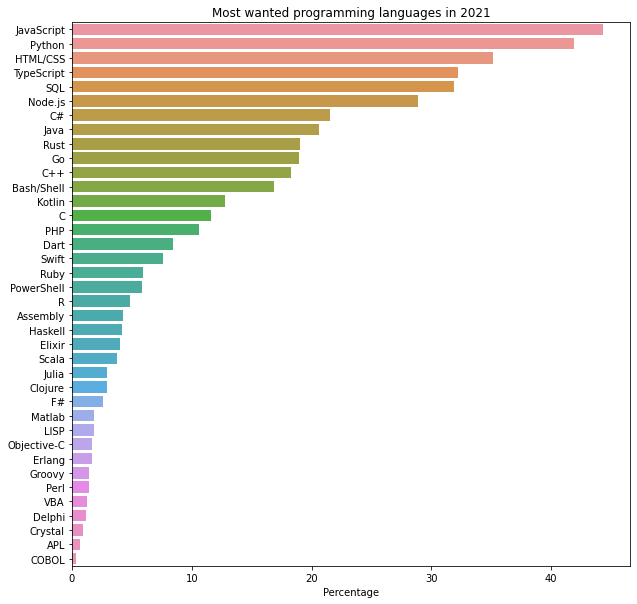

In [74]:
plt.figure(figsize =(10,10))
sns.barplot(x=prog_lang_want_perc, y = prog_lang_want_perc.index )
plt.title('Most wanted programming languages in 2021')
plt.xlabel('Percentage')

### Comparing with 2020 Data 

In [75]:
df_2020 = pd.read_csv('survey_results_public_2020.csv')
# df_2020.columns

In [76]:
prog_lang_2020 = boolean_df(df_2020['LanguageWorkedWith'])
prog_lang_2020_perc =prog_lang_2020.mean().sort_values(ascending=False)*100
# prog_lang_2020

Text(0.5, 0, 'Percentage')

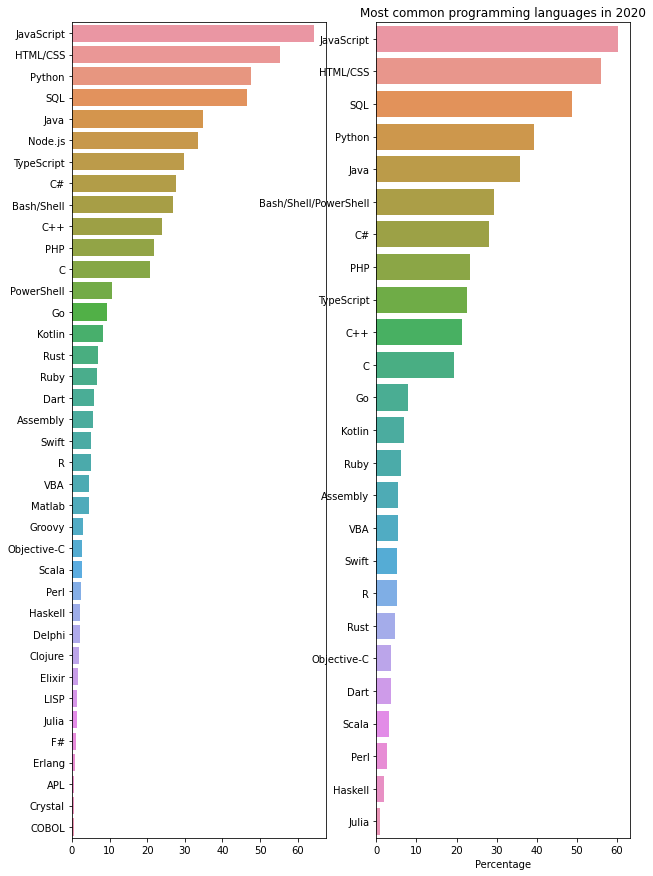

In [77]:

fig, axes = plt.subplots(1, 2 ,figsize=(10,15))


sns.barplot(x=prog_lang_worked_perc, y = prog_lang_worked_perc.index ,ax=axes[0])
plt.title('Most common programming languages in 2021')
plt.xlabel('Percentage')

sns.barplot(x=prog_lang_2020_perc, y = prog_lang_2020_perc.index ,ax=axes[1])
plt.title('Most common programming languages in 2020')
plt.xlabel('Percentage')


### Loved languages 

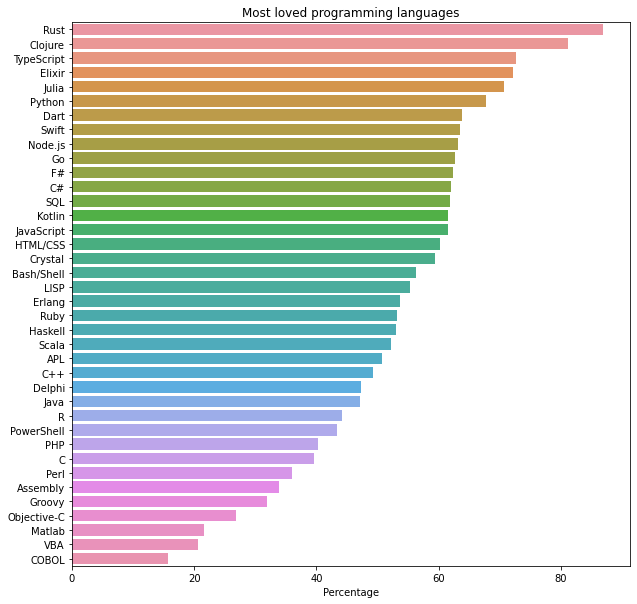

In [78]:
prog_lang_loved = prog_lang_worked & prog_lang_want
prog_lang_loved_perc = (prog_lang_loved.sum() * 100/ prog_lang_worked.sum()).sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=prog_lang_loved_perc, y=prog_lang_loved_perc.index)
plt.title("Most loved programming languages");
plt.xlabel('Percentage');

### Dreaded languages 

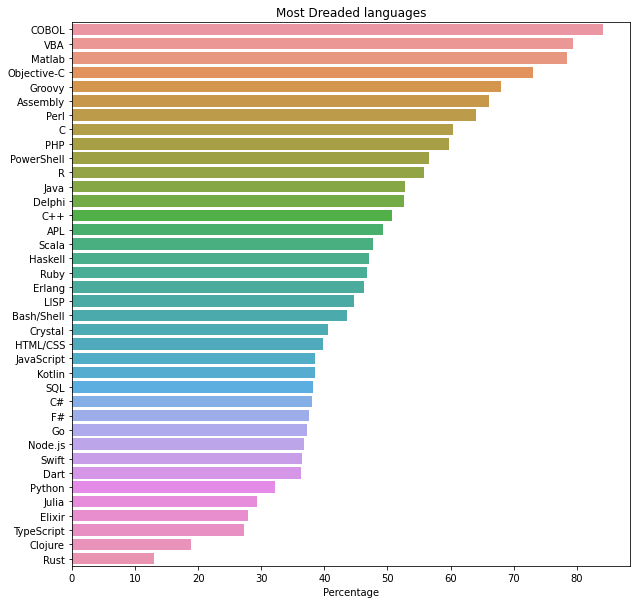

In [79]:
prog_lang_dread = prog_lang_worked & ~prog_lang_want
prog_lang_dread_perc = (prog_lang_dread.sum() * 100/ prog_lang_worked.sum()).sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=prog_lang_dread_perc, y=prog_lang_dread_perc.index)
plt.title("Most Dreaded languages");
plt.xlabel('Percentage');

## Q2 What are the most used languages by professionals and students ?

### Developers type

In [103]:
df['DevType'] = df['DevType'].dropna()
dev_type = boolean_df(df['DevType'])
dev_type_perc = dev_type.mean().sort_values(ascending=False)*100


Text(0.5, 0, 'Percentage')

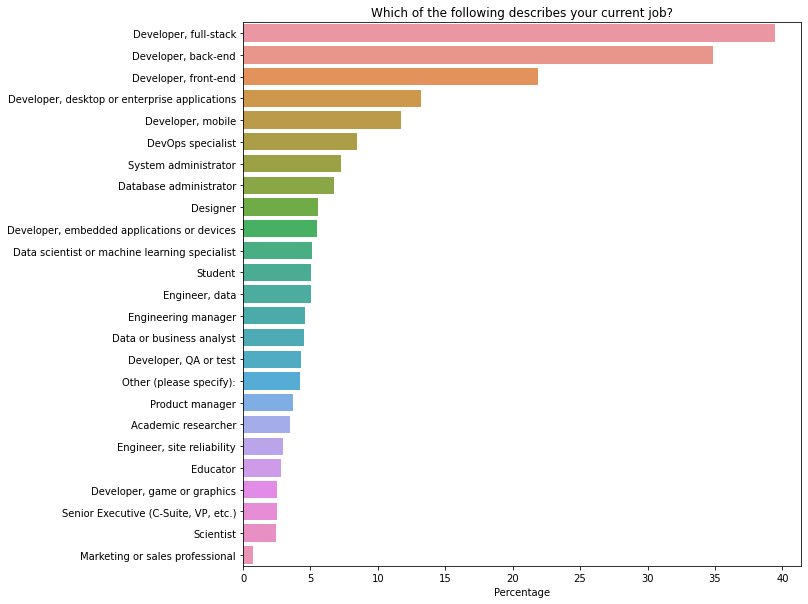

In [81]:
plt.figure(figsize =(10,10))
sns.barplot(x=dev_type_perc, y = dev_type_perc.index )
plt.title('Which of the following describes your current job?')
plt.xlabel('Percentage')

To better illustrate the dataset , will need to add the dev_type back to the data set in order to extract more meaningful insights

### Professional or Student  

In [82]:
df['Employment'].value_counts()

Employed full-time                                      53584
Student, full-time                                      11781
Independent contractor, freelancer, or self-employed     8041
Not employed, but looking for work                       2961
Employed part-time                                       2461
Student, part-time                                       2051
Not employed, and not looking for work                   1228
I prefer not to say                                       890
Retired                                                   326
Name: Employment, dtype: int64

In [83]:
#Extracting rows for students

students = (df['Employment'] =='Student, full-time') | (df['Employment'] =='Not employed, but looking for work' )

Text(0.5, 0, 'Percentage')

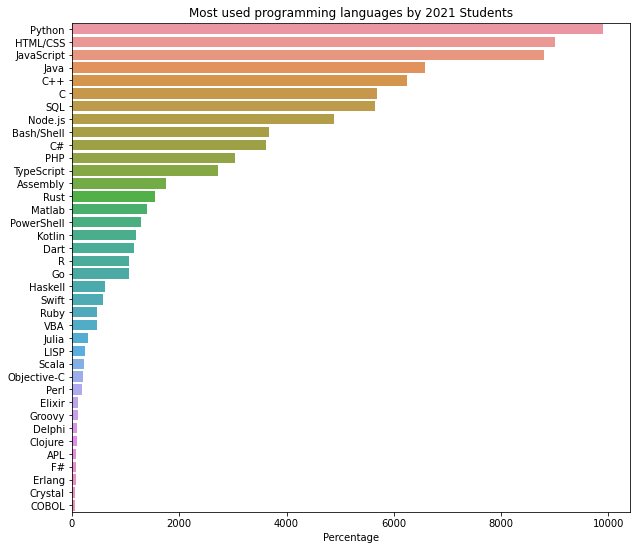

In [84]:
merged_prog = df.join(prog_lang_worked)
merged_dev = merged_prog.join(dev_type)
student_lang = merged_dev.loc[students]
student_lang = student_lang.loc[:,'C++':'COBOL']
student_lang_perc = student_lang.sum().sort_values(ascending=False)

plt.figure(figsize = (10,9))
sns.barplot(x=student_lang_perc, y = student_lang_perc.index)
plt.title('Most used programming languages by 2021 Students')
plt.xlabel('Percentage')
# merged_dev.columns


In [85]:
# Extracting rows for professionals
full_time = df['Employment'] =='Employed full-time'
part_time = df['Employment'] =='Employed part-time'
other = df['Employment'] =='Independent contractor, freelancer, or self-employed' 

professionals = (full_time) | (part_time) | (other) 
                                                                                                                                           

In [86]:
merged_prog = df.join(prog_lang_worked)
merged_dev = merged_prog.join(dev_type)
merged_dev = merged_dev.loc[professionals]
merged_dev = merged_dev.loc[:,'C++':'COBOL']
merged_dev_perc = merged_dev.sum().sort_values(ascending=False)

Text(0.5, 0, 'Percentage')

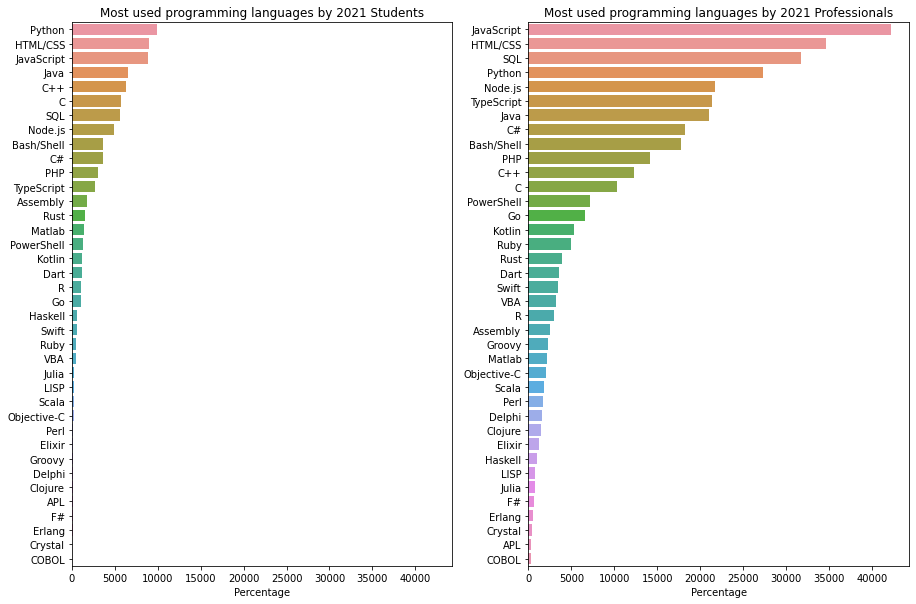

In [87]:
fig, (ax1,ax2) = plt.subplots(1, 2 ,figsize=(15,10),sharex=True)

sns.barplot(x=student_lang_perc, y = student_lang_perc.index ,ax=ax1)
ax1.set_title('Most used programming languages by 2021 Students')
ax1.set_xlabel('Percentage')


sns.barplot(x=merged_dev_perc, y = merged_dev_perc.index, ax =ax2)
plt.title('Most used programming languages by 2021 Professionals')
plt.xlabel('Percentage')

## Q3   What is the average years of coding experience needed to break into the field ?

In [88]:
# Drop rows with missing salary values
df_salary = df.join(prog_lang_worked)
df_salary = df_salary.dropna(subset=['CompTotal'], axis=0)
df_salary['CompTotal'].astype(int)

0          4800
9         42000
11        43000
12        71500
16         9000
          ...  
83434    160500
83435    200000
83436      1800
83437     90000
83438      7700
Name: CompTotal, Length: 47183, dtype: int32

In [89]:
median = df_salary['CompTotal'].median( axis=0, skipna=True) 
print(median)

67000.0


In [90]:
df_coding = df_salary.dropna(subset =['YearsCode'], axis =0)
to_drop = ['Less than 1 year', 'More than 50 years']
df_coding = df_coding[~df_coding['YearsCode'].isin(to_drop)]
df_coding = df_coding[~df_coding['YearsCodePro'].isin(to_drop)]

Text(0.5, 1.0, 'Including any education, how many years have you been coding in total?')

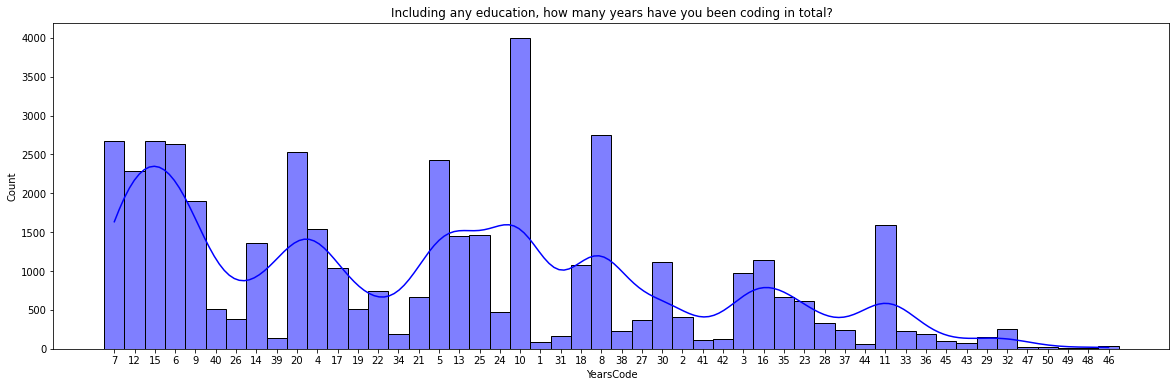

In [91]:
plt.figure(figsize = (20, 6))
sns.histplot(x = df_coding["YearsCode"], color = "blue", bins=30, kde=True);
plt.title('Including any education, how many years have you been coding in total?')

Text(0.5, 1.0, 'NOT including education, how many years have you coded professionally?')

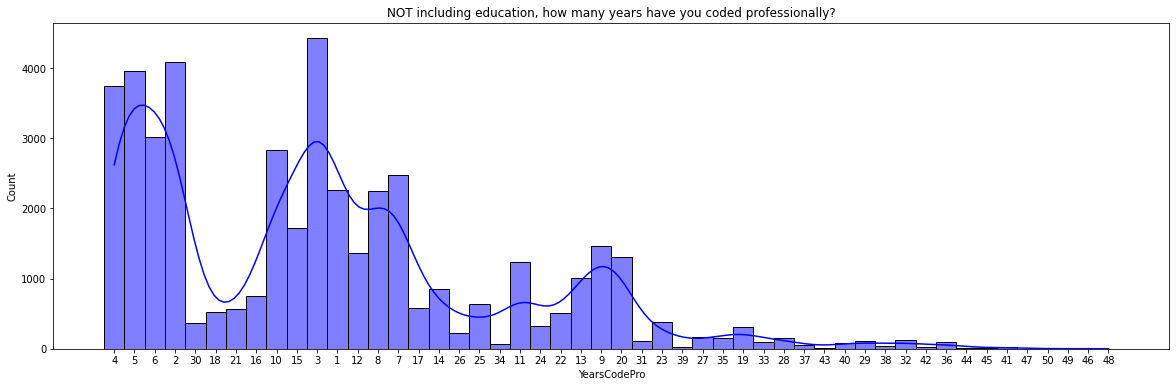

In [92]:
plt.figure(figsize = (20, 6))
sns.histplot(x = df_coding["YearsCodePro"], color = "blue", bins=30, kde=True);
plt.title('NOT including education, how many years have you coded professionally?')

### Experince by countries 


<AxesSubplot:ylabel='Years Coding'>

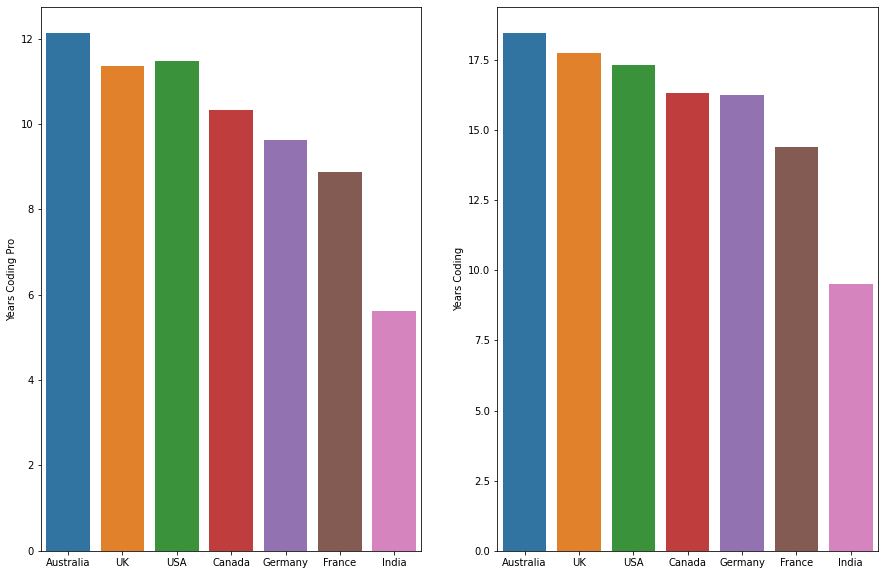

In [93]:
df_coding.YearsCodePro.replace('Less than 1 year', '0.5', inplace=True)
df_coding.YearsCodePro.replace('More than 50 years', '52', inplace=True)
df_coding.YearsCodePro = df_coding.YearsCodePro.astype('float')

df_coding.Country.replace('United States of America', 'USA', inplace=True)
df_coding.Country.replace('United Kingdom of Great Britain and Northern Ireland', 'UK', inplace=True)
df_exp = df_coding.groupby(['Country']).YearsCodePro.mean()

df_exp
countries =['Australia','UK','USA','Canada','Germany','France','India']
exp = [df_exp[x] for x in countries]

fig, (ax1,ax2) = plt.subplots(1, 2 ,figsize=(15,10),sharex=True)
fig.subplots_adjust(hspace=0)
ax1.set_ylabel('Years Coding Pro')
sns.barplot(x=countries, y = exp, ax =ax1)



df_coding.YearsCode.replace('Less than 1 year', '0.5', inplace=True)
df_coding.YearsCode.replace('More than 50 years', '52', inplace=True)
df_coding.YearsCode = df_coding.YearsCode.astype('float')


df_exp = df_coding.groupby(['Country']).YearsCode.mean()

df_exp
exp = [df_exp[x] for x in countries]
ax2.set_ylabel('Years Coding')
sns.barplot(x=countries, y = exp, ax=ax2)


## Driven Insights 




* No one can ignore the rapid rise of __python and TypeScript__ 
* __JavaScript and HTML/CSS__ were the most used languages for two years in a row
* __SQL__ was one the most used language by professionals regardless of the popularity of python.
* Not all developers had a __Computer scince__ degree or needed a __PhD__ to get into software development.
* Professionals who reported working as __data Scientis__ or __Mchine learning Engineer__ reported __python__ and __SQL__ as most used languages. 
* Developers from  __USA__ and __Australia__ have higher coding experince more than countries like India or Pakistan.